In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import multiprocessing
import os
import neat
import visualize

import warnings
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

def eval_genome(genome, config):
    """
    This function will be run in parallel by ParallelEvaluator.  It takes two
    arguments (a single genome and the genome class configuration data) and
    should return one float (that genome's fitness).

    Note that this function needs to be in module scope for multiprocessing.Pool
    (which is what ParallelEvaluator uses) to find it.  Because of this, make
    sure you check for __main__ before executing any code (as we do here in the
    last few lines in the file), otherwise you'll have made a fork bomb
    instead of a neuroevolution demo. :)
    """
    if_no_connect = True
    
    net = neat.nn.FeedForwardNetwork.create(genome, config)

    # [x_inputs, x_outputs] = sampleing()

    error = 0.0
    for xi, xo in zip(x_inputs, x_outputs):
        output = net.activate(xi)
        # error -= (output[0] - xo[0]) ** 2
        error -= np.abs(output[0] - xo[0])
        if float(output[0]) != 0:
            if_no_connect = False
    
    if if_no_connect:
        mse = -1
    else:
        mse = error/30
    # mad = error/L
    return mse

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)

    # Run for up to 300 generations.
    pe = neat.ParallelEvaluator(multiprocessing.cpu_count(), eval_genome)
    winner = p.run(pe.evaluate, 10000)

    return [stats,winner]

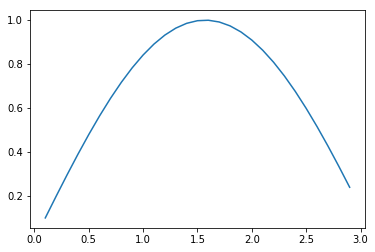

In [2]:
xinputs = np.arange(.1, 30 * .1, .1)
xoutputs = np.sin(np.arange(.1, 30 * .1, .1))

plt.plot(xinputs, xoutputs)
plt.show()

In [3]:
x_inputs = []
x_outputs = []
for i in range(1,30):
    x = 0.1 * i
    x_inputs.append(tuple([x]))
    x_outputs.append(tuple([np.sin(x)]))

In [4]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward")

stats_list = []
winner_list = []
for i in range(1):
    [stats,winner] = run(config_path)
    stats_list.append(stats)
    winner_list.append(winner)


 ****** Running generation 0 ****** 

Population's average fitness: -0.44114 stdev: 0.18031
Best fitness: -0.17115 - size: (1, 1) - species 1 - id 75
Average adjusted fitness: 0.225
Mean genetic distance 1.476, standard deviation 0.509
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    99     -0.2    0.225     0
     2    0     1       --       --     0
Total extinctions: 0
Generation time: 0.050 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.76440 stdev: 0.46966
Best fitness: -0.15519 - size: (1, 1) - species 1 - id 198
Average adjusted fitness: 0.504
Mean genetic distance 1.775, standard deviation 0.635
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    69     -0.2    0.808     0
     2    1    31     -2.6    0.200     0
Total extinctions: 0
Generation time: 0.058 sec (0.054 averag

Average adjusted fitness: 0.847
Mean genetic distance 1.720, standard deviation 0.526
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   23    27     -0.1    0.879    20
     2   23    73     -0.2    0.816    14
Total extinctions: 0
Generation time: 0.057 sec (0.056 average)

 ****** Running generation 24 ****** 

Population's average fitness: -0.81532 stdev: 0.70238
Best fitness: -0.14431 - size: (1, 1) - species 1 - id 344
Average adjusted fitness: 0.894
Mean genetic distance 1.920, standard deviation 0.458
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   24    57     -0.1    0.931    21
     2   24    43     -0.2    0.858    15
Total extinctions: 0
Generation time: 0.053 sec (0.056 average)

 ****** Running generation 25 ****** 

Population's average fitness: -0.72855 stdev: 0.51459
Best fitness: -0.14431 - size: (1, 1)

Population's average fitness: -0.73090 stdev: 0.89237
Best fitness: -0.13995 - size: (1, 1) - species 1 - id 4012
Average adjusted fitness: 0.937
Mean genetic distance 1.583, standard deviation 0.667
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   41    23     -0.1    0.969     0
     2   41    77     -0.2    0.905    32
Total extinctions: 0
Generation time: 0.103 sec (0.077 average)

 ****** Running generation 42 ****** 

Population's average fitness: -0.69494 stdev: 0.52874
Best fitness: -0.13995 - size: (1, 1) - species 1 - id 4012
Average adjusted fitness: 0.866
Mean genetic distance 1.564, standard deviation 0.628
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   42    24     -0.1    0.903     1
     2   42    76     -0.2    0.829    33
Total extinctions: 0
Generation time: 0.085 sec (0.080 average)

 ****** Running

     1   58    22     -0.1    0.984    17
     2   58    78     -0.1    0.936     8
Total extinctions: 0
Generation time: 0.063 sec (0.064 average)

 ****** Running generation 59 ****** 

Population's average fitness: -0.81543 stdev: 1.33746
Best fitness: -0.13995 - size: (1, 1) - species 1 - id 4012
Average adjusted fitness: 0.958
Mean genetic distance 1.575, standard deviation 0.668
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   59    15     -0.1    0.985    18
     2   59    85     -0.1    0.931     9
Total extinctions: 0
Generation time: 0.086 sec (0.067 average)

 ****** Running generation 60 ****** 

Population's average fitness: -1.39585 stdev: 4.11903
Best fitness: -0.13995 - size: (1, 1) - species 1 - id 4012
Average adjusted fitness: 0.967
Mean genetic distance 1.633, standard deviation 0.600
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ==== 

Best fitness: -0.13995 - size: (1, 1) - species 1 - id 6412
Average adjusted fitness: 0.972
Mean genetic distance 1.566, standard deviation 0.643
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   77    19     -0.1    0.994    36
     2   77    81     -0.1    0.950    27
Total extinctions: 0
Generation time: 0.070 sec (0.073 average)

 ****** Running generation 78 ****** 

Population's average fitness: -1.21840 stdev: 3.37452
Best fitness: -0.13995 - size: (1, 1) - species 1 - id 6412
Average adjusted fitness: 0.970
Mean genetic distance 1.668, standard deviation 0.582
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   78    20     -0.1    0.988    37
     2   78    80     -0.1    0.953    28
Total extinctions: 0
Generation time: 0.071 sec (0.072 average)

 ****** Running generation 79 ****** 

Population's average fitness: 

Average adjusted fitness: 0.953
Mean genetic distance 1.650, standard deviation 0.592
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   93    25     -0.1    0.983    52
     2   93    75     -0.1    0.923    43
Total extinctions: 0
Generation time: 0.071 sec (0.080 average)

 ****** Running generation 94 ****** 

Population's average fitness: -1.41424 stdev: 3.07650
Best fitness: -0.13995 - size: (1, 1) - species 1 - id 6412
Average adjusted fitness: 0.949
Mean genetic distance 1.490, standard deviation 0.654
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   94    25     -0.1    0.984    53
     2   94    75     -0.1    0.914    44
Total extinctions: 0
Generation time: 0.064 sec (0.079 average)

 ****** Running generation 95 ****** 

Population's average fitness: -0.83738 stdev: 1.84581
Best fitness: -0.13968 - size: (1, 1

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  109    31     -0.1    0.940     2
     2  109    69     -0.1    0.951    59
Total extinctions: 0
Generation time: 0.079 sec (0.083 average)

 ****** Running generation 110 ****** 

Population's average fitness: -1.08789 stdev: 4.36942
Best fitness: -0.13176 - size: (3, 4) - species 1 - id 10314
Average adjusted fitness: 0.973
Mean genetic distance 1.809, standard deviation 0.467
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  110    29     -0.1    0.959     3
     2  110    71     -0.1    0.987    60
Total extinctions: 0
Generation time: 0.061 sec (0.080 average)

 ****** Running generation 111 ****** 

Population's average fitness: -1.53690 stdev: 4.49188
Best fitness: -0.13176 - size: (3, 4) - species 1 - id 10314
Average adjusted fitness: 0.964
Mean genetic distance 1.810, standard deviation 0.424
Population o

     2  126    67     -0.1    0.792    76
Total extinctions: 0
Generation time: 0.074 sec (0.074 average)

 ****** Running generation 127 ****** 

Population's average fitness: -0.82352 stdev: 0.89946
Best fitness: -0.13176 - size: (3, 4) - species 1 - id 10314
Average adjusted fitness: 0.901
Mean genetic distance 1.758, standard deviation 0.460
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  127    34     -0.1    0.935    20
     2  127    66     -0.1    0.868    77
Total extinctions: 0
Generation time: 0.079 sec (0.074 average)

 ****** Running generation 128 ****** 

Population's average fitness: -0.76083 stdev: 0.76388
Best fitness: -0.13176 - size: (3, 4) - species 1 - id 10314
Average adjusted fitness: 0.900
Mean genetic distance 1.796, standard deviation 0.431
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  128   


Population's average fitness: -0.96754 stdev: 1.65218
Best fitness: -0.13176 - size: (3, 4) - species 1 - id 10314
Average adjusted fitness: 0.933
Mean genetic distance 1.742, standard deviation 0.459
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  145    23     -0.1    0.967    38
     2  145    77     -0.1    0.900    95
Total extinctions: 0
Generation time: 0.067 sec (0.093 average)

 ****** Running generation 146 ****** 

Population's average fitness: -0.87997 stdev: 1.20120
Best fitness: -0.13176 - size: (3, 4) - species 1 - id 10314
Average adjusted fitness: 0.937
Mean genetic distance 1.835, standard deviation 0.325
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  146    28     -0.1    0.955    39
     2  146    72     -0.1    0.920    96
Total extinctions: 0
Generation time: 0.061 sec (0.090 average)

 ****** Run

Population's average fitness: -0.64779 stdev: 1.02628
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.949
Mean genetic distance 1.773, standard deviation 0.449
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  162    30     -0.1    0.966     3
     2  162    70     -0.1    0.932   112
Total extinctions: 0
Generation time: 0.167 sec (0.127 average)

 ****** Running generation 163 ****** 

Population's average fitness: -0.92722 stdev: 1.83765
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.938
Mean genetic distance 1.752, standard deviation 0.477
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  163    30     -0.1    0.954     4
     2  163    70     -0.1    0.921   113
Total extinctions: 0
Generation time: 0.107 sec (0.126 average)

 ****** Runn

Generation time: 0.063 sec (0.056 average)

 ****** Running generation 181 ****** 

Population's average fitness: -0.68720 stdev: 0.61577
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.850
Mean genetic distance 1.567, standard deviation 0.418
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  181    46     -0.1    0.868    22
     2  181    54     -0.2    0.832    10
Total extinctions: 0
Generation time: 0.097 sec (0.059 average)

 ****** Running generation 182 ****** 

Population's average fitness: -0.60967 stdev: 0.49169
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.820
Mean genetic distance 1.535, standard deviation 0.452
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  182    45     -0.1    0.865    23
     2  182    55     -0.2    0.775

Population's average fitness: -0.68893 stdev: 0.46464
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.821
Mean genetic distance 1.679, standard deviation 0.388
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  214    40     -0.1    0.882    55
     2  214    60     -0.2    0.760    43
Total extinctions: 0
Generation time: 0.058 sec (0.061 average)

 ****** Running generation 215 ****** 

Population's average fitness: -0.62393 stdev: 0.34351
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.657
Mean genetic distance 1.663, standard deviation 0.468
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  215    40     -0.1    0.740    56
     2  215    60     -0.2    0.573    44
Total extinctions: 0
Generation time: 0.082 sec (0.061 average)

 ****** Runn

Mean genetic distance 1.635, standard deviation 0.426
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  233    39     -0.1    0.744    74
     2  233    61     -0.1    0.739    62
Total extinctions: 0
Generation time: 0.076 sec (0.065 average)

 ****** Running generation 234 ****** 

Population's average fitness: -0.61478 stdev: 0.38387
Best fitness: -0.06468 - size: (2, 3) - species 2 - id 15348
Average adjusted fitness: 0.738
Mean genetic distance 1.695, standard deviation 0.379
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  234    51     -0.1    0.698    75
     2  234    49     -0.1    0.779    63
Total extinctions: 0
Generation time: 0.061 sec (0.063 average)

 ****** Running generation 235 ****** 

Population's average fitness: -0.74251 stdev: 0.48552
Best fitness: -0.06468 - size: (2, 3) - species 2 - id 15348
Aver

Mean genetic distance 1.590, standard deviation 0.412
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  250    60     -0.1    0.736    91
     2  250    40     -0.1    0.750    79
Total extinctions: 0
Generation time: 0.048 sec (0.052 average)

 ****** Running generation 251 ****** 

Population's average fitness: -0.68459 stdev: 0.53587
Best fitness: -0.06468 - size: (2, 3) - species 2 - id 15348
Average adjusted fitness: 0.818
Mean genetic distance 1.673, standard deviation 0.314
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  251    70     -0.1    0.828    92
     2  251    30     -0.1    0.808    80
Total extinctions: 0
Generation time: 0.047 sec (0.052 average)

 ****** Running generation 252 ****** 

Population's average fitness: -0.58346 stdev: 0.47948
Best fitness: -0.06468 - size: (2, 3) - species 2 - id 15348
Aver

Total extinctions: 0
Generation time: 0.052 sec (0.056 average)

 ****** Running generation 267 ****** 

Population's average fitness: -0.59453 stdev: 0.36188
Best fitness: -0.06468 - size: (2, 3) - species 2 - id 15348
Average adjusted fitness: 0.696
Mean genetic distance 1.680, standard deviation 0.352
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  267    35     -0.2    0.696   108
     2  267    65     -0.1    0.696    96
Total extinctions: 0
Generation time: 0.054 sec (0.056 average)

 ****** Running generation 268 ****** 

Population's average fitness: -0.57984 stdev: 0.36808
Best fitness: -0.06468 - size: (2, 3) - species 2 - id 15348
Average adjusted fitness: 0.638
Mean genetic distance 1.655, standard deviation 0.352
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  268    76     -0.2    0.615   109
     2  268   

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  283    60     -0.1    0.941   124
     2  283    40     -0.2    0.901   112
Total extinctions: 0
Generation time: 0.083 sec (0.060 average)

 ****** Running generation 284 ****** 

Population's average fitness: -0.89428 stdev: 1.46567
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.941
Mean genetic distance 1.825, standard deviation 0.344
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  284    47     -0.1    0.950   125
     2  284    53     -0.2    0.932   113
Total extinctions: 0
Generation time: 0.056 sec (0.059 average)

 ****** Running generation 285 ****** 

Population's average fitness: -0.63733 stdev: 0.46981
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.821
Mean genetic distance 1.798, standard deviation 0.314
Population o

  ====  ===  ====  =======  =======  ====
     1  299    36     -0.1    0.905   140
     2  299    64     -0.1    0.915   128
Total extinctions: 0
Generation time: 0.049 sec (0.053 average)

 ****** Running generation 300 ****** 

Population's average fitness: -0.58455 stdev: 0.66954
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.883
Mean genetic distance 1.711, standard deviation 0.463
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  300    34     -0.1    0.871   141
     2  300    66     -0.1    0.895   129
Total extinctions: 0
Generation time: 0.056 sec (0.053 average)

 ****** Running generation 301 ****** 

Population's average fitness: -0.69848 stdev: 0.60832
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.799
Mean genetic distance 1.578, standard deviation 0.553
Population of 100 members in 2 species:
   ID   age  s

Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  318    32     -0.1    0.692   159
     2  318    68     -0.1    0.823   147
Total extinctions: 0
Generation time: 0.065 sec (0.064 average)

 ****** Running generation 319 ****** 

Population's average fitness: -0.58947 stdev: 0.58739
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.885
Mean genetic distance 1.869, standard deviation 0.477
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  319    33     -0.1    0.896   160
     2  319    67     -0.1    0.874   148
Total extinctions: 0
Generation time: 0.053 sec (0.063 average)

 ****** Running generation 320 ****** 

Population's average fitness: -0.51943 stdev: 0.36328
Best fitness: -0.06468 - size: (2, 3) - species 1 - id 15348
Average adjusted fitness: 0.794
Mean genetic distance 1.90

Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.563
Mean genetic distance 1.809, standard deviation 0.489
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  341    33     -0.1    0.603    11
     2  341    67     -0.1    0.522   170
Total extinctions: 0
Generation time: 0.056 sec (0.057 average)

 ****** Running generation 342 ****** 

Population's average fitness: -0.65284 stdev: 0.56968
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.880
Mean genetic distance 1.781, standard deviation 0.519
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  342    33     -0.1    0.909    12
     2  342    67     -0.1    0.851   171
Total extinctions: 0
Generation time: 0.059 sec (0.057 average)

 ****** Running generation 343 ****** 

Population's average fitne

Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.911
Mean genetic distance 1.738, standard deviation 0.486
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  371    39     -0.1    0.919    41
     2  371    61     -0.1    0.903   200
Total extinctions: 0
Generation time: 0.073 sec (0.066 average)

 ****** Running generation 372 ****** 

Population's average fitness: -0.60625 stdev: 0.86397
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.936
Mean genetic distance 1.762, standard deviation 0.475
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  372    34     -0.1    0.942    42
     2  372    66     -0.1    0.930   201
Total extinctions: 0
Generation time: 0.059 sec (0.066 average)

 ****** Running generation 373 ****** 

Population's average fitne


Population's average fitness: -0.57642 stdev: 0.37474
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.760
Mean genetic distance 1.838, standard deviation 0.418
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  394    38     -0.1    0.753    64
     2  394    62     -0.1    0.766   223
Total extinctions: 0
Generation time: 0.053 sec (0.060 average)

 ****** Running generation 395 ****** 

Population's average fitness: -0.59146 stdev: 0.48330
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.791
Mean genetic distance 1.940, standard deviation 0.337
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  395    38     -0.1    0.776    65
     2  395    62     -0.1    0.806   224
Total extinctions: 0
Generation time: 0.107 sec (0.065 average)

 ****** Run

Mean genetic distance 1.801, standard deviation 0.435
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  421    35     -0.1    0.892    91
     2  421    65     -0.1    0.838   250
Total extinctions: 0
Generation time: 0.081 sec (0.075 average)

 ****** Running generation 422 ****** 

Population's average fitness: -0.58703 stdev: 0.35914
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.695
Mean genetic distance 1.732, standard deviation 0.504
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  422    36     -0.1    0.716    92
     2  422    64     -0.1    0.674   251
Total extinctions: 0
Generation time: 0.077 sec (0.078 average)

 ****** Running generation 423 ****** 

Population's average fitness: -0.54966 stdev: 0.36216
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Aver

Population's average fitness: -0.58761 stdev: 0.35358
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.567
Mean genetic distance 1.909, standard deviation 0.429
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  438    29     -0.1    0.556   108
     2  438    71     -0.1    0.578   267
Total extinctions: 0
Generation time: 0.078 sec (0.087 average)

 ****** Running generation 439 ****** 

Population's average fitness: -0.68985 stdev: 0.56319
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.770
Mean genetic distance 2.082, standard deviation 0.514
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  439    45     -0.1    0.727   109
     2  439    55     -0.1    0.814   268
Total extinctions: 0
Generation time: 0.071 sec (0.088 average)

 ****** Runn

     2  457    50     -0.1    0.859    16
Total extinctions: 0
Generation time: 0.056 sec (0.060 average)

 ****** Running generation 458 ****** 

Population's average fitness: -0.50508 stdev: 0.34784
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.726
Mean genetic distance 1.880, standard deviation 0.487
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  458    52     -0.1    0.685   128
     2  458    48     -0.1    0.767    17
Total extinctions: 0
Generation time: 0.060 sec (0.059 average)

 ****** Running generation 459 ****** 

Population's average fitness: -0.52761 stdev: 0.45364
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.868
Mean genetic distance 1.848, standard deviation 0.540
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  459   

Population's average fitness: -0.65831 stdev: 0.53782
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.832
Mean genetic distance 1.908, standard deviation 0.607
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  481    28     -0.1    0.830   151
     2  481    36     -0.1    0.824    40
     3    4    36     -0.2    0.843     3
Total extinctions: 0
Generation time: 0.050 sec (0.064 average)

 ****** Running generation 482 ****** 

Population's average fitness: -0.67713 stdev: 0.88092
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.890
Mean genetic distance 1.948, standard deviation 0.612
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  482    24     -0.1    0.865   152
     2  482    39     -0.1    0.895    41
     3    5    37     -0.2    0.910


 ****** Running generation 497 ****** 

Population's average fitness: -0.64859 stdev: 0.43574
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.701
Mean genetic distance 1.947, standard deviation 0.540
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  497    19     -0.1    0.750   167
     2  497    19     -0.1    0.828    56
     3   20    29     -0.1    0.673    12
     4    9    33     -0.5    0.554     2
Total extinctions: 0
Generation time: 0.058 sec (0.061 average)

 ****** Running generation 498 ****** 

Population's average fitness: -0.61680 stdev: 0.60662
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.881
Mean genetic distance 1.802, standard deviation 0.520
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  498    18     -0.1    0.888 

  ====  ===  ====  =======  =======  ====
     1  517    22     -0.1    0.742   187
     2  517    17     -0.1    0.804    76
     3   40    25     -0.1    0.841    14
     4   29    36     -0.1    0.813    11
Total extinctions: 0
Generation time: 0.069 sec (0.078 average)

 ****** Running generation 518 ****** 

Population's average fitness: -0.44646 stdev: 0.31297
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.619
Mean genetic distance 1.746, standard deviation 0.536
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  518    19     -0.1    0.505   188
     2  518    18     -0.1    0.577    77
     3   41    24     -0.1    0.725    15
     4   30    39     -0.1    0.671    12
Total extinctions: 0
Generation time: 0.064 sec (0.076 average)

 ****** Running generation 519 ****** 

Population's average fitness: -0.58245 stdev: 0.41350
Best fitness: -0.05589 - size: (2

Population's average fitness: -0.67679 stdev: 0.69424
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.882
Mean genetic distance 1.618, standard deviation 0.568
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  533    50     -0.1    0.879   203
     2  533    50     -0.1    0.886    92
Total extinctions: 0
Generation time: 0.216 sec (0.127 average)

 ****** Running generation 534 ****** 

Population's average fitness: -0.69689 stdev: 0.52329
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.800
Mean genetic distance 1.620, standard deviation 0.564
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  534    53     -0.1    0.817   204
     2  534    47     -0.1    0.782    93
Total extinctions: 0
Generation time: 0.160 sec (0.129 average)

 ****** Runn

Population's average fitness: -0.68802 stdev: 0.53680
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.823
Mean genetic distance 2.085, standard deviation 0.777
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  549    28     -0.1    0.789   219
     2  549    38     -0.1    0.847   108
     5    7    33     -0.2    0.835     1
Total extinctions: 0
Generation time: 0.129 sec (0.116 average)

 ****** Running generation 550 ****** 

Population's average fitness: -0.54300 stdev: 0.35435
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.767
Mean genetic distance 2.120, standard deviation 0.776
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  550    36     -0.1    0.765   220
     2  550    35     -0.1    0.792   109
     5    8    28     -0.2    0.744  

Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.685
Mean genetic distance 2.519, standard deviation 0.827
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  563    28     -0.1    0.675   233
     2  563    22     -0.1    0.740   122
     5   21    21     -0.2    0.694     9
     6   10     9     -0.2    0.657     8
     7    1    19     -0.2    0.660     0
Total extinctions: 0
Generation time: 0.067 sec (0.075 average)

 ****** Running generation 564 ****** 

Population's average fitness: -0.62511 stdev: 0.44141
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.771
Mean genetic distance 2.363, standard deviation 0.803
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  564    24     -0.1    0.810   234
     2  564    21     -0.1    0.799   123
     5

Average adjusted fitness: 0.758
Mean genetic distance 2.264, standard deviation 0.810
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  577    26     -0.1    0.783   247
     2  577    26     -0.1    0.802   136
     5   35    27     -0.1    0.790     7
     7   15    22     -0.2    0.655     2
Total extinctions: 0
Generation time: 0.050 sec (0.058 average)

 ****** Running generation 578 ****** 

Population's average fitness: -0.57890 stdev: 0.41687
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.820
Mean genetic distance 2.338, standard deviation 0.753
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  578    27     -0.1    0.850   248
     2  578    23     -0.1    0.833   137
     5   36    26     -0.1    0.827     8
     7   16    23     -0.2    0.772     3
Total extinctions: 0
Gene

Population's average fitness: -0.55713 stdev: 0.36614
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.733
Mean genetic distance 2.208, standard deviation 0.846
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  594    27     -0.1    0.727   264
     2  594    20     -0.1    0.732   153
     5   52    30     -0.1    0.807     5
     7   32    23     -0.2    0.666    19
Total extinctions: 0
Generation time: 0.055 sec (0.062 average)

 ****** Running generation 595 ****** 

Population's average fitness: -0.61005 stdev: 0.39148
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764

Species 7 with 23 members is stagnated: removing it
Average adjusted fitness: 0.700
Mean genetic distance 1.897, standard deviation 0.699
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  595    36     -0

Population's average fitness: -0.57188 stdev: 0.39420
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.764
Mean genetic distance 1.354, standard deviation 0.515
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  612    50     -0.1    0.728   282
     2  612    50     -0.1    0.799   171
Total extinctions: 0
Generation time: 0.074 sec (0.070 average)

 ****** Running generation 613 ****** 

Population's average fitness: -0.57464 stdev: 0.34374
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.528
Mean genetic distance 1.577, standard deviation 0.618
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  613    46     -0.1    0.520   283
     2  613    54     -0.1    0.537   172
Total extinctions: 0
Generation time: 0.057 sec (0.070 average)

 ****** Runn

Population's average fitness: -0.53612 stdev: 0.36872
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.748
Mean genetic distance 1.487, standard deviation 0.602
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  629    53     -0.1    0.730   299
     2  629    47     -0.1    0.767   188
Total extinctions: 0
Generation time: 0.067 sec (0.067 average)

 ****** Running generation 630 ****** 

Population's average fitness: -0.66871 stdev: 0.47830
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.775
Mean genetic distance 1.546, standard deviation 0.568
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  630    58     -0.1    0.780   300
     2  630    42     -0.1    0.770   189
Total extinctions: 0
Generation time: 0.084 sec (0.070 average)

 ****** Runn

Average adjusted fitness: 0.735
Mean genetic distance 2.051, standard deviation 0.807
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  647    40     -0.1    0.732   317
     2  647    30     -0.1    0.740   206
     8    7    29     -0.2    0.732     0
Total extinctions: 0
Generation time: 0.058 sec (0.063 average)

 ****** Running generation 648 ****** 

Population's average fitness: -0.61466 stdev: 0.33974
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.524
Mean genetic distance 2.107, standard deviation 0.834
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  648    44     -0.1    0.566   318
     2  648    29     -0.1    0.597   207
     8    8    26     -0.2    0.408     0
Total extinctions: 0
Generation time: 0.057 sec (0.060 average)

 ****** Running generation 649 ****** 

Popul

Total extinctions: 0
Generation time: 0.055 sec (0.060 average)

 ****** Running generation 663 ****** 

Population's average fitness: -0.83261 stdev: 1.52943
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.928
Mean genetic distance 2.347, standard deviation 0.825
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  663    25     -0.1    0.960   333
     2  663    26     -0.1    0.966   222
     8   23    26     -0.2    0.912     3
     9    3    22     -0.2    0.873     2
Total extinctions: 0
Generation time: 0.057 sec (0.060 average)

 ****** Running generation 664 ****** 

Population's average fitness: -0.69937 stdev: 0.58981
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.822
Mean genetic distance 2.340, standard deviation 0.820
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ===

Population's average fitness: -0.73488 stdev: 1.15193
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.932
Mean genetic distance 2.261, standard deviation 0.884
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  679    27     -0.1    0.939   349
     2  679    24     -0.1    0.958   238
     8   39    26     -0.1    0.938    12
     9   19    24     -0.2    0.894     0
Total extinctions: 0
Generation time: 0.115 sec (0.072 average)

 ****** Running generation 680 ****** 

Population's average fitness: -0.64985 stdev: 0.52170
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.868
Mean genetic distance 2.324, standard deviation 0.862
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  680    25     -0.1    0.867   350
     2  680    26     -0.1    0.902

Mean genetic distance 1.947, standard deviation 0.711
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  693    34     -0.1    0.747   363
     2  693    29     -0.1    0.792   252
     9   33    37     -0.2    0.757     5
Total extinctions: 0
Generation time: 0.064 sec (0.080 average)

 ****** Running generation 694 ****** 

Population's average fitness: -0.63412 stdev: 0.41948
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.715
Mean genetic distance 1.880, standard deviation 0.759
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  694    29     -0.1    0.655   364
     2  694    32     -0.1    0.740   253
     9   34    39     -0.2    0.749     6
Total extinctions: 0
Generation time: 0.070 sec (0.076 average)

 ****** Running generation 695 ****** 

Population's average fitness: -0.53


Population's average fitness: -0.59090 stdev: 0.53615
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.855
Mean genetic distance 2.025, standard deviation 0.631
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  709    34     -0.1    0.859   379
     2  709    36     -0.1    0.883   268
     9   49    30     -0.1    0.822     9
Total extinctions: 0
Generation time: 0.059 sec (0.065 average)

 ****** Running generation 710 ****** 

Population's average fitness: -0.50638 stdev: 0.36451
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.763
Mean genetic distance 2.022, standard deviation 0.649
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  710    32     -0.1    0.742   380
     2  710    33     -0.1    0.733   269
     9   50    35     -0.1    0.81

Population's average fitness: -0.58748 stdev: 0.47209
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.821
Mean genetic distance 1.864, standard deviation 0.610
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  730    30     -0.1    0.792   400
     2  730    35     -0.1    0.830   289
     9   70    36     -0.1    0.842    14
Total extinctions: 0
Generation time: 0.056 sec (0.055 average)

 ****** Running generation 731 ****** 

Population's average fitness: -0.64937 stdev: 0.46608
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.792
Mean genetic distance 1.820, standard deviation 0.595
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  731    31     -0.1    0.768   401
     2  731    34     -0.1    0.805   290
     9   71    35     -0.1    0.803

Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.738
Mean genetic distance 1.811, standard deviation 0.704
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  745    27     -0.1    0.736   415
     2  745    37     -0.1    0.747   304
     9   85    35     -0.1    0.730    13
Total extinctions: 0
Generation time: 0.053 sec (0.072 average)

 ****** Running generation 746 ****** 

Population's average fitness: -0.62732 stdev: 0.44583
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.774
Mean genetic distance 1.787, standard deviation 0.696
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  746    32     -0.1    0.756   416
     2  746    33     -0.1    0.757   305
     9   86    34     -0.1    0.809    14
Total extinctions: 0
Generation time: 0.056 sec (

Population's average fitness: -0.62170 stdev: 0.44865
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.771
Mean genetic distance 1.622, standard deviation 0.571
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  761    42     -0.1    0.768   431
     2  761    58     -0.1    0.775   320
Total extinctions: 0
Generation time: 0.053 sec (0.068 average)

 ****** Running generation 762 ****** 

Population's average fitness: -0.59804 stdev: 0.33741
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.615
Mean genetic distance 1.583, standard deviation 0.571
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  762    54     -0.1    0.594   432
     2  762    46     -0.1    0.635   321
Total extinctions: 0
Generation time: 0.058 sec (0.068 average)

 ****** Runn

  ====  ===  ====  =======  =======  ====
     1  776    26     -0.1    0.775   446
     2  776    28     -0.1    0.762   335
    10   10    45     -0.1    0.728     8
Total extinctions: 0
Generation time: 0.056 sec (0.055 average)

 ****** Running generation 777 ****** 

Population's average fitness: -0.59649 stdev: 0.39382
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.727
Mean genetic distance 1.777, standard deviation 0.512
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  777    21     -0.1    0.761   447
     2  777    26     -0.1    0.711   336
    10   11    52     -0.1    0.708     9
Total extinctions: 0
Generation time: 0.050 sec (0.056 average)

 ****** Running generation 778 ****** 

Population's average fitness: -0.51063 stdev: 0.38601
Best fitness: -0.05589 - size: (2, 3) - species 1 - id 31764
Average adjusted fitness: 0.743
Mean genetic distance 1.7

Average adjusted fitness: 0.828
Mean genetic distance 1.531, standard deviation 0.625
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  792    52     -0.0    0.836     1
     2  792    48     -0.1    0.821   351
Total extinctions: 0
Generation time: 0.060 sec (0.060 average)

 ****** Running generation 793 ****** 

Population's average fitness: -0.63983 stdev: 0.44346
Best fitness: -0.04827 - size: (2, 3) - species 1 - id 75327
Average adjusted fitness: 0.781
Mean genetic distance 1.544, standard deviation 0.651
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  793    52     -0.0    0.757     2
     2  793    48     -0.1    0.805   352
Total extinctions: 0
Generation time: 0.055 sec (0.061 average)

 ****** Running generation 794 ****** 

Population's average fitness: -0.60958 stdev: 0.49175
Best fitness: -0.04827 - size: (2

Population's average fitness: -0.64330 stdev: 0.64540
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.873
Mean genetic distance 1.566, standard deviation 0.517
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  820    53     -0.0    0.873     1
     2  820    47     -0.1    0.874   379
Total extinctions: 0
Generation time: 0.061 sec (0.062 average)

 ****** Running generation 821 ****** 

Population's average fitness: -0.66991 stdev: 0.53152
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.784
Mean genetic distance 1.438, standard deviation 0.589
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  821    58     -0.0    0.780     2
     2  821    42     -0.1    0.788   380
Total extinctions: 0
Generation time: 0.057 sec (0.062 average)

 ****** Runn

Mean genetic distance 2.033, standard deviation 0.882
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  845    38     -0.0    0.822    26
     2  845    36     -0.1    0.818   404
    11    2    26     -0.2    0.753     0
Total extinctions: 0
Generation time: 0.054 sec (0.054 average)

 ****** Running generation 846 ****** 

Population's average fitness: -0.59289 stdev: 0.48642
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.806
Mean genetic distance 2.022, standard deviation 0.958
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  846    46     -0.0    0.831    27
     2  846    25     -0.1    0.816   405
    11    3    29     -0.2    0.772     1
Total extinctions: 0
Generation time: 0.065 sec (0.055 average)

 ****** Running generation 847 ****** 

Population's average fitness: -0.66

Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.515
Mean genetic distance 2.158, standard deviation 0.869
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  862    19     -0.0    0.585    43
     2  862    17     -0.1    0.557   421
    11   19    22     -0.1    0.607    14
    12   11    25     -0.1    0.440     4
    13   11    17     -0.2    0.386     6
Total extinctions: 0
Generation time: 0.080 sec (0.069 average)

 ****** Running generation 863 ****** 

Population's average fitness: -0.67897 stdev: 0.37952
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.667
Mean genetic distance 2.111, standard deviation 0.862
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  863    17     -0.0    0.698    44
     2  863    16     -0.1    0.625   422
    1

     2  876    26     -0.1    0.591   435
    12   25    34     -0.1    0.435    18
    13   25    20     -0.2    0.379     8
Total extinctions: 0
Generation time: 0.059 sec (0.067 average)

 ****** Running generation 877 ****** 

Population's average fitness: -0.60792 stdev: 0.37880
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.687
Mean genetic distance 1.828, standard deviation 0.772
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  877    24     -0.0    0.718    58
     2  877    23     -0.1    0.730   436
    12   26    31     -0.1    0.655    19
    13   26    23     -0.2    0.645     9
Total extinctions: 0
Generation time: 0.060 sec (0.065 average)

 ****** Running generation 878 ****** 

Population's average fitness: -0.52732 stdev: 0.34406
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992

Species 12 with 31 members is stagnated: removing it
Av

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  891    50     -0.0    0.861    72
     2  891    50     -0.1    0.832   450
Total extinctions: 0
Generation time: 0.072 sec (0.064 average)

 ****** Running generation 892 ****** 

Population's average fitness: -0.52824 stdev: 0.40231
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.767
Mean genetic distance 1.527, standard deviation 0.546
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  892    51     -0.0    0.774    73
     2  892    49     -0.1    0.760   451
Total extinctions: 0
Generation time: 0.052 sec (0.064 average)

 ****** Running generation 893 ****** 

Population's average fitness: -0.55410 stdev: 0.45574
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.837
Mean genetic distance 1.632, standard deviation 0.585
Population o


Population's average fitness: -0.61193 stdev: 0.35460
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.544
Mean genetic distance 1.510, standard deviation 0.521
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  908    54     -0.0    0.528    89
     2  908    46     -0.1    0.559   467
Total extinctions: 0
Generation time: 0.063 sec (0.059 average)

 ****** Running generation 909 ****** 

Population's average fitness: -0.60729 stdev: 0.38692
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.674
Mean genetic distance 1.481, standard deviation 0.572
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  909    51     -0.0    0.600    90
     2  909    49     -0.1    0.748   468
Total extinctions: 0
Generation time: 0.052 sec (0.058 average)

 ****** Run

Total extinctions: 0
Generation time: 0.065 sec (0.076 average)

 ****** Running generation 924 ****** 

Population's average fitness: -0.51460 stdev: 0.50662
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.880
Mean genetic distance 1.687, standard deviation 0.569
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  924    34     -0.0    0.903   105
     2  924    28     -0.1    0.844   483
    14   14    37     -0.1    0.895     6
Total extinctions: 0
Generation time: 0.061 sec (0.076 average)

 ****** Running generation 925 ****** 

Population's average fitness: -0.55333 stdev: 0.40221
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.733
Mean genetic distance 1.571, standard deviation 0.559
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  925    

     2  943    26     -0.1    0.747   502
    14   33    38     -0.1    0.732     8
Total extinctions: 0
Generation time: 0.058 sec (0.061 average)

 ****** Running generation 944 ****** 

Population's average fitness: -0.52374 stdev: 0.36807
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.713
Mean genetic distance 1.667, standard deviation 0.644
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  944    36     -0.0    0.707   125
     2  944    28     -0.1    0.645   503
    14   34    36     -0.1    0.788     9
Total extinctions: 0
Generation time: 0.074 sec (0.062 average)

 ****** Running generation 945 ****** 

Population's average fitness: -0.52849 stdev: 0.33788
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.551
Mean genetic distance 1.583, standard deviation 0.579
Population of 99 members in 3 species:
   ID   age  si

     1  963    53     -0.0    0.822   144
     2  963    47     -0.1    0.833   522
Total extinctions: 0
Generation time: 0.065 sec (0.060 average)

 ****** Running generation 964 ****** 

Population's average fitness: -0.61045 stdev: 0.53962
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.799
Mean genetic distance 1.795, standard deviation 0.576
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  964    61     -0.0    0.830   145
     2  964    39     -0.1    0.767   523
Total extinctions: 0
Generation time: 0.060 sec (0.059 average)

 ****** Running generation 965 ****** 

Population's average fitness: -0.62120 stdev: 0.48739
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.738
Mean genetic distance 1.740, standard deviation 0.559
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  =

  ====  ===  ====  =======  =======  ====
     1  982    49     -0.0    0.815   163
     2  982    51     -0.1    0.833    10
Total extinctions: 0
Generation time: 0.052 sec (0.055 average)

 ****** Running generation 983 ****** 

Population's average fitness: -0.62570 stdev: 0.48502
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.813
Mean genetic distance 1.410, standard deviation 0.503
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  983    56     -0.0    0.813   164
     2  983    44     -0.1    0.813    11
Total extinctions: 0
Generation time: 0.088 sec (0.059 average)

 ****** Running generation 984 ****** 

Population's average fitness: -0.62921 stdev: 0.45842
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.748
Mean genetic distance 1.520, standard deviation 0.493
Population of 100 members in 2 species:
   ID   age  s

Population's average fitness: -0.62338 stdev: 0.40107
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.680
Mean genetic distance 1.671, standard deviation 0.714
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1002    47     -0.0    0.684   183
     2  1002    50     -0.1    0.675    30
    15    0     3       --       --     0
Total extinctions: 0
Generation time: 0.072 sec (0.076 average)

 ****** Running generation 1003 ****** 

Population's average fitness: -0.58856 stdev: 0.45712
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.756
Mean genetic distance 1.995, standard deviation 0.840
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1003    44     -0.0    0.789   184
     2  1003    44     -0.1    0.796    31
    15    1    13     -0.6    

Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.768
Mean genetic distance 2.210, standard deviation 0.813
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1016    31     -0.0    0.820   197
     2  1016    28     -0.1    0.772    44
    15   14    16     -0.2    0.788     3
    16    9    24     -0.1    0.691     7
Total extinctions: 0
Generation time: 0.064 sec (0.064 average)

 ****** Running generation 1017 ****** 

Population's average fitness: -0.73277 stdev: 0.72346
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.848
Mean genetic distance 2.128, standard deviation 0.850
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1017    34     -0.0    0.844   198
     2  1017    27     -0.1    0.826    45
    15   15    17     -0.2    0.911     4
 

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1035    40     -0.0    0.921   216
     2  1035    25     -0.1    0.920    63
    15   33    16     -0.1    0.824    16
    16   28    20     -0.1    0.903    12
Total extinctions: 0
Generation time: 0.050 sec (0.065 average)

 ****** Running generation 1036 ****** 

Population's average fitness: -0.64368 stdev: 0.47706
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.779
Mean genetic distance 2.133, standard deviation 0.899
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1036    42     -0.0    0.821   217
     2  1036    23     -0.1    0.800    64
    15   34    15     -0.1    0.733    17
    16   29    21     -0.1    0.762    13
Total extinctions: 0
Generation time: 0.072 sec (0.066 average)

 ****** Running generation 1037 ****** 

Population's average fitness: -0.66318 

Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.605
Mean genetic distance 1.526, standard deviation 0.534
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1056    54     -0.0    0.632   237
     2  1056    46     -0.1    0.578    84
Total extinctions: 0
Generation time: 0.050 sec (0.061 average)

 ****** Running generation 1057 ****** 

Population's average fitness: -0.60844 stdev: 0.42232
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.786
Mean genetic distance 1.571, standard deviation 0.587
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1057    53     -0.0    0.753   238
     2  1057    47     -0.1    0.820    85
Total extinctions: 0
Generation time: 0.064 sec (0.062 average)

 ****** Running generation 1058 ****** 

Population's average

Population's average fitness: -0.74184 stdev: 0.58116
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.775
Mean genetic distance 1.910, standard deviation 0.756
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1073    42     -0.0    0.788   254
     2  1073    27     -0.1    0.749   101
    17   12    32     -0.2    0.787     3
Total extinctions: 0
Generation time: 0.056 sec (0.066 average)

 ****** Running generation 1074 ****** 

Population's average fitness: -0.73744 stdev: 0.77087
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.877
Mean genetic distance 2.033, standard deviation 0.795
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1074    44     -0.0    0.904   255
     2  1074    28     -0.1    0.882   102
    17   13    29     -0.2    

  ====  ===  ====  =======  =======  ====
     1  1088    45     -0.0    0.789   269
     2  1088    26     -0.1    0.732   116
    17   27    30     -0.2    0.750    18
Total extinctions: 0
Generation time: 0.052 sec (0.056 average)

 ****** Running generation 1089 ****** 

Population's average fitness: -0.59898 stdev: 0.37679
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.640
Mean genetic distance 2.096, standard deviation 0.780
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1089    42     -0.0    0.665   270
     2  1089    33     -0.1    0.640   117
    17   28    26     -0.2    0.614    19
Total extinctions: 0
Generation time: 0.091 sec (0.059 average)

 ****** Running generation 1090 ****** 

Population's average fitness: -0.65942 stdev: 0.37903
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992

Species 17 with 26 members is stagnated: removing

  ====  ===  ====  =======  =======  ====
     1  1107    37     -0.0    0.645   288
     2  1107    32     -0.1    0.630   135
    18    5    32     -0.2    0.664     2
Total extinctions: 0
Generation time: 0.080 sec (0.058 average)

 ****** Running generation 1108 ****** 

Population's average fitness: -0.54063 stdev: 0.42885
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.788
Mean genetic distance 1.942, standard deviation 0.737
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1108    35     -0.0    0.824   289
     2  1108    33     -0.1    0.753   136
    18    6    32     -0.2    0.788     0
Total extinctions: 0
Generation time: 0.087 sec (0.062 average)

 ****** Running generation 1109 ****** 

Population's average fitness: -0.66266 stdev: 0.51283
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.782
Mean genetic dista


Population's average fitness: -0.57483 stdev: 0.35303
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.578
Mean genetic distance 1.861, standard deviation 0.676
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1130    35     -0.0    0.508   311
     2  1130    31     -0.1    0.593   158
    18   28    34     -0.1    0.634     4
Total extinctions: 0
Generation time: 0.057 sec (0.074 average)

 ****** Running generation 1131 ****** 

Population's average fitness: -0.50733 stdev: 0.35180
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.707
Mean genetic distance 1.817, standard deviation 0.689
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1131    37     -0.0    0.694   312
     2  1131    29     -0.1    0.673   159
    18   29    35     -0.1   

Mean genetic distance 1.822, standard deviation 0.678
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1146    23     -0.0    0.761   327
     2  1146    39     -0.1    0.742   174
    18   44    38     -0.2    0.744    11
Total extinctions: 0
Generation time: 0.107 sec (0.098 average)

 ****** Running generation 1147 ****** 

Population's average fitness: -0.53440 stdev: 0.35880
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992

Species 2 with 39 members is stagnated: removing it
Average adjusted fitness: 0.627
Mean genetic distance 1.679, standard deviation 0.689
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1147    48     -0.0    0.544   328
    18   45    52     -0.0    0.710     0
Total extinctions: 0
Generation time: 0.097 sec (0.099 average)

 ****** Running generation 1148 ****** 

Population's averag

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1161    14     -0.0    0.807   342
    18   59    16     -0.0    0.834    14
    19   13    18     -0.1    0.863     7
    20   13    16     -0.2    0.665    12
    21   12    24     -0.1    0.790     3
    22   10    10     -0.2    0.802     1
Total extinctions: 0
Generation time: 0.057 sec (0.085 average)

 ****** Running generation 1162 ****** 

Population's average fitness: -0.54400 stdev: 0.39145
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.736
Mean genetic distance 2.162, standard deviation 0.710
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1162    18     -0.0    0.753   343
    18   60    11     -0.0    0.777    15
    19   14    20     -0.1    0.752     8
    20   14    14     -0.2    0.559    13
    21   13    21     -0.1    0.734     4
    22   11    15     

    18   80    23     -0.0    0.828    35
    21   33    23     -0.1    0.787     0
    22   31    16     -0.1    0.731     5
Total extinctions: 0
Generation time: 0.065 sec (0.060 average)

 ****** Running generation 1183 ****** 

Population's average fitness: -0.61264 stdev: 0.53550
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.831
Mean genetic distance 1.692, standard deviation 0.798
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1183    33     -0.0    0.835   364
    18   81    23     -0.0    0.858    36
    21   34    23     -0.1    0.825     1
    22   32    21     -0.1    0.806     6
Total extinctions: 0
Generation time: 0.070 sec (0.061 average)

 ****** Running generation 1184 ****** 

Population's average fitness: -0.71540 stdev: 0.56581
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.838
Mean genetic distance

  ====  ===  ====  =======  =======  ====
     1  1196    27     -0.0    0.510   377
    18   94     9     -0.0    0.599    49
    21   47    18     -0.1    0.575    14
    22   45    30     -0.1    0.361    19
    23    8    17     -0.2    0.433     2
Total extinctions: 0
Generation time: 0.057 sec (0.058 average)

 ****** Running generation 1197 ****** 

Population's average fitness: -0.68889 stdev: 0.72655
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992

Species 22 with 30 members is stagnated: removing it
Average adjusted fitness: 0.863
Mean genetic distance 1.751, standard deviation 0.897
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1197    31     -0.0    0.897   378
    18   95    20     -0.0    0.886    50
    21   48    25     -0.1    0.834    15
    23    9    25     -0.2    0.836     3
Total extinctions: 0
Generation time: 0.056 sec (0.058 average)

 ****** Running generation 1

Population's average fitness: -0.64383 stdev: 0.39399
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.733
Mean genetic distance 2.323, standard deviation 0.999
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1212    35     -0.0    0.735   393
    18  110    15     -0.0    0.780    65
    23   24    29     -0.1    0.743    13
    24    2    18     -0.2    0.672     0
    25    0     3       --       --     0
Total extinctions: 0
Generation time: 0.093 sec (0.065 average)

 ****** Running generation 1213 ****** 

Population's average fitness: -0.67692 stdev: 0.73450
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.868
Mean genetic distance 2.500, standard deviation 0.808
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1213    24     -0.0    0.

Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1229    26     -0.0    0.757   410
    18  127    20     -0.0    0.741    82
    24   19    23     -0.2    0.707    16
    25   17    32     -0.1    0.751     0
Total extinctions: 0
Generation time: 0.091 sec (0.069 average)

 ****** Running generation 1230 ****** 

Population's average fitness: -0.73431 stdev: 1.01177
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.929
Mean genetic distance 1.764, standard deviation 0.756
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1230    27     -0.0    0.940   411
    18  128    16     -0.0    0.940    83
    24   20    24     -0.2    0.905     0
    25   18    34     -0.1    0.929     1
Total extinctions: 0
Generation time: 0.073 sec (0.071 average)

 ****** Running generation 1231 ****** 

P

Population's average fitness: -0.65374 stdev: 0.42828
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.757
Mean genetic distance 1.657, standard deviation 0.702
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1245    22     -0.0    0.763   426
    18  143    21     -0.0    0.811    98
    24   35    19     -0.1    0.728    11
    25   33    39     -0.1    0.725     9
Total extinctions: 0
Generation time: 0.055 sec (0.065 average)

 ****** Running generation 1246 ****** 

Population's average fitness: -0.62438 stdev: 0.38454
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.743
Mean genetic distance 1.657, standard deviation 0.739
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1246    19     -0.0    0.759   427
    18  144    20     -0.0    0.

Population's average fitness: -0.69747 stdev: 0.34923
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.604
Mean genetic distance 2.102, standard deviation 0.778
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1261    25     -0.0    0.677   442
    18  159    17     -0.0    0.592   114
    26    5    23     -0.2    0.616     0
    27    2    36     -0.3    0.532     0
Total extinctions: 0
Generation time: 0.092 sec (0.075 average)

 ****** Running generation 1262 ****** 

Population's average fitness: -0.58568 stdev: 0.42663
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.822
Mean genetic distance 1.960, standard deviation 0.693
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1262    23     -0.0    0.851   443
    18  160    15     -0.0    0.

     1  1277    28     -0.0    0.788   458
    18  175    18     -0.0    0.773   130
    26   21    20     -0.2    0.785     4
    27   18    34     -0.1    0.734     4
Total extinctions: 0
Generation time: 0.048 sec (0.065 average)

 ****** Running generation 1278 ****** 

Population's average fitness: -0.62655 stdev: 0.36745
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.553
Mean genetic distance 1.522, standard deviation 0.649
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1278    25     -0.0    0.647   459
    18  176    17     -0.0    0.592   131
    26   22    19     -0.2    0.518     5
    27   19    39     -0.1    0.454     5
Total extinctions: 0
Generation time: 0.046 sec (0.063 average)

 ****** Running generation 1279 ****** 

Population's average fitness: -0.65336 stdev: 0.39928
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average ad

Total extinctions: 0
Generation time: 0.053 sec (0.066 average)

 ****** Running generation 1297 ****** 

Population's average fitness: -0.65013 stdev: 0.55683
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.864
Mean genetic distance 1.554, standard deviation 0.663
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1297    23     -0.0    0.914   478
    18  195    13     -0.0    0.870   150
    26   41    18     -0.1    0.839     2
    27   38    47     -0.2    0.832     7
Total extinctions: 0
Generation time: 0.055 sec (0.066 average)

 ****** Running generation 1298 ****** 

Population's average fitness: -0.68776 stdev: 0.45163
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.817
Mean genetic distance 1.611, standard deviation 0.704
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===

Population's average fitness: -0.65560 stdev: 0.41237
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.784
Mean genetic distance 1.223, standard deviation 0.538
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1311    30     -0.0    0.814   492
    18  209    17     -0.0    0.811   164
    26   55    53     -0.1    0.728    16
Total extinctions: 0
Generation time: 0.065 sec (0.051 average)

 ****** Running generation 1312 ****** 

Population's average fitness: -0.65203 stdev: 0.37417
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.550
Mean genetic distance 1.259, standard deviation 0.551
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1312    36     -0.0    0.558   493
    18  210    21     -0.0    0.591   165
    26   56    43     -0.1    0.

Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.828
Mean genetic distance 2.483, standard deviation 0.785
Population of 99 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1331    17     -0.0    0.863   512
    18  229    12     -0.0    0.880   184
    28    9    13     -0.2    0.858     1
    29    8    13     -0.3    0.863     4
    30    6    13     -0.2    0.689     3
    31    4    18     -0.2    0.832     1
    32    4    13     -0.2    0.811     1
Total extinctions: 0
Generation time: 0.073 sec (0.062 average)

 ****** Running generation 1332 ****** 

Population's average fitness: -0.64694 stdev: 0.47143
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.810
Mean genetic distance 2.474, standard deviation 0.763
Population of 102 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    

    32   20    14     -0.2    0.551    14
Total extinctions: 0
Generation time: 0.053 sec (0.055 average)

 ****** Running generation 1348 ****** 

Population's average fitness: -0.70770 stdev: 0.52644
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.798
Mean genetic distance 2.430, standard deviation 0.788
Population of 101 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1348    17     -0.0    0.844   529
    18  246    14     -0.0    0.856   201
    28   26    15     -0.2    0.788    12
    29   25    17     -0.2    0.823     3
    30   23    12     -0.2    0.804     6
    31   21    17     -0.2    0.722    18
    32   21     9     -0.2    0.750    15
Total extinctions: 0
Generation time: 0.052 sec (0.054 average)

 ****** Running generation 1349 ****** 

Population's average fitness: -0.70601 stdev: 0.45620
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adj

Mean genetic distance 1.963, standard deviation 0.900
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1365    15     -0.0    0.811   546
    18  263    21     -0.0    0.858   218
    29   42    35     -0.2    0.762     4
    30   40    17     -0.2    0.824     0
    32   38    13     -0.1    0.782    13
Total extinctions: 0
Generation time: 0.050 sec (0.053 average)

 ****** Running generation 1366 ****** 

Population's average fitness: -0.61008 stdev: 0.38646
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.695
Mean genetic distance 2.025, standard deviation 0.855
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1366    18     -0.0    0.723   547
    18  264    19     -0.0    0.758   219
    29   43    31     -0.2    0.574     5
    30   41    18     -0.2    0.662     0
    32   39

Total extinctions: 0
Generation time: 0.046 sec (0.049 average)

 ****** Running generation 1403 ****** 

Population's average fitness: -0.57921 stdev: 0.41652
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.782
Mean genetic distance 1.930, standard deviation 1.048
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1403    39     -0.0    0.813   584
    18  301    29     -0.0    0.801   256
    30   78    33     -0.1    0.731     3
Total extinctions: 0
Generation time: 0.050 sec (0.049 average)

 ****** Running generation 1404 ****** 

Population's average fitness: -0.63239 stdev: 0.39821
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.682
Mean genetic distance 2.119, standard deviation 1.033
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  140

  ====  ===  ====  =======  =======  ====
     1  1429    20     -0.0    0.838   610
    18  327    16     -0.0    0.820   282
    33   25    14     -0.1    0.777     2
    34   20    13     -1.0    0.703    19
    35   19    16     -0.1    0.778     7
    36    9    11     -1.0    0.703     8
    37    8     9     -1.0    0.703     1
Total extinctions: 0
Generation time: 0.074 sec (0.097 average)

 ****** Running generation 1430 ****** 

Population's average fitness: -0.75981 stdev: 0.38921
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.703
Mean genetic distance 2.519, standard deviation 0.863
Population of 98 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1430    17     -0.0    0.733   611
    18  328    16     -0.0    0.772   283
    33   26    15     -0.1    0.770     3
    34   21    12     -0.5    0.635     0
    35   20    16     -0.1    0.767     8
    36   10    13     

Average adjusted fitness: 0.541
Mean genetic distance 2.086, standard deviation 0.829
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1456    21     -0.0    0.580   637
    18  354    16     -0.0    0.676   309
    34   47    19     -0.2    0.530     5
    36   36    29     -0.1    0.452     8
    37   35    14     -0.2    0.470     8
Total extinctions: 0
Generation time: 0.108 sec (0.091 average)

 ****** Running generation 1457 ****** 

Population's average fitness: -0.63334 stdev: 0.41139
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.757
Mean genetic distance 1.990, standard deviation 0.824
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1457    16     -0.0    0.797   638
    18  355    21     -0.0    0.826   310
    34   48    19     -0.2    0.725     6
    36   37    34     

Total extinctions: 0
Generation time: 0.057 sec (0.064 average)

 ****** Running generation 1477 ****** 

Population's average fitness: -0.73893 stdev: 0.82918
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.901
Mean genetic distance 2.041, standard deviation 0.902
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1477    37     -0.0    0.902   658
    18  375    33     -0.0    0.908   330
    38    1    26     -0.3    0.892     0
    39    0     4       --       --     0
Total extinctions: 0
Generation time: 0.055 sec (0.064 average)

 ****** Running generation 1478 ****** 

Population's average fitness: -0.69593 stdev: 0.58317
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.865
Mean genetic distance 2.254, standard deviation 0.845
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===

     1  1492    23     -0.0    0.855   673
    18  390    17     -0.0    0.874   345
    38   16    22     -0.2    0.815     6
    39   15    38     -0.1    0.816     1
Total extinctions: 0
Generation time: 0.057 sec (0.056 average)

 ****** Running generation 1493 ****** 

Population's average fitness: -0.68572 stdev: 0.65214
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.888
Mean genetic distance 1.997, standard deviation 0.838
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1493    28     -0.0    0.914   674
    18  391    12     -0.0    0.916   346
    38   17    19     -0.2    0.834     7
    39   16    40     -0.1    0.886     2
Total extinctions: 0
Generation time: 0.050 sec (0.055 average)

 ****** Running generation 1494 ****** 

Population's average fitness: -0.60366 stdev: 0.37591
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adj

     1  1519    29     -0.0    0.928   700
    18  417    27     -0.0    0.876   372
    39   42    44     -0.1    0.891    10
Total extinctions: 0
Generation time: 0.050 sec (0.049 average)

 ****** Running generation 1520 ****** 

Population's average fitness: -0.66540 stdev: 0.36394
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.631
Mean genetic distance 1.439, standard deviation 0.604
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1520    32     -0.0    0.632   701
    18  418    24     -0.0    0.640   373
    39   43    43     -0.1    0.620    11
Total extinctions: 0
Generation time: 0.047 sec (0.049 average)

 ****** Running generation 1521 ****** 

Population's average fitness: -0.78430 stdev: 0.55150
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.821
Mean genetic distance 1.426, standard deviation 0.580
Populatio

    41    4    22     -0.2    0.855     1
Total extinctions: 0
Generation time: 0.063 sec (0.053 average)

 ****** Running generation 1542 ****** 

Population's average fitness: -0.66557 stdev: 0.52139
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.853
Mean genetic distance 2.250, standard deviation 0.812
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1542    28     -0.0    0.891   723
    18  440    25     -0.0    0.864   395
    40    8    28     -0.2    0.795     6
    41    5    20     -0.2    0.862     2
Total extinctions: 0
Generation time: 0.055 sec (0.054 average)

 ****** Running generation 1543 ****** 

Population's average fitness: -0.66448 stdev: 0.34455
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.336
Mean genetic distance 2.140, standard deviation 0.848
Population of 101 members in 4 species:
   ID   age

Average adjusted fitness: 0.567
Mean genetic distance 2.373, standard deviation 0.976
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1567    33     -0.0    0.638   748
    18  465    24     -0.0    0.669   420
    40   33    29     -0.1    0.571     3
    42    2    15     -0.2    0.392     0
Total extinctions: 0
Generation time: 0.050 sec (0.064 average)

 ****** Running generation 1568 ****** 

Population's average fitness: -0.64658 stdev: 0.48378
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.781
Mean genetic distance 2.341, standard deviation 0.946
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1568    24     -0.0    0.810   749
    18  466    30     -0.0    0.823   421
    40   34    28     -0.1    0.761     4
    42    3    18     -0.2    0.728     1
Total extinctions: 0


    18  506    23     -0.0    0.784   461
    42   43    25     -0.2    0.737    16
    43   39    33     -0.1    0.766     6
Total extinctions: 0
Generation time: 0.071 sec (0.074 average)

 ****** Running generation 1609 ****** 

Population's average fitness: -0.58640 stdev: 0.40399
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.774
Mean genetic distance 1.742, standard deviation 0.826
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1609    23     -0.0    0.820   790
    18  507    13     -0.0    0.788   462
    42   44    24     -0.2    0.768    17
    43   40    39     -0.1    0.720     7
Total extinctions: 0
Generation time: 0.069 sec (0.075 average)

 ****** Running generation 1610 ****** 

Population's average fitness: -0.60280 stdev: 0.35766
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.535
Mean genetic distance 

Population's average fitness: -0.62560 stdev: 0.37010
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.671
Mean genetic distance 2.042, standard deviation 0.971
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1638    42     -0.0    0.694   819
    18  536    34     -0.0    0.683    13
    44    3    24     -0.2    0.635     1
Total extinctions: 0
Generation time: 0.055 sec (0.062 average)

 ****** Running generation 1639 ****** 

Population's average fitness: -0.59864 stdev: 0.43286
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.807
Mean genetic distance 2.073, standard deviation 0.949
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1639    51     -0.0    0.804   820
    18  537    21     -0.0    0.815    14
    44    4    28     -0.2    0.

Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1662    22     -0.0    0.640   843
    18  560    17     -0.0    0.584    37
    44   27    20     -0.2    0.492     6
    45   22    41     -0.1    0.555     6
Total extinctions: 0
Generation time: 0.048 sec (0.052 average)

 ****** Running generation 1663 ****** 

Population's average fitness: -0.68688 stdev: 0.69892
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.865
Mean genetic distance 1.693, standard deviation 0.751
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1663    25     -0.0    0.926   844
    18  561    15     -0.0    0.894    38
    44   28    21     -0.2    0.765     0
    45   23    38     -0.1    0.876     7
Total extinctions: 0
Generation time: 0.052 sec (0.052 average)

 ****** Running generation 1664 ****** 

Po

    46    9    24     -0.2    0.626     7
Total extinctions: 0
Generation time: 0.052 sec (0.051 average)

 ****** Running generation 1702 ****** 

Population's average fitness: -0.62651 stdev: 0.35665
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.562
Mean genetic distance 2.186, standard deviation 0.911
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1702    28     -0.0    0.623   883
    18  600    21     -0.0    0.525    77
    44   67    26     -0.1    0.587     1
    46   10    25     -0.2    0.513     8
Total extinctions: 0
Generation time: 0.048 sec (0.051 average)

 ****** Running generation 1703 ****** 

Population's average fitness: -0.64295 stdev: 0.36735
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.610
Mean genetic distance 2.160, standard deviation 0.902
Population of 100 members in 4 species:
   ID   age

Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.678
Mean genetic distance 1.511, standard deviation 0.621
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1750    16     -0.0    0.695   931
    18  648    28     -0.0    0.744   125
    47   29    56     -0.1    0.594    13
Total extinctions: 0
Generation time: 0.067 sec (0.056 average)

 ****** Running generation 1751 ****** 

Population's average fitness: -0.59310 stdev: 0.42646
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.742
Mean genetic distance 1.532, standard deviation 0.701
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1751    21     -0.0    0.714   932
    18  649    25     -0.0    0.778   126
    47   30    54     -0.1    0.735     0
Total extinctions: 0
Generation time: 0.065 

Population's average fitness: -0.63281 stdev: 0.42032
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.780
Mean genetic distance 1.521, standard deviation 0.557
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1779    30     -0.0    0.819   960
    18  677    29     -0.0    0.764   154
    47   58    40     -0.1    0.757    18
Total extinctions: 0
Generation time: 0.065 sec (0.065 average)

 ****** Running generation 1780 ****** 

Population's average fitness: -0.59647 stdev: 0.43054
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.775
Mean genetic distance 1.602, standard deviation 0.613
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1780    31     -0.0    0.798   961
    18  678    31     -0.0    0.799   155
    47   59    38     -0.1    0.7


Population's average fitness: -0.61368 stdev: 0.68845
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.918
Mean genetic distance 1.642, standard deviation 0.603
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1796    30     -0.0    0.926   977
    18  694    20     -0.0    0.945   171
    48    7    50     -0.2    0.883     1
Total extinctions: 0
Generation time: 0.056 sec (0.053 average)

 ****** Running generation 1797 ****** 

Population's average fitness: -0.58491 stdev: 0.40116
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.772
Mean genetic distance 1.636, standard deviation 0.628
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1797    34     -0.0    0.754   978
    18  695    19     -0.0    0.799   172
    48    8    46     -0.2    0.

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1815    36     -0.0    0.774   996
    18  713    18     -0.0    0.793   190
    48   26    46     -0.1    0.698     3
Total extinctions: 0
Generation time: 0.048 sec (0.055 average)

 ****** Running generation 1816 ****** 

Population's average fitness: -0.59710 stdev: 0.43168
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.825
Mean genetic distance 1.656, standard deviation 0.624
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1816    25     -0.0    0.840   997
    18  714    24     -0.0    0.845   191
    48   27    51     -0.1    0.791     4
Total extinctions: 0
Generation time: 0.050 sec (0.052 average)

 ****** Running generation 1817 ****** 

Population's average fitness: -0.65330 stdev: 0.45898
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average ad

Average adjusted fitness: 0.686
Mean genetic distance 2.191, standard deviation 0.933
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1839    28     -0.0    0.705  1020
    18  737    23     -0.0    0.738   214
    49    6    25     -0.2    0.647     1
    50    6    24     -0.2    0.652     0
Total extinctions: 0
Generation time: 0.056 sec (0.053 average)

 ****** Running generation 1840 ****** 

Population's average fitness: -0.56852 stdev: 0.43619
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.814
Mean genetic distance 2.119, standard deviation 0.910
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1840    32     -0.0    0.845  1021
    18  738    17     -0.0    0.819   215
    49    7    24     -0.2    0.771     2
    50    7    27     -0.2    0.821     1
Total extinctions: 0


    50   19    22     -0.2    0.803     5
    51    2    21     -0.2    0.809     0
Total extinctions: 0
Generation time: 0.068 sec (0.059 average)

 ****** Running generation 1853 ****** 

Population's average fitness: -0.63231 stdev: 0.38831
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.706
Mean genetic distance 2.266, standard deviation 0.812
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1853    19     -0.0    0.759  1034
    18  751    22     -0.0    0.757   228
    49   20    19     -0.2    0.649    15
    50   20    20     -0.2    0.699     6
    51    3    20     -0.2    0.669     0
Total extinctions: 0
Generation time: 0.061 sec (0.060 average)

 ****** Running generation 1854 ****** 

Population's average fitness: -0.53190 stdev: 0.42584
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.813
Mean genetic distance

Mean genetic distance 2.093, standard deviation 0.780
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1870    25     -0.0    0.375  1051
    18  768    23     -0.0    0.526   245
    50   37    24     -0.1    0.338     6
    51   20    28     -0.1    0.404    10
Total extinctions: 0
Generation time: 0.078 sec (0.064 average)

 ****** Running generation 1871 ****** 

Population's average fitness: -0.53861 stdev: 0.41752
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.837
Mean genetic distance 2.124, standard deviation 0.781
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1871    25     -0.0    0.860  1052
    18  769    27     -0.0    0.859   246
    50   38    27     -0.1    0.837     7
    51   21    22     -0.1    0.789    11
Total extinctions: 0
Generation time: 0.072 sec (0.06

     1  1885    24     -0.0    0.893  1066
    18  783    25     -0.0    0.877   260
    50   52    24     -0.1    0.823    13
    51   35    27     -0.1    0.878     6
Total extinctions: 0
Generation time: 0.061 sec (0.064 average)

 ****** Running generation 1886 ****** 

Population's average fitness: -0.55061 stdev: 0.36428
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.644
Mean genetic distance 1.993, standard deviation 0.828
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1886    28     -0.0    0.638  1067
    18  784    20     -0.0    0.647   261
    50   53    24     -0.1    0.627    14
    51   36    28     -0.1    0.663     7
Total extinctions: 0
Generation time: 0.066 sec (0.065 average)

 ****** Running generation 1887 ****** 

Population's average fitness: -0.63533 stdev: 0.45305
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average ad

    52    1     5     -0.2    0.741     0
    53    0     2       --       --     0
    54    0     3       --       --     0
Total extinctions: 0
Generation time: 0.044 sec (0.052 average)

 ****** Running generation 1904 ****** 

Population's average fitness: -0.69655 stdev: 0.47635
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.710
Mean genetic distance 2.211, standard deviation 0.872
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1904    30     -0.0    0.763  1085
    18  802    21     -0.0    0.781   279
    52    2    25     -0.2    0.631     0
    53    1    16     -0.7    0.727     0
    54    1     7     -1.0    0.649     0
Total extinctions: 0
Generation time: 0.051 sec (0.051 average)

 ****** Running generation 1905 ****** 

Population's average fitness: -0.71229 stdev: 0.39510
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adju

Population's average fitness: -0.73646 stdev: 0.65422
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.880
Mean genetic distance 2.021, standard deviation 0.784
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1927    20     -0.0    0.925  1108
    18  825    13     -0.0    0.888   302
    52   25    36     -0.2    0.846     9
    53   24    16     -0.2    0.869     9
    54   24    15     -0.2    0.872     6
Total extinctions: 0
Generation time: 0.054 sec (0.071 average)

 ****** Running generation 1928 ****** 

Population's average fitness: -0.72143 stdev: 0.92923
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.927
Mean genetic distance 1.936, standard deviation 0.823
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1928    18     -0.0    0.

  ====  ===  ====  =======  =======  ====
     1  1941    16     -0.0    0.868  1122
    18  839    17     -0.0    0.871   316
    52   39    32     -0.1    0.796    13
    53   38    17     -0.1    0.831     1
    54   38    16     -0.2    0.830     6
Total extinctions: 0
Generation time: 0.058 sec (0.059 average)

 ****** Running generation 1942 ****** 

Population's average fitness: -0.69410 stdev: 0.41453
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.679
Mean genetic distance 2.007, standard deviation 0.833
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1942    16     -0.0    0.772  1123
    18  840    19     -0.0    0.714   317
    52   40    37     -0.1    0.650    14
    53   39    12     -0.1    0.588     2
    54   39    16     -0.2    0.670     7
Total extinctions: 0
Generation time: 0.051 sec (0.059 average)

 ****** Running generation 1943 ****** 


    18  868    37     -0.0    0.865   345
    55    2    26     -0.3    0.755     0
Total extinctions: 0
Generation time: 0.053 sec (0.050 average)

 ****** Running generation 1971 ****** 

Population's average fitness: -0.63242 stdev: 0.45272
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.810
Mean genetic distance 2.036, standard deviation 0.901
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  1971    32     -0.0    0.799  1152
    18  869    37     -0.0    0.815   346
    55    3    31     -0.2    0.815     0
Total extinctions: 0
Generation time: 0.050 sec (0.050 average)

 ****** Running generation 1972 ****** 

Population's average fitness: -0.75203 stdev: 0.50954
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.796
Mean genetic distance 1.993, standard deviation 0.912
Population of 99 members in 3 species:
   ID   age 

Total extinctions: 0
Generation time: 0.055 sec (0.069 average)

 ****** Running generation 2001 ****** 

Population's average fitness: -0.64773 stdev: 0.39132
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.697
Mean genetic distance 1.890, standard deviation 0.927
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2001    30     -0.0    0.711  1182
    18  899    35     -0.0    0.719   376
    56   28    35     -0.2    0.660     9
Total extinctions: 0
Generation time: 0.056 sec (0.067 average)

 ****** Running generation 2002 ****** 

Population's average fitness: -0.58810 stdev: 0.33760
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.568
Mean genetic distance 1.860, standard deviation 0.892
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2002

Mean genetic distance 1.483, standard deviation 0.651
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2016    29     -0.0    0.786  1197
    18  914    27     -0.0    0.666   391
    56   43    44     -0.1    0.597     7
Total extinctions: 0
Generation time: 0.059 sec (0.060 average)

 ****** Running generation 2017 ****** 

Population's average fitness: -0.54024 stdev: 0.35034
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.630
Mean genetic distance 1.509, standard deviation 0.605
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2017    19     -0.0    0.655  1198
    18  915    32     -0.0    0.673   392
    56   44    49     -0.1    0.560     8
Total extinctions: 0
Generation time: 0.051 sec (0.059 average)

 ****** Running generation 2018 ****** 

Population's average fitness: -


Population's average fitness: -0.64354 stdev: 0.36569
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.581
Mean genetic distance 1.632, standard deviation 0.671
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2034    23     -0.0    0.621  1215
    18  932    30     -0.0    0.628   409
    56   61    48     -0.1    0.494    13
Total extinctions: 0
Generation time: 0.057 sec (0.056 average)

 ****** Running generation 2035 ****** 

Population's average fitness: -0.62879 stdev: 0.34326
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.381
Mean genetic distance 1.638, standard deviation 0.662
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2035    32     -0.0    0.415  1216
    18  933    18     -0.0    0.389   410
    56   62    51     -0.1    0


Population's average fitness: -0.70834 stdev: 0.39650
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.677
Mean genetic distance 2.453, standard deviation 0.897
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2051    24     -0.0    0.709  1232
    18  949    19     -0.0    0.801   426
    57   10    15     -0.2    0.565     4
    58   10    20     -0.1    0.697     7
    59    6    21     -0.2    0.613     1
Total extinctions: 0
Generation time: 0.062 sec (0.054 average)

 ****** Running generation 2052 ****** 

Population's average fitness: -0.78386 stdev: 0.62769
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.838
Mean genetic distance 2.505, standard deviation 0.905
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2052    23     -0.0    0.8


 ****** Running generation 2074 ****** 

Population's average fitness: -0.80015 stdev: 1.24096
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992

Species 57 with 19 members is stagnated: removing it
Average adjusted fitness: 0.896
Mean genetic distance 2.015, standard deviation 0.835
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2074    19     -0.0    0.937  1255
    18  972    24     -0.0    0.920   449
    59   29    22     -0.2    0.822    17
    60   22    34     -0.1    0.907     0
Total extinctions: 0
Generation time: 0.053 sec (0.061 average)

 ****** Running generation 2075 ****** 

Population's average fitness: -0.72836 stdev: 0.73071
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.839
Mean genetic distance 2.119, standard deviation 0.922
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ====

Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2099    31     -0.0    0.730  1280
    18  997    25     -0.0    0.725   474
    60   47    44     -0.1    0.634     2
Total extinctions: 0
Generation time: 0.102 sec (0.058 average)

 ****** Running generation 2100 ****** 

Population's average fitness: -0.57374 stdev: 0.35771
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.483
Mean genetic distance 1.553, standard deviation 0.609
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2100    29     -0.0    0.475  1281
    18  998    19     -0.0    0.515   475
    60   48    52     -0.1    0.461     3
Total extinctions: 0
Generation time: 0.050 sec (0.057 average)

 ****** Running generation 2101 ****** 

Population's average fitness: -0.56508 stdev: 0.38606
Best fitness: -0.02816 - size: 


 ****** Running generation 2134 ****** 

Population's average fitness: -0.60116 stdev: 0.41767
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.697
Mean genetic distance 2.291, standard deviation 0.818
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2134    21     -0.0    0.722  1315
    18  1032    18     -0.0    0.662   509
    61    7    26     -0.2    0.727     3
    62    7    20     -0.2    0.603     1
    63    6    15     -0.2    0.770     0
Total extinctions: 0
Generation time: 0.049 sec (0.050 average)

 ****** Running generation 2135 ****** 

Population's average fitness: -0.64401 stdev: 0.34051
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.442
Mean genetic distance 2.203, standard deviation 0.817
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =====

Mean genetic distance 1.920, standard deviation 0.856
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2153    22     -0.0    0.789  1334
    18  1051    12     -0.0    0.786   528
    61   26    17     -0.1    0.882     1
    62   26    16     -0.1    0.780     2
    63   25    33     -0.2    0.750     4
Total extinctions: 0
Generation time: 0.055 sec (0.070 average)

 ****** Running generation 2154 ****** 

Population's average fitness: -0.63181 stdev: 0.57549
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.887
Mean genetic distance 1.896, standard deviation 0.860
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2154    23     -0.0    0.869  1335
    18  1052    10     -0.0    0.897   529
    61   27    17     -0.1    0.936     2
    62   27    17     -0.1    0.882     3
    63   

    63   39    42     -0.1    0.486     0
Total extinctions: 0
Generation time: 0.058 sec (0.060 average)

 ****** Running generation 2168 ****** 

Population's average fitness: -0.59134 stdev: 0.34741
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.478
Mean genetic distance 1.918, standard deviation 0.860
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2168    21     -0.0    0.487  1349
    18  1066    10     -0.0    0.566   543
    61   41    16     -0.1    0.745     3
    62   41    12     -0.1    0.360    17
    63   40    41     -0.1    0.234     1
Total extinctions: 0
Generation time: 0.048 sec (0.059 average)

 ****** Running generation 2169 ****** 

Population's average fitness: -0.60009 stdev: 0.43582
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.812
Mean genetic distance 1.973, standard deviation 0.858
Populati

    18  1079    15     -0.0    0.855   556
    61   54    16     -0.1    0.865    16
    63   53    49     -0.1    0.711    14
Total extinctions: 0
Generation time: 0.049 sec (0.051 average)

 ****** Running generation 2182 ****** 

Population's average fitness: -0.67589 stdev: 0.35837
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.532
Mean genetic distance 1.615, standard deviation 0.711
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2182    21     -0.0    0.564  1363
    18  1080    16     -0.0    0.712   557
    61   55    19     -0.1    0.602    17
    63   54    43     -0.1    0.249    15
Total extinctions: 0
Generation time: 0.058 sec (0.052 average)

 ****** Running generation 2183 ****** 

Population's average fitness: -0.65896 stdev: 0.42012
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.776
Mean genetic distanc

Average adjusted fitness: 0.887
Mean genetic distance 2.049, standard deviation 0.762
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2196    16     -0.0    0.922  1377
    18  1094    17     -0.0    0.943   571
    64    4    18     -0.2    0.812     0
    65    3    11     -0.4    0.853     1
    66    3    38     -0.1    0.907     1
Total extinctions: 0
Generation time: 0.057 sec (0.053 average)

 ****** Running generation 2197 ****** 

Population's average fitness: -0.64374 stdev: 0.47827
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.792
Mean genetic distance 2.079, standard deviation 0.734
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2197    20     -0.0    0.789  1378
    18  1095    18     -0.0    0.802   572
    64    5    20     -0.2    0.801     1
    65    4    13  

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2225    26     -0.0    0.636  1406
    18  1123    36     -0.0    0.612   600
    65   32    21     -0.2    0.441     9
    67    3    16     -1.0    0.324     2
Total extinctions: 0
Generation time: 0.052 sec (0.051 average)

 ****** Running generation 2226 ****** 

Population's average fitness: -0.69108 stdev: 0.42034
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.738
Mean genetic distance 2.156, standard deviation 0.917
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2226    31     -0.0    0.825  1407
    18  1124    27     -0.0    0.762   601
    65   33    24     -0.2    0.729    10
    67    4    18     -1.0    0.635     3
Total extinctions: 0
Generation time: 0.049 sec (0.051 average)

 ****** Running generation 2227 ****** 

Population's average fitness: -0.74693 

    65   69    21     -0.2    0.543    10
    67   40    17     -0.1    0.398    17
    68    9    14     -0.2    0.338     7
    69    7    11     -0.1    0.279     5
Total extinctions: 0
Generation time: 0.054 sec (0.060 average)

 ****** Running generation 2263 ****** 

Population's average fitness: -0.66558 stdev: 0.89525
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.927
Mean genetic distance 2.379, standard deviation 0.860
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2263    17     -0.0    0.936  1444
    18  1161    18     -0.0    0.938   638
    65   70    19     -0.2    0.931    11
    67   41    16     -0.1    0.924    18
    68   10    14     -0.2    0.871     8
    69    8    15     -0.1    0.964     6
Total extinctions: 0
Generation time: 0.054 sec (0.059 average)

 ****** Running generation 2264 ****** 

Population's average fitness: -0.59020 std

Total extinctions: 0
Generation time: 0.060 sec (0.066 average)

 ****** Running generation 2288 ****** 

Population's average fitness: -0.69651 stdev: 0.39654
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.714
Mean genetic distance 2.370, standard deviation 0.925
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2288    14     -0.0    0.815  1469
    18  1186    20     -0.0    0.722   663
    70   13    19     -0.1    0.774     0
    71   12    18     -0.2    0.704     5
    72    5    17     -0.2    0.669     3
    73    5    13     -1.0    0.600     4
Total extinctions: 0
Generation time: 0.054 sec (0.065 average)

 ****** Running generation 2289 ****** 

Population's average fitness: -0.63160 stdev: 0.37213
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.607
Mean genetic distance 2.417, standard deviation 0.899
Populati

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2328    21     -0.0    0.746  1509
    18  1226    24     -0.0    0.761   703
    71   52    31     -0.1    0.713     2
    73   45    24     -0.2    0.595    13
Total extinctions: 0
Generation time: 0.054 sec (0.054 average)

 ****** Running generation 2329 ****** 

Population's average fitness: -0.62694 stdev: 0.36900
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.688
Mean genetic distance 2.121, standard deviation 0.929
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2329    26     -0.0    0.677  1510
    18  1227    19     -0.0    0.721   704
    71   53    30     -0.1    0.730     3
    73   46    25     -0.2    0.626    14
Total extinctions: 0
Generation time: 0.056 sec (0.054 average)

 ****** Running generation 2330 ****** 

Population's average fitness: -0.61635 

Generation time: 0.053 sec (0.057 average)

 ****** Running generation 2358 ****** 

Population's average fitness: -0.57589 stdev: 0.35976
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.714
Mean genetic distance 1.781, standard deviation 0.846
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2358    43     -0.0    0.743  1539
    18  1256    24     -0.0    0.732   733
    71   82    33     -0.1    0.666    12
Total extinctions: 0
Generation time: 0.050 sec (0.056 average)

 ****** Running generation 2359 ****** 

Population's average fitness: -0.53273 stdev: 0.36990
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.797
Mean genetic distance 1.845, standard deviation 0.839
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2359    34     -0.0    0

    76    1    12     -1.0    0.796     0
Total extinctions: 0
Generation time: 0.051 sec (0.052 average)

 ****** Running generation 2403 ****** 

Population's average fitness: -0.69089 stdev: 0.48014
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.805
Mean genetic distance 2.139, standard deviation 0.860
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2403    30     -0.0    0.820  1584
    18  1301    38     -0.0    0.875   778
    75    3    15     -0.5    0.746     1
    76    2    18     -0.3    0.779     0
Total extinctions: 0
Generation time: 0.060 sec (0.052 average)

 ****** Running generation 2404 ****** 

Population's average fitness: -0.64194 stdev: 0.35707
Best fitness: -0.02816 - size: (2, 3) - species 1 - id 77992
Average adjusted fitness: 0.632
Mean genetic distance 2.138, standard deviation 0.840
Population of 100 members in 4 species:
   ID   ag

    80    8    11     -0.1    0.784     6
    81    2    14     -0.2    0.827     0
Total extinctions: 0
Generation time: 0.051 sec (0.055 average)

 ****** Running generation 2448 ****** 

Population's average fitness: -0.71463 stdev: 0.43301
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.744
Mean genetic distance 2.475, standard deviation 0.927
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2448    17     -0.0    0.758  1629
    75   48    19     -0.0    0.751    25
    78   31    20     -0.2    0.749    18
    79   11    18     -0.2    0.701     4
    80    9    10     -0.1    0.765     7
    81    3    15     -0.2    0.737     1
Total extinctions: 0
Generation time: 0.051 sec (0.055 average)

 ****** Running generation 2449 ****** 

Population's average fitness: -0.61571 stdev: 0.36647
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average ad

Average adjusted fitness: 0.934
Mean genetic distance 2.133, standard deviation 0.845
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2488    28     -0.0    0.955  1669
    75   88    18     -0.0    0.961    65
    79   51    27     -0.2    0.895    10
    81   43    26     -0.2    0.923    11
Total extinctions: 0
Generation time: 0.065 sec (0.078 average)

 ****** Running generation 2489 ****** 

Population's average fitness: -0.83500 stdev: 1.12541
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.922
Mean genetic distance 2.114, standard deviation 0.863
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2489    23     -0.0    0.950  1670
    75   89    25     -0.0    0.951    66
    79   52    26     -0.2    0.860    11
    81   44    25     -0.2    0.925    12
Total extinctions: 0
G

Average adjusted fitness: 0.677
Mean genetic distance 1.776, standard deviation 0.750
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2528    18     -0.0    0.688  1709
    75  128    17     -0.0    0.699   105
    82   24    42     -0.1    0.596     5
    83   21    23     -0.1    0.725     2
Total extinctions: 0
Generation time: 0.053 sec (0.058 average)

 ****** Running generation 2529 ****** 

Population's average fitness: -0.64675 stdev: 0.36514
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.490
Mean genetic distance 1.794, standard deviation 0.728
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2529    20     -0.0    0.463  1710
    75  129    16     -0.0    0.500   106
    82   25    38     -0.1    0.370     6
    83   22    25     -0.1    0.624     3
Total extinctions: 0


Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.829
Mean genetic distance 1.506, standard deviation 0.576
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2575    19     -0.0    0.832  1756
    75  175    32     -0.0    0.846   152
    84   28    48     -0.1    0.808    11
Total extinctions: 0
Generation time: 0.045 sec (0.046 average)

 ****** Running generation 2576 ****** 

Population's average fitness: -0.61324 stdev: 0.40880
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.762
Mean genetic distance 1.422, standard deviation 0.601
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2576    20     -0.0    0.736  1757
    75  176    26     -0.0    0.806   153
    84   29    54     -0.1    0.746    12
Total extinctions: 0
Generation time: 0.062

Total extinctions: 0
Generation time: 0.056 sec (0.060 average)

 ****** Running generation 2613 ****** 

Population's average fitness: -0.52431 stdev: 0.36596
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.735
Mean genetic distance 1.684, standard deviation 0.683
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2613    32     -0.0    0.698  1794
    75  213    30     -0.0    0.722   190
    86   18    38     -0.1    0.784     7
Total extinctions: 0
Generation time: 0.056 sec (0.060 average)

 ****** Running generation 2614 ****** 

Population's average fitness: -0.51854 stdev: 0.35492
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.651
Mean genetic distance 1.707, standard deviation 0.722
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  26

     1  2646    16     -0.0    0.722  1827
    75  246    30     -0.0    0.654   223
    86   51    55     -0.1    0.793     5
Total extinctions: 0
Generation time: 0.043 sec (0.048 average)

 ****** Running generation 2647 ****** 

Population's average fitness: -0.59564 stdev: 0.35644
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.539
Mean genetic distance 1.540, standard deviation 0.594
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2647    24     -0.0    0.558  1828
    75  247    31     -0.0    0.535   224
    86   52    46     -0.1    0.523     6
Total extinctions: 0
Generation time: 0.054 sec (0.048 average)

 ****** Running generation 2648 ****** 

Population's average fitness: -0.60993 stdev: 0.59063
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.880
Mean genetic distance 1.617, standard deviation 0.620
Popula

Generation time: 0.046 sec (0.050 average)

 ****** Running generation 2696 ****** 

Population's average fitness: -0.64864 stdev: 0.44165
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.716
Mean genetic distance 1.213, standard deviation 0.450
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2696    47     -0.0    0.674  1877
    75  296    53     -0.0    0.759   273
Total extinctions: 0
Generation time: 0.045 sec (0.049 average)

 ****** Running generation 2697 ****** 

Population's average fitness: -0.65641 stdev: 0.38123
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.674
Mean genetic distance 1.634, standard deviation 0.832
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2697    50     -0.0    0.687  1878
    75  297    49     -0.0   

Population's average fitness: -0.60380 stdev: 0.61104
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.893
Mean genetic distance 1.894, standard deviation 0.679
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2741    18     -0.0    0.900  1922
    75  341    22     -0.0    0.897   318
    89   44    34     -0.1    0.915     1
    90   30    26     -0.2    0.858    12
Total extinctions: 0
Generation time: 0.068 sec (0.061 average)

 ****** Running generation 2742 ****** 

Population's average fitness: -0.70458 stdev: 0.54052
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.852
Mean genetic distance 1.773, standard deviation 0.634
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2742    18     -0.0    0.899  1923
    75  342    18     -0.0    

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2779    14     -0.0    0.728  1960
    75  379    14     -0.0    0.746   356
    91   12    38     -0.1    0.725     5
    92   12    11     -0.2    0.573     3
    93   12    24     -0.2    0.599     7
Total extinctions: 0
Generation time: 0.059 sec (0.065 average)

 ****** Running generation 2780 ****** 

Population's average fitness: -0.61655 stdev: 0.39611
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.653
Mean genetic distance 2.037, standard deviation 0.731
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2780    15     -0.0    0.752  1961
    75  380    16     -0.0    0.784   357
    91   13    34     -0.1    0.632     6
    92   13    15     -0.2    0.523     4
    93   13    21     -0.2    0.572     0
Total extinctions: 0
Generation time: 0.055 sec (0.065 average

    92   46    29     -0.2    0.646     8
Total extinctions: 0
Generation time: 0.073 sec (0.074 average)

 ****** Running generation 2814 ****** 

Population's average fitness: -0.64582 stdev: 0.55489
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.878
Mean genetic distance 1.835, standard deviation 0.600
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2814    30     -0.0    0.888  1995
    75  414    34     -0.0    0.876   391
    92   47    36     -0.2    0.868     0
Total extinctions: 0
Generation time: 0.083 sec (0.075 average)

 ****** Running generation 2815 ****** 

Population's average fitness: -0.71467 stdev: 0.58129
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.874
Mean genetic distance 1.851, standard deviation 0.574
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ==


 ****** Running generation 2857 ****** 

Population's average fitness: -0.59210 stdev: 0.85574
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.934
Mean genetic distance 1.763, standard deviation 0.676
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2857    39     -0.0    0.928  2038
    75  457    29     -0.0    0.946   434
    92   90    33     -0.1    0.928     6
Total extinctions: 0
Generation time: 0.055 sec (0.059 average)

 ****** Running generation 2858 ****** 

Population's average fitness: -0.61874 stdev: 0.38309
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.704
Mean genetic distance 1.745, standard deviation 0.719
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2858    30     -0.0    0.685  2039
    75  458    36     -0.0    

Average adjusted fitness: 0.810
Mean genetic distance 1.814, standard deviation 0.866
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2889    10     -0.0    0.868  2070
    75  489    24     -0.0    0.873   466
    94   17    47     -0.1    0.795     5
    95    4    19     -1.0    0.703     3
Total extinctions: 0
Generation time: 0.047 sec (0.050 average)

 ****** Running generation 2890 ****** 

Population's average fitness: -0.65821 stdev: 0.44425
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.786
Mean genetic distance 1.791, standard deviation 0.837
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2890    20     -0.0    0.860  2071
    75  490    16     -0.0    0.801   467
    94   18    44     -0.1    0.812     6
    95    5    20     -1.0    0.673     4
Total extinctions: 0

Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2928    13     -0.0    0.523  2109
    75  528    21     -0.0    0.417   505
    95   43    18     -0.1    0.571     0
    96   21    16     -0.2    0.359     9
    97   20    32     -0.1    0.270    10
Total extinctions: 0
Generation time: 0.053 sec (0.055 average)

 ****** Running generation 2929 ****** 

Population's average fitness: -0.64073 stdev: 0.40316
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.754
Mean genetic distance 1.965, standard deviation 0.835
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2929    18     -0.0    0.792  2110
    75  529    15     -0.0    0.800   506
    95   44    18     -0.1    0.747     1
    96   22    18     -0.2    0.754    10
    97   21    32     -0.1    0.678    11
Total extinctions: 0
G

    96   61    34     -0.1    0.741    18
Total extinctions: 0
Generation time: 0.104 sec (0.077 average)

 ****** Running generation 2969 ****** 

Population's average fitness: -0.58117 stdev: 0.38607
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.660
Mean genetic distance 1.667, standard deviation 0.744
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2969    32     -0.0    0.650  2150
    75  569    34     -0.0    0.688   546
    96   62    33     -0.1    0.641    19
Total extinctions: 0
Generation time: 0.069 sec (0.077 average)

 ****** Running generation 2970 ****** 

Population's average fitness: -0.59541 stdev: 0.35024
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992

Species 96 with 33 members is stagnated: removing it
Average adjusted fitness: 0.588
Mean genetic distance 1.289, standard deviation 0.601
Population of 100 members in 2 species

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2997    19     -0.0    0.723  2178
    75  597    14     -0.0    0.748   574
    98   23    17     -0.2    0.625     5
    99   20    14     -0.2    0.649     9
   100   15    35     -0.2    0.595     6
Total extinctions: 0
Generation time: 0.049 sec (0.053 average)

 ****** Running generation 2998 ****** 

Population's average fitness: -0.60710 stdev: 0.37817
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.689
Mean genetic distance 2.108, standard deviation 0.810
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  2998    16     -0.0    0.708  2179
    75  598    15     -0.0    0.663   575
    98   24    23     -0.2    0.726     6
    99   21    15     -0.2    0.682    10
   100   16    31     -0.2    0.667     7
Total extinctions: 0
Generation time: 0.051 sec (0.052 average

    98   72    12     -0.1    0.732     6
   101   31    47     -0.1    0.517    10
Total extinctions: 0
Generation time: 0.051 sec (0.050 average)

 ****** Running generation 3047 ****** 

Population's average fitness: -0.64110 stdev: 0.38734
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.726
Mean genetic distance 1.598, standard deviation 0.609
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3047    17     -0.0    0.746  2228
    75  647    22     -0.0    0.741   624
    98   73    17     -0.1    0.764     7
   101   32    45     -0.1    0.653    11
Total extinctions: 0
Generation time: 0.057 sec (0.050 average)

 ****** Running generation 3048 ****** 

Population's average fitness: -0.60369 stdev: 0.39219
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.668
Mean genetic distance 1.502, standard deviation 0.640
Populat


 ****** Running generation 3072 ****** 

Population's average fitness: -0.61660 stdev: 0.41220
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.787
Mean genetic distance 1.253, standard deviation 0.587
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3072    51     -0.0    0.772  2253
    75  672    49     -0.0    0.803   649
Total extinctions: 0
Generation time: 0.050 sec (0.072 average)

 ****** Running generation 3073 ****** 

Population's average fitness: -0.60854 stdev: 0.40979
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.783
Mean genetic distance 1.159, standard deviation 0.579
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3073    50     -0.0    0.796  2254
    75  673    50     -0.0    0.770   650
Total extinctions: 0
Generatio

Total extinctions: 0
Generation time: 0.067 sec (0.058 average)

 ****** Running generation 3106 ****** 

Population's average fitness: -0.64997 stdev: 0.35856
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.357
Mean genetic distance 2.067, standard deviation 0.893
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3106    13     -0.0    0.413  2287
    75  706    19     -0.0    0.463   683
   102   31    12     -0.2    0.321    11
   103   26    16     -0.2    0.335    13
   104   21    26     -0.1    0.307     9
   105   19    15     -0.1    0.303    12
Total extinctions: 0
Generation time: 0.063 sec (0.059 average)

 ****** Running generation 3107 ****** 

Population's average fitness: -0.61572 stdev: 0.36743
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.675
Mean genetic distance 2.066, standard deviation 0.864
Populat

Average adjusted fitness: 0.704
Mean genetic distance 1.739, standard deviation 0.767
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3133    28     -0.0    0.742  2314
    75  733    36     -0.0    0.667   710
   105   46    37     -0.1    0.703     4
Total extinctions: 0
Generation time: 0.059 sec (0.055 average)

 ****** Running generation 3134 ****** 

Population's average fitness: -0.61349 stdev: 0.40359
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.658
Mean genetic distance 1.892, standard deviation 0.796
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3134    29     -0.0    0.722  2315
    75  734    32     -0.0    0.618   711
   105   47    38     -0.1    0.635     5
   106    0     2       --       --     0
Total extinctions: 0
Generation time: 0.060 sec (0.056 average

    75  781    31     -0.0    0.895   758
   108   28    48     -0.1    0.827     2
Total extinctions: 0
Generation time: 0.049 sec (0.049 average)

 ****** Running generation 3182 ****** 

Population's average fitness: -0.58485 stdev: 0.39007
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.691
Mean genetic distance 1.371, standard deviation 0.575
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3182    26     -0.0    0.732  2363
    75  782    32     -0.0    0.688   759
   108   29    42     -0.1    0.653     3
Total extinctions: 0
Generation time: 0.050 sec (0.049 average)

 ****** Running generation 3183 ****** 

Population's average fitness: -0.59707 stdev: 0.35252
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.541
Mean genetic distance 1.394, standard deviation 0.538
Population of 100 members in 3 species:
   ID   a

   111    3    30     -0.2    0.697     0
Total extinctions: 0
Generation time: 0.053 sec (0.059 average)

 ****** Running generation 3218 ****** 

Population's average fitness: -0.69827 stdev: 0.38209
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.681
Mean genetic distance 2.147, standard deviation 0.811
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3218    14     -0.0    0.794  2399
    75  818    19     -0.0    0.703   795
   109   11    19     -0.2    0.676     6
   110    8    13     -0.2    0.572     0
   111    4    34     -0.2    0.659     0
Total extinctions: 0
Generation time: 0.049 sec (0.058 average)

 ****** Running generation 3219 ****** 

Population's average fitness: -0.77572 stdev: 0.53815
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.835
Mean genetic distance 2.129, standard deviation 0.786
Populati

   109   36    17     -0.2    0.739     1
   110   33    14     -0.2    0.669    16
   111   29    42     -0.1    0.736     8
Total extinctions: 0
Generation time: 0.050 sec (0.056 average)

 ****** Running generation 3244 ****** 

Population's average fitness: -0.67047 stdev: 0.40193
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.627
Mean genetic distance 2.200, standard deviation 0.831
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3244    19     -0.0    0.708  2425
    75  844    12     -0.0    0.745   821
   109   37    18     -0.2    0.545     2
   110   34    12     -0.2    0.534    17
   111   30    40     -0.1    0.605     9
Total extinctions: 0
Generation time: 0.054 sec (0.055 average)

 ****** Running generation 3245 ****** 

Population's average fitness: -0.72501 stdev: 0.98190
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average a

    75  857    38     -0.0    0.778   834
   109   50    35     -0.1    0.812     0
Total extinctions: 0
Generation time: 0.052 sec (0.064 average)

 ****** Running generation 3258 ****** 

Population's average fitness: -0.74903 stdev: 0.55388
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.777
Mean genetic distance 2.105, standard deviation 0.989
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3258    32     -0.0    0.758  2439
    75  858    30     -0.0    0.785   835
   109   51    35     -0.1    0.787     1
   112    0     3       --       --     0
Total extinctions: 0
Generation time: 0.048 sec (0.061 average)

 ****** Running generation 3259 ****** 

Population's average fitness: -0.60393 stdev: 0.36166
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.647
Mean genetic distance 2.157, standard deviation 0.999
Populat

Average adjusted fitness: 0.651
Mean genetic distance 2.551, standard deviation 0.929
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3273    21     -0.0    0.778  2454
    75  873    16     -0.0    0.662   850
   109   66    16     -0.1    0.659    16
   112   15    18     -0.2    0.637     9
   113    9    18     -0.2    0.645     3
   114    3    10     -1.0    0.527     2
Total extinctions: 0
Generation time: 0.056 sec (0.063 average)

 ****** Running generation 3274 ****** 

Population's average fitness: -0.62571 stdev: 0.36564
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.531
Mean genetic distance 2.542, standard deviation 0.913
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3274    13     -0.0    0.640  2455
    75  874    22     -0.0    0.567   851
   109   67    18     

Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.763
Mean genetic distance 2.398, standard deviation 0.852
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3290    18     -0.0    0.803  2471
    75  890    22     -0.0    0.804   867
   113   26    22     -0.2    0.761     5
   114   20    20     -0.2    0.733     1
   115   12    17     -0.2    0.716     2
Total extinctions: 0
Generation time: 0.054 sec (0.064 average)

 ****** Running generation 3291 ****** 

Population's average fitness: -0.65447 stdev: 0.42836
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.761
Mean genetic distance 2.365, standard deviation 0.857
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3291    21     -0.0    0.818  2472
    75  891    20     -0.0    0.799   868
  

    75  912    22     -0.0    0.679   889
   113   48    23     -0.1    0.496     8
   114   42    32     -0.2    0.571     9
Total extinctions: 0
Generation time: 0.061 sec (0.062 average)

 ****** Running generation 3313 ****** 

Population's average fitness: -0.59529 stdev: 0.36050
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.566
Mean genetic distance 1.874, standard deviation 0.743
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3313    18     -0.0    0.576  2494
    75  913    24     -0.0    0.749   890
   113   49    21     -0.1    0.445     9
   114   43    37     -0.1    0.493     0
Total extinctions: 0
Generation time: 0.072 sec (0.064 average)

 ****** Running generation 3314 ****** 

Population's average fitness: -0.65623 stdev: 0.51798
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.772
Mean genetic distan

    75  934    26     -0.0    0.766   911
   114   64    46     -0.1    0.772     8
Total extinctions: 0
Generation time: 0.051 sec (0.050 average)

 ****** Running generation 3335 ****** 

Population's average fitness: -0.51360 stdev: 0.38828
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.726
Mean genetic distance 1.550, standard deviation 0.591
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3335    27     -0.0    0.690  2516
    75  935    25     -0.0    0.738   912
   114   65    48     -0.1    0.751     9
Total extinctions: 0
Generation time: 0.056 sec (0.051 average)

 ****** Running generation 3336 ****** 

Population's average fitness: -0.62615 stdev: 0.37808
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.630
Mean genetic distance 1.492, standard deviation 0.578
Population of 100 members in 3 species:
   ID   a

Mean genetic distance 2.087, standard deviation 0.820
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3357    13     -0.0    0.934  2538
    75  957    27     -0.0    0.910   934
   116    9    15     -0.2    0.921     1
   117    7    13     -0.2    0.797     6
   118    7    32     -0.1    0.894     0
Total extinctions: 0
Generation time: 0.054 sec (0.057 average)

 ****** Running generation 3358 ****** 

Population's average fitness: -0.56141 stdev: 0.38257
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.700
Mean genetic distance 2.131, standard deviation 0.810
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3358    21     -0.0    0.793  2539
    75  958    16     -0.0    0.762   935
   116   10    17     -0.2    0.707     0
   117    8    13     -0.2    0.567     7
   118    

    75  989    25     -0.0    0.758   966
   116   41    31     -0.1    0.745     2
   117   39    23     -0.2    0.539     6
Total extinctions: 0
Generation time: 0.057 sec (0.056 average)

 ****** Running generation 3390 ****** 

Population's average fitness: -0.71928 stdev: 0.61056
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.852
Mean genetic distance 2.175, standard deviation 0.788
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3390    17     -0.0    0.861  2571
    75  990    29     -0.0    0.862   967
   116   42    29     -0.1    0.899     0
   117   40    24     -0.2    0.786     7
Total extinctions: 0
Generation time: 0.057 sec (0.057 average)

 ****** Running generation 3391 ****** 

Population's average fitness: -0.68673 stdev: 0.70858
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.886
Mean genetic distanc

Generation time: 0.050 sec (0.055 average)

 ****** Running generation 3439 ****** 

Population's average fitness: -0.71434 stdev: 0.55043
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.837
Mean genetic distance 2.355, standard deviation 0.848
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3439    20     -0.0    0.866  2620
    75  1039    26     -0.0    0.880  1016
   119   13    19     -0.2    0.798     0
   120   12    21     -0.2    0.816     6
   121   10    15     -0.2    0.827     1
Total extinctions: 0
Generation time: 0.052 sec (0.053 average)

 ****** Running generation 3440 ****** 

Population's average fitness: -0.70497 stdev: 0.48723
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.787
Mean genetic distance 2.359, standard deviation 0.815
Population of 101 members in 5 species:
   ID   age  size  fitness  a

Average adjusted fitness: 0.575
Mean genetic distance 1.997, standard deviation 0.834
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3480    26     -0.0    0.663  2661
    75  1080    24     -0.0    0.588  1057
   122   16    33     -0.2    0.529     6
   123   14    16     -0.2    0.520     5
Total extinctions: 0
Generation time: 0.051 sec (0.055 average)

 ****** Running generation 3481 ****** 

Population's average fitness: -0.57229 stdev: 0.34560
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.463
Mean genetic distance 1.966, standard deviation 0.767
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3481    19     -0.0    0.537  2662
    75  1081    25     -0.0    0.468  1058
   122   17    43     -0.2    0.497     7
   123   15    12     -0.2    0.351     6
Total extinctions: 0

  ====  ===  ====  =======  =======  ====
     1  3519    22     -0.0    0.824  2700
    75  1119    21     -0.0    0.847  1096
   124   12    17     -0.2    0.732     6
   125   11    20     -0.2    0.771     0
   126    2    18     -0.2    0.791     0
Total extinctions: 0
Generation time: 0.049 sec (0.054 average)

 ****** Running generation 3520 ****** 

Population's average fitness: -0.64785 stdev: 0.37097
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.673
Mean genetic distance 2.434, standard deviation 0.799
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3520    18     -0.0    0.634  2701
    75  1120    22     -0.0    0.723  1097
   124   13    17     -0.2    0.671     0
   125   12    19     -0.2    0.624     1
   126    3    23     -0.2    0.714     1
Total extinctions: 0
Generation time: 0.047 sec (0.054 average)

 ****** Running generation 3521 ******

     1  3557    26     -0.0    0.649  2738
    75  1157    24     -0.0    0.637  1134
   124   50    25     -0.1    0.568    13
   126   40    24     -0.1    0.583    18
   127    0     1       --       --     0
Total extinctions: 0
Generation time: 0.046 sec (0.055 average)

 ****** Running generation 3558 ****** 

Population's average fitness: -0.72122 stdev: 0.62481
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.866
Mean genetic distance 2.356, standard deviation 0.887
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3558    26     -0.0    0.881  2739
    75  1158    16     -0.0    0.887  1135
   124   51    23     -0.1    0.792    14
   126   41    24     -0.1    0.829    19
   127    1    11     -0.3    0.941     0
Total extinctions: 0
Generation time: 0.047 sec (0.052 average)

 ****** Running generation 3559 ****** 

Population's average fitness: -0.72307

Generation time: 0.056 sec (0.055 average)

 ****** Running generation 3598 ****** 

Population's average fitness: -0.68365 stdev: 0.47262
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.749
Mean genetic distance 2.246, standard deviation 0.855
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3598    24     -0.0    0.814  2779
    75  1198    13     -0.0    0.729  1175
   128   34    20     -0.2    0.721    14
   129   34    25     -0.1    0.836    17
   130   33    20     -0.1    0.644     7
Total extinctions: 0
Generation time: 0.067 sec (0.057 average)

 ****** Running generation 3599 ****** 

Population's average fitness: -0.59764 stdev: 0.37468
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.590
Mean genetic distance 2.306, standard deviation 0.829
Population of 100 members in 5 species:
   ID   age  size  fitness  a

Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3648    22     -0.0    0.469  2829
    75  1248    20     -0.0    0.527  1225
   131   45    30     -0.1    0.474    10
   132   40    28     -0.1    0.344     9
Total extinctions: 0
Generation time: 0.048 sec (0.051 average)

 ****** Running generation 3649 ****** 

Population's average fitness: -0.56369 stdev: 0.37000
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.627
Mean genetic distance 1.249, standard deviation 0.610
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3649    21     -0.0    0.701  2830
    75  1249    21     -0.0    0.566  1226
   131   46    34     -0.1    0.568    11
   132   41    23     -0.1    0.674    10
Total extinctions: 0
Generation time: 0.054 sec (0.051 average)

 ****** Running generation 3650 ****** 


    75  1288    24     -0.0    0.818  1265
   134    9     6     -0.2    0.786     0
   135    4    42     -0.2    0.860     2
Total extinctions: 0
Generation time: 0.052 sec (0.054 average)

 ****** Running generation 3689 ****** 

Population's average fitness: -0.61292 stdev: 0.34743
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.444
Mean genetic distance 2.235, standard deviation 0.733
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3689    30     -0.0    0.542  2870
    75  1289    24     -0.0    0.525  1266
   134   10     9     -0.4    0.268     1
   135    5    37     -0.2    0.439     0
Total extinctions: 0
Generation time: 0.049 sec (0.055 average)

 ****** Running generation 3690 ****** 

Population's average fitness: -0.66582 stdev: 0.35765
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.551
Mean genetic dist

    75  1329    22     -0.0    0.818  1306
   134   50    55     -0.1    0.795    19
Total extinctions: 0
Generation time: 0.058 sec (0.057 average)

 ****** Running generation 3730 ****** 

Population's average fitness: -0.61937 stdev: 0.43256
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992

Species 134 with 55 members is stagnated: removing it
Average adjusted fitness: 0.718
Mean genetic distance 1.058, standard deviation 0.516
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3730    48     -0.0    0.764  2911
    75  1330    52     -0.0    0.671  1307
Total extinctions: 0
Generation time: 0.067 sec (0.059 average)

 ****** Running generation 3731 ****** 

Population's average fitness: -0.55689 stdev: 0.32999
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.468
Mean genetic distance 1.284, standard deviation 0.533
Population of 100 members in 2 spe

  ====  ===  ====  =======  =======  ====
     1  3775    18     -0.0    0.396  2956
    75  1375    24     -0.0    0.569  1352
   136   37    29     -0.1    0.501     2
   138   35    29     -0.1    0.342     0
Total extinctions: 0
Generation time: 0.050 sec (0.051 average)

 ****** Running generation 3776 ****** 

Population's average fitness: -0.69664 stdev: 0.63335
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.872
Mean genetic distance 1.609, standard deviation 0.625
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3776    19     -0.0    0.928  2957
    75  1376    23     -0.0    0.854  1353
   136   38    29     -0.1    0.864     3
   138   36    30     -0.2    0.843     1
Total extinctions: 0
Generation time: 0.063 sec (0.052 average)

 ****** Running generation 3777 ****** 

Population's average fitness: -0.53584 stdev: 0.35400
Best fitness: -0.02816 - s

Population's average fitness: -0.56104 stdev: 0.37465
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.671
Mean genetic distance 1.522, standard deviation 0.674
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3828    10     -0.0    0.649  3009
    75  1428    17     -0.0    0.686  1405
   139   17    23     -0.1    0.701     2
   140   15    50     -0.1    0.646    13
Total extinctions: 0
Generation time: 0.054 sec (0.068 average)

 ****** Running generation 3829 ****** 

Population's average fitness: -0.60860 stdev: 0.42585
Best fitness: -0.02816 - size: (2, 3) - species 75 - id 77992
Average adjusted fitness: 0.800
Mean genetic distance 1.503, standard deviation 0.676
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  3829    15     -0.0    0.852  3010
    75  1429    21     -0.0  

   139   56    33     -0.0    0.742    15
   142   17    46     -0.2    0.668     6
Total extinctions: 0
Generation time: 0.046 sec (0.054 average)

 ****** Running generation 3868 ****** 

Population's average fitness: -0.59420 stdev: 0.39646
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.767
Mean genetic distance 1.556, standard deviation 0.554
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1468    20     -0.0    0.752  1445
   139   57    31     -0.0    0.794    16
   142   18    49     -0.2    0.754     0
Total extinctions: 0
Generation time: 0.047 sec (0.054 average)

 ****** Running generation 3869 ****** 

Population's average fitness: -0.58837 stdev: 0.44753
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.823
Mean genetic distance 1.516, standard deviation 0.560
Population of 100 members in 3 species:
   ID  

Mean genetic distance 1.800, standard deviation 0.554
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1514    19     -0.0    0.771  1491
   139  103    16     -0.0    0.793    62
   143    6    23     -0.1    0.684     5
   144    4    43     -0.2    0.798     1
Total extinctions: 0
Generation time: 0.048 sec (0.047 average)

 ****** Running generation 3915 ****** 

Population's average fitness: -0.60638 stdev: 0.41925
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.744
Mean genetic distance 1.792, standard deviation 0.559
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1515    22     -0.0    0.788  1492
   139  104    33     -0.0    0.793    63
   143    7    22     -0.1    0.581     6
   144    5    23     -0.2    0.812     0
Total extinctions: 0
Generation time: 0.145 sec (0.

  ====  ===  ====  =======  =======  ====
    75  1565    19     -0.0    0.732  1542
   139  154    27     -0.0    0.755   113
   145   27    54     -0.1    0.735    11
Total extinctions: 0
Generation time: 0.056 sec (0.057 average)

 ****** Running generation 3966 ****** 

Population's average fitness: -0.67483 stdev: 0.53906
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.769
Mean genetic distance 1.339, standard deviation 0.596
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1566    25     -0.0    0.791  1543
   139  155    30     -0.0    0.777   114
   145   28    45     -0.1    0.738    12
Total extinctions: 0
Generation time: 0.053 sec (0.058 average)

 ****** Running generation 3967 ****** 

Population's average fitness: -0.56914 stdev: 0.35611
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.584
Mean genetic dis

Population's average fitness: -0.69849 stdev: 0.77752
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.898
Mean genetic distance 2.022, standard deviation 0.855
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1612    16     -0.0    0.927  1589
   139  201    16     -0.0    0.905   160
   146   23    27     -0.1    0.902     6
   147   20    21     -0.2    0.831     0
   148    9    21     -0.2    0.926     1
Total extinctions: 0
Generation time: 0.049 sec (0.064 average)

 ****** Running generation 4013 ****** 

Population's average fitness: -0.63538 stdev: 0.36649
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.556
Mean genetic distance 2.026, standard deviation 0.833
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1613    19     -0.0  

    75  1649    30     -0.0    0.679  1626
   139  238    38     -0.0    0.622   197
   148   46    33     -0.1    0.603     4
Total extinctions: 0
Generation time: 0.057 sec (0.056 average)

 ****** Running generation 4050 ****** 

Population's average fitness: -0.62124 stdev: 0.38835
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.691
Mean genetic distance 1.951, standard deviation 0.830
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1650    33     -0.0    0.684  1627
   139  239    32     -0.0    0.719   198
   148   47    35     -0.1    0.669     0
Total extinctions: 0
Generation time: 0.053 sec (0.056 average)

 ****** Running generation 4051 ****** 

Population's average fitness: -0.59472 stdev: 0.34919
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.631
Mean genetic distance 1.964, standard deviation 0.888
Popu

Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.927
Mean genetic distance 2.072, standard deviation 0.731
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1691    24     -0.0    0.940  1668
   139  280    23     -0.0    0.951   239
   150   19    24     -0.1    0.931    10
   151   18    28     -0.2    0.885     0
Total extinctions: 0
Generation time: 0.055 sec (0.065 average)

 ****** Running generation 4092 ****** 

Population's average fitness: -0.62377 stdev: 0.67489
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.907
Mean genetic distance 2.097, standard deviation 0.727
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1692    22     -0.0    0.916  1669
   139  281    23     -0.0    0.942   240
   150   20    25     -0.1    0.898    11

   154    0    10       --       --     0
Total extinctions: 0
Generation time: 0.058 sec (0.059 average)

 ****** Running generation 4136 ****** 

Population's average fitness: -0.80674 stdev: 1.14867
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.906
Mean genetic distance 2.364, standard deviation 0.908
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1736    24     -0.0    0.937  1713
   139  325    23     -0.0    0.960   284
   152   10    17     -0.2    0.829     6
   153    9    20     -0.2    0.927     3
   154    1    16     -0.3    0.878     0
Total extinctions: 0
Generation time: 0.063 sec (0.060 average)

 ****** Running generation 4137 ****** 

Population's average fitness: -0.68789 stdev: 0.37797
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.657
Mean genetic distance 2.385, standard deviation 0.933
Popul

   155   44    24     -0.2    0.874    11
Total extinctions: 0
Generation time: 0.050 sec (0.055 average)

 ****** Running generation 4186 ****** 

Population's average fitness: -0.58084 stdev: 0.38825
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.732
Mean genetic distance 1.914, standard deviation 0.854
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1786    21     -0.0    0.818  1763
   139  375    21     -0.0    0.731   334
   153   59    34     -0.1    0.652     6
   155   45    24     -0.2    0.728    12
Total extinctions: 0
Generation time: 0.048 sec (0.055 average)

 ****** Running generation 4187 ****** 

Population's average fitness: -0.64904 stdev: 0.40103
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.753
Mean genetic distance 1.912, standard deviation 0.828
Population of 101 members in 4 species:
   ID  


 ****** Running generation 4226 ****** 

Population's average fitness: -0.63470 stdev: 0.35611
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.391
Mean genetic distance 1.367, standard deviation 0.592
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1826    22     -0.0    0.449  1803
   139  415    37     -0.0    0.456   374
   153   99    41     -0.1    0.268    13
Total extinctions: 0
Generation time: 0.053 sec (0.052 average)

 ****** Running generation 4227 ****** 

Population's average fitness: -0.67322 stdev: 0.45251
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.785
Mean genetic distance 1.402, standard deviation 0.628
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1827    30     -0.0    0.787  1804
   139  416    22     -0.0  

   139  456    19     -0.0    0.806   415
   156   34    40     -0.1    0.722     5
   158   26    25     -0.1    0.773     0
Total extinctions: 0
Generation time: 0.046 sec (0.063 average)

 ****** Running generation 4268 ****** 

Population's average fitness: -0.64437 stdev: 0.42569
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.760
Mean genetic distance 1.786, standard deviation 0.727
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1868    16     -0.0    0.786  1845
   139  457    21     -0.0    0.814   416
   156   35    42     -0.1    0.744     6
   158   27    21     -0.1    0.696     1
Total extinctions: 0
Generation time: 0.068 sec (0.062 average)

 ****** Running generation 4269 ****** 

Population's average fitness: -0.61358 stdev: 0.37035
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.694
Mean genetic dist


 ****** Running generation 4311 ****** 

Population's average fitness: -0.67633 stdev: 0.40145
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.634
Mean genetic distance 1.985, standard deviation 0.807
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1911    18     -0.0    0.694  1888
   139  500    17     -0.0    0.580   459
   159   19    16     -0.2    0.628     3
   160   19    49     -0.1    0.635     7
Total extinctions: 0
Generation time: 0.058 sec (0.053 average)

 ****** Running generation 4312 ****** 

Population's average fitness: -0.59223 stdev: 0.39413
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.665
Mean genetic distance 2.022, standard deviation 0.826
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1912    15     -0.0   

   161   19    19     -0.1    0.735     4
   162   17    16     -0.1    0.672     8
   163    2    11     -1.0    0.466     1
Total extinctions: 0
Generation time: 0.087 sec (0.069 average)

 ****** Running generation 4364 ****** 

Population's average fitness: -0.57007 stdev: 0.36918
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.459
Mean genetic distance 2.415, standard deviation 0.807
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1964    18     -0.0    0.536  1941
   139  553    14     -0.0    0.496   512
   159   72    20     -0.1    0.539    14
   161   20    26     -0.1    0.718     5
   162   18    15     -0.1    0.350     9
   163    3     8     -0.6    0.114     0
Total extinctions: 0
Generation time: 0.053 sec (0.070 average)

 ****** Running generation 4365 ****** 

Population's average fitness: -0.63260 stdev: 0.37984
Best fitness: -0.02816 - siz

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1988    15     -0.0    0.735  1965
   139  577    19     -0.0    0.820   536
   161   44    43     -0.1    0.775     8
   163   27    23     -0.2    0.817     9
Total extinctions: 0
Generation time: 0.049 sec (0.058 average)

 ****** Running generation 4389 ****** 

Population's average fitness: -0.58162 stdev: 0.37436
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.656
Mean genetic distance 1.817, standard deviation 0.778
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  1989    19     -0.0    0.762  1966
   139  578    23     -0.0    0.683   537
   161   45    36     -0.1    0.612     9
   163   28    22     -0.2    0.568    10
Total extinctions: 0
Generation time: 0.049 sec (0.056 average)

 ****** Running generation 4390 ****** 

Population's average fitness: -0.62977 

Generation time: 0.058 sec (0.063 average)

 ****** Running generation 4433 ****** 

Population's average fitness: -0.70803 stdev: 0.55009
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.794
Mean genetic distance 2.514, standard deviation 0.880
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2033    26     -0.0    0.834  2010
   139  622    17     -0.0    0.828   581
   164   18    15     -0.2    0.784     0
   165   15    26     -0.2    0.764    12
   166   11    18     -0.2    0.760     0
Total extinctions: 0
Generation time: 0.055 sec (0.061 average)

 ****** Running generation 4434 ****** 

Population's average fitness: -0.59705 stdev: 0.36148
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.476
Mean genetic distance 2.363, standard deviation 0.934
Population of 100 members in 5 species:
   ID   age  size  fitness  

Mean genetic distance 1.562, standard deviation 0.638
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2069    26     -0.0    0.732  2046
   139  658    27     -0.0    0.706   617
   164   54    47     -0.1    0.613    18
Total extinctions: 0
Generation time: 0.045 sec (0.050 average)

 ****** Running generation 4470 ****** 

Population's average fitness: -0.70766 stdev: 0.66431
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.836
Mean genetic distance 1.473, standard deviation 0.646
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2070    29     -0.0    0.841  2047
   139  659    22     -0.0    0.847   618
   164   55    49     -0.1    0.819    19
Total extinctions: 0
Generation time: 0.049 sec (0.050 average)

 ****** Running generation 4471 ****** 

Population's average fitness:

    75  2116    30     -0.0    0.877  2093
   139  705    32     -0.0    0.870   664
   168   38    38     -0.1    0.778     0
Total extinctions: 0
Generation time: 0.061 sec (0.065 average)

 ****** Running generation 4517 ****** 

Population's average fitness: -0.65104 stdev: 0.44625
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.771
Mean genetic distance 1.340, standard deviation 0.569
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2117    20     -0.0    0.773  2094
   139  706    36     -0.0    0.785   665
   168   39    44     -0.1    0.757     1
Total extinctions: 0
Generation time: 0.073 sec (0.065 average)

 ****** Running generation 4518 ****** 

Population's average fitness: -0.73613 stdev: 0.72978
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.887
Mean genetic distance 1.323, standard deviation 0.549
Popu

Average adjusted fitness: 0.819
Mean genetic distance 1.551, standard deviation 0.672
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2136    22     -0.0    0.858  2113
   139  725    20     -0.0    0.866   684
   168   58    58     -0.1    0.734     7
Total extinctions: 0
Generation time: 0.055 sec (0.100 average)

 ****** Running generation 4537 ****** 

Population's average fitness: -0.58634 stdev: 0.39845
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.785
Mean genetic distance 1.635, standard deviation 0.677
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2137    21     -0.0    0.826  2114
   139  726    23     -0.0    0.818   685
   168   59    56     -0.1    0.713     8
Total extinctions: 0
Generation time: 0.074 sec (0.096 average)

 ****** Running generation 4538 ******

Population's average fitness: -0.63144 stdev: 0.42160
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.735
Mean genetic distance 2.420, standard deviation 1.024
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2156    22     -0.0    0.750  2133
   139  745    15     -0.0    0.750   704
   169    5    17     -0.3    0.644     4
   170    5    19     -0.3    0.766     0
   171    3    28     -0.2    0.763     1
Total extinctions: 0
Generation time: 0.073 sec (0.065 average)

 ****** Running generation 4557 ****** 

Population's average fitness: -0.64191 stdev: 0.46391
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.752
Mean genetic distance 2.327, standard deviation 0.949
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2157    12     -0.0  

Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.613
Mean genetic distance 2.066, standard deviation 0.908
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2174    11     -0.0    0.698  2151
   139  763    21     -0.0    0.685   722
   169   23    19     -0.1    0.587    11
   170   23    20     -0.2    0.580     5
   171   21    28     -0.1    0.516    13
Total extinctions: 0
Generation time: 0.049 sec (0.058 average)

 ****** Running generation 4575 ****** 

Population's average fitness: -0.70696 stdev: 0.42815
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.730
Mean genetic distance 2.080, standard deviation 0.875
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2175    10     -0.0    0.727  2152
   139  764    17     -0.0    0.766   723

Generation time: 0.052 sec (0.054 average)

 ****** Running generation 4589 ****** 

Population's average fitness: -0.65465 stdev: 0.52691
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.791
Mean genetic distance 1.922, standard deviation 0.911
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2189    32     -0.0    0.759  2166
   139  778    32     -0.0    0.806   737
   170   38    37     -0.2    0.806     2
Total extinctions: 0
Generation time: 0.050 sec (0.054 average)

 ****** Running generation 4590 ****** 

Population's average fitness: -0.67198 stdev: 0.38219
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.701
Mean genetic distance 1.850, standard deviation 0.896
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2190    33     -0.0 

  ====  ===  ====  =======  =======  ====
    75  2208    23     -0.0    0.874  2185
   139  797    28     -0.0    0.899   756
   170   57    24     -0.2    0.819    18
   172   17    26     -0.1    0.882     3
Total extinctions: 0
Generation time: 0.061 sec (0.091 average)

 ****** Running generation 4609 ****** 

Population's average fitness: -0.61944 stdev: 0.35299
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.501
Mean genetic distance 1.991, standard deviation 0.843
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2209    25     -0.0    0.497  2186
   139  798    19     -0.0    0.489   757
   170   58    25     -0.2    0.495    19
   172   18    31     -0.1    0.523     4
Total extinctions: 0
Generation time: 0.059 sec (0.087 average)

 ****** Running generation 4610 ****** 

Population's average fitness: -0.73805 stdev: 0.46123
Best fitness: -0.02816 - si

Average adjusted fitness: 0.855
Mean genetic distance 2.002, standard deviation 0.833
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2224    18     -0.0    0.815  2201
   139  813    21     -0.0    0.875   772
   172   33    33     -0.1    0.906    19
   173   10    29     -0.2    0.826     8
Total extinctions: 0
Generation time: 0.092 sec (0.106 average)

 ****** Running generation 4625 ****** 

Population's average fitness: -0.64886 stdev: 0.47908
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992

Species 172 with 33 members is stagnated: removing it
Average adjusted fitness: 0.838
Mean genetic distance 1.846, standard deviation 0.948
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2225    35     -0.0    0.831  2202
   139  814    28     -0.0    0.850   773
   173   11    37     -0.2    0.833     9
Total 

Average adjusted fitness: 0.900
Mean genetic distance 2.317, standard deviation 0.776
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2240    18     -0.0    0.933  2217
   139  829    31     -0.0    0.937   788
   174    7    22     -0.2    0.901     2
   175    6    21     -0.2    0.821     4
   176    1     8     -0.6    0.906     0
Total extinctions: 0
Generation time: 0.056 sec (0.069 average)

 ****** Running generation 4641 ****** 

Population's average fitness: -0.65717 stdev: 0.49118
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.735
Mean genetic distance 2.343, standard deviation 0.818
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2241    18     -0.0    0.780  2218
   139  830    31     -0.0    0.850   789
   174    8    21     -0.2    0.776     0
   175    7    15  

    75  2259    13     -0.0    0.944  2236
   139  848    15     -0.0    0.962   807
   174   26    20     -0.1    0.937    16
   175   25    20     -0.2    0.893    11
   176   20    33     -0.1    0.944     9
Total extinctions: 0
Generation time: 0.057 sec (0.059 average)

 ****** Running generation 4660 ****** 

Population's average fitness: -0.58612 stdev: 0.64203
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.902
Mean genetic distance 1.906, standard deviation 0.744
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2260    11     -0.0    0.900  2237
   139  849    17     -0.0    0.917   808
   174   27    21     -0.1    0.915    17
   175   26    21     -0.2    0.848    12
   176   21    31     -0.1    0.929    10
Total extinctions: 0
Generation time: 0.052 sec (0.058 average)

 ****** Running generation 4661 ****** 

Population's average fitness: -0.60757 

Generation time: 0.064 sec (0.062 average)

 ****** Running generation 4679 ****** 

Population's average fitness: -0.48570 stdev: 0.33354
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.630
Mean genetic distance 1.481, standard deviation 0.578
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2279    30     -0.0    0.572  2256
   139  868    22     -0.0    0.644   827
   176   40    48     -0.1    0.675     0
Total extinctions: 0
Generation time: 0.055 sec (0.063 average)

 ****** Running generation 4680 ****** 

Population's average fitness: -0.61810 stdev: 0.39856
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.704
Mean genetic distance 1.469, standard deviation 0.605
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2280    26     -0.0 

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2296    23     -0.0    0.702  2273
   139  885    30     -0.0    0.608   844
   176   57    47     -0.1    0.566     8
Total extinctions: 0
Generation time: 0.088 sec (0.073 average)

 ****** Running generation 4697 ****** 

Population's average fitness: -0.65144 stdev: 0.46177
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.822
Mean genetic distance 1.391, standard deviation 0.612
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2297    21     -0.0    0.785  2274
   139  886    24     -0.0    0.854   845
   176   58    54     -0.1    0.826     9
Total extinctions: 0
Generation time: 0.065 sec (0.074 average)

 ****** Running generation 4698 ****** 

Population's average fitness: -0.68164 stdev: 0.47898
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average

Mean genetic distance 1.432, standard deviation 0.639
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2311    29     -0.0    0.492  2288
   139  900    26     -0.0    0.625   859
   176   72    44     -0.1    0.530     9
Total extinctions: 0
Generation time: 0.049 sec (0.057 average)

 ****** Running generation 4712 ****** 

Population's average fitness: -0.72946 stdev: 0.47611
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.810
Mean genetic distance 1.342, standard deviation 0.644
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2312    29     -0.0    0.801  2289
   139  901    23     -0.0    0.811   860
   176   73    48     -0.1    0.819    10
Total extinctions: 0
Generation time: 0.054 sec (0.056 average)

 ****** Running generation 4713 ****** 

Population's average fitness: 

    75  2344    52     -0.0    0.832  2321
   139  933    48     -0.0    0.847   892
Total extinctions: 0
Generation time: 0.055 sec (0.054 average)

 ****** Running generation 4745 ****** 

Population's average fitness: -0.63990 stdev: 0.39442
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.744
Mean genetic distance 1.282, standard deviation 0.573
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2345    49     -0.0    0.730  2322
   139  934    51     -0.0    0.759   893
Total extinctions: 0
Generation time: 0.087 sec (0.058 average)

 ****** Running generation 4746 ****** 

Population's average fitness: -0.62206 stdev: 0.44419
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.759
Mean genetic distance 1.716, standard deviation 0.860
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====

Population's average fitness: -0.61113 stdev: 0.47334
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.825
Mean genetic distance 1.805, standard deviation 0.745
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2373    40     -0.0    0.827  2350
   139  962    26     -0.0    0.842   921
   178   27    35     -0.1    0.805    17
Total extinctions: 0
Generation time: 0.080 sec (0.074 average)

 ****** Running generation 4774 ****** 

Population's average fitness: -0.62369 stdev: 0.46824
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.792
Mean genetic distance 1.699, standard deviation 0.719
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2374    39     -0.0    0.813  2351
   139  963    26     -0.0    0.765   922
   178   28    35     -0.1  

Population's average fitness: -0.73793 stdev: 0.60606
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.854
Mean genetic distance 2.227, standard deviation 0.810
Population of 99 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2394    12     -0.0    0.872  2371
   139  983     7     -0.0    0.906   942
   179   16    14     -0.2    0.799     1
   180   14     8     -0.2    0.870     5
   181   12    11     -0.2    0.882     2
   182   12    22     -0.2    0.812     6
   183   10    14     -0.2    0.867     3
   184    8    11     -0.3    0.823     2
Total extinctions: 0
Generation time: 0.060 sec (0.080 average)

 ****** Running generation 4795 ****** 

Population's average fitness: -0.66371 stdev: 0.46192
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.780
Mean genetic distance 2.192, standard deviation 0.849
Population of 100 members in

Average adjusted fitness: 0.506
Mean genetic distance 1.836, standard deviation 0.794
Population of 101 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2410    18     -0.0    0.698  2387
   139  999    13     -0.0    0.506   958
   179   32    18     -0.1    0.453     3
   181   28    11     -0.1    0.430     5
   182   28    23     -0.2    0.416     4
   183   26     9     -0.2    0.596     8
   184   24     9     -0.2    0.440     0
Total extinctions: 0
Generation time: 0.057 sec (0.063 average)

 ****** Running generation 4811 ****** 

Population's average fitness: -0.57221 stdev: 0.38924
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.687
Mean genetic distance 1.887, standard deviation 0.808
Population of 101 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2411    16     -0.0    0.790  2388
   139  1000    13 

Mean genetic distance 1.715, standard deviation 0.752
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2441    20     -0.0    0.815  2418
   139  1030    16     -0.0    0.863   989
   179   63    44     -0.2    0.735    17
   183   57    21     -0.1    0.837     2
Total extinctions: 0
Generation time: 0.061 sec (0.055 average)

 ****** Running generation 4842 ****** 

Population's average fitness: -0.63007 stdev: 0.42117
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.743
Mean genetic distance 1.601, standard deviation 0.777
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2442    20     -0.0    0.806  2419
   139  1031    19     -0.0    0.711   990
   179   64    43     -0.2    0.656    18
   183   58    19     -0.1    0.797     3
Total extinctions: 0
Generation time: 0.060 sec (

    75  2481    32     -0.0    0.751  2458
   139  1070    23     -0.0    0.705  1029
   183   97    44     -0.1    0.775    16
Total extinctions: 0
Generation time: 0.084 sec (0.072 average)

 ****** Running generation 4882 ****** 

Population's average fitness: -0.60013 stdev: 0.41551
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.740
Mean genetic distance 1.278, standard deviation 0.550
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2482    27     -0.0    0.724  2459
   139  1071    32     -0.0    0.754  1030
   183   98    41     -0.1    0.741    17
Total extinctions: 0
Generation time: 0.058 sec (0.073 average)

 ****** Running generation 4883 ****** 

Population's average fitness: -0.54572 stdev: 0.37866
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.694
Mean genetic distance 1.215, standard deviation 0.490
Po

    75  2500    35     -0.0    0.807  2477
   139  1089    19     -0.0    0.800  1048
   185   11    30     -0.2    0.798     6
   186    9    15     -0.2    0.829     7
Total extinctions: 0
Generation time: 0.076 sec (0.076 average)

 ****** Running generation 4901 ****** 

Population's average fitness: -0.61604 stdev: 0.41885
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.779
Mean genetic distance 2.021, standard deviation 0.838
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2501    22     -0.0    0.723  2478
   139  1090    24     -0.0    0.805  1049
   185   12    35     -0.1    0.789     0
   186   10    18     -0.2    0.801     8
Total extinctions: 0
Generation time: 0.075 sec (0.078 average)

 ****** Running generation 4902 ****** 

Population's average fitness: -0.57341 stdev: 0.41880
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Avera

Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.692
Mean genetic distance 1.951, standard deviation 0.681
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2519    21     -0.0    0.747  2496
   139  1108    17     -0.0    0.715  1067
   185   30    21     -0.1    0.725    18
   186   28    40     -0.1    0.580    14
Total extinctions: 0
Generation time: 0.071 sec (0.079 average)

 ****** Running generation 4920 ****** 

Population's average fitness: -0.63403 stdev: 0.51976
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.845
Mean genetic distance 1.933, standard deviation 0.687
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2520    19     -0.0    0.854  2497
   139  1109    19     -0.0    0.871  1068
   185   31    23     -0.1    0.867    1

Average adjusted fitness: 0.798
Mean genetic distance 2.063, standard deviation 0.786
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2535    17     -0.0    0.863  2512
   139  1124    26     -0.0    0.892  1083
   187    9    18     -0.2    0.725     0
   188    7    39     -0.2    0.714     4
Total extinctions: 0
Generation time: 0.065 sec (0.068 average)

 ****** Running generation 4936 ****** 

Population's average fitness: -0.74137 stdev: 0.46184
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.786
Mean genetic distance 2.151, standard deviation 0.785
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2536    21     -0.0    0.859  2513
   139  1125    21     -0.0    0.797  1084
   187   10    21     -0.2    0.733     1
   188    8    37     -0.2    0.757     5
Total extinctions

  ====  ===  ====  =======  =======  ====
    75  2556    24     -0.0    0.714  2533
   139  1145    17     -0.0    0.622  1104
   187   30    15     -0.2    0.620    11
   188   28    44     -0.1    0.584     8
Total extinctions: 0
Generation time: 0.062 sec (0.060 average)

 ****** Running generation 4957 ****** 

Population's average fitness: -0.64211 stdev: 0.41015
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.727
Mean genetic distance 1.697, standard deviation 0.788
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2557    23     -0.0    0.763  2534
   139  1146    15     -0.0    0.743  1105
   187   31    19     -0.2    0.726    12
   188   29    43     -0.1    0.676     9
Total extinctions: 0
Generation time: 0.053 sec (0.058 average)

 ****** Running generation 4958 ****** 

Population's average fitness: -0.68854 stdev: 0.45850
Best fitness: -0.02816 - 

Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2586    33     -0.0    0.674  2563
   139  1175    29     -0.0    0.663  1134
   187   60    38     -0.1    0.579    14
Total extinctions: 0
Generation time: 0.054 sec (0.055 average)

 ****** Running generation 4987 ****** 

Population's average fitness: -0.70562 stdev: 0.61347
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.832
Mean genetic distance 1.962, standard deviation 0.861
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2587    36     -0.0    0.866  2564
   139  1176    29     -0.0    0.830  1135
   187   61    35     -0.1    0.800     0
Total extinctions: 0
Generation time: 0.058 sec (0.056 average)

 ****** Running generation 4988 ****** 

Population's average fitness: -0.72113 stdev: 0.38536
Best fitness: -0.02816 - si

   190    0     2       --       --     0
Total extinctions: 0
Generation time: 0.057 sec (0.055 average)

 ****** Running generation 5012 ****** 

Population's average fitness: -0.66179 stdev: 0.47808
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.834
Mean genetic distance 2.294, standard deviation 1.006
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2612    47     -0.0    0.850  2589
   139  1201    25     -0.0    0.819  1160
   189    2    19     -1.0    0.722     1
   190    1    10     -0.2    0.946     0
Total extinctions: 0
Generation time: 0.053 sec (0.055 average)

 ****** Running generation 5013 ****** 

Population's average fitness: -0.93543 stdev: 0.93705
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.886
Mean genetic distance 2.198, standard deviation 0.941
Population of 100 members in 4 species:
   ID 

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2647    25     -0.0    0.650  2624
   139  1236    29     -0.0    0.770  1195
   190   36    46     -0.1    0.679    17
Total extinctions: 0
Generation time: 0.058 sec (0.070 average)

 ****** Running generation 5048 ****** 

Population's average fitness: -0.62248 stdev: 0.38724
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.691
Mean genetic distance 1.318, standard deviation 0.578
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2648    14     -0.0    0.714  2625
   139  1237    29     -0.0    0.708  1196
   190   37    58     -0.1    0.652    18
Total extinctions: 0
Generation time: 0.073 sec (0.072 average)

 ****** Running generation 5049 ****** 

Population's average fitness: -0.58688 stdev: 0.36679
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Aver

Average adjusted fitness: 0.606
Mean genetic distance 1.696, standard deviation 0.807
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2686    29     -0.0    0.565  2663
   139  1275    19     -0.0    0.695  1234
   191   36    33     -0.2    0.549    14
   192   33    19     -0.1    0.616    19
Total extinctions: 0
Generation time: 0.054 sec (0.060 average)

 ****** Running generation 5087 ****** 

Population's average fitness: -0.56658 stdev: 0.35543
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992

Species 192 with 19 members is stagnated: removing it
Average adjusted fitness: 0.546
Mean genetic distance 1.333, standard deviation 0.595
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2687    24     -0.0    0.604  2664
   139  1276    32     -0.0    0.609  1235
   191   37    44     -0.2    0.425    15
Tota

   193   34    20     -0.1    0.790    11
   194   32    16     -0.2    0.735     8
   195   31    34     -0.1    0.681     3
Total extinctions: 0
Generation time: 0.059 sec (0.076 average)

 ****** Running generation 5131 ****** 

Population's average fitness: -0.52597 stdev: 0.39527
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.783
Mean genetic distance 1.895, standard deviation 0.801
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2731    13     -0.0    0.792  2708
   139  1320    14     -0.0    0.821  1279
   193   35    14     -0.1    0.821    12
   194   33    15     -0.2    0.735     9
   195   32    44     -0.1    0.744     4
Total extinctions: 0
Generation time: 0.058 sec (0.076 average)

 ****** Running generation 5132 ****** 

Population's average fitness: -0.57855 stdev: 0.40942
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Averag

  ====  ===  ====  =======  =======  ====
    75  2767    29     -0.0    0.606  2744
   139  1356    39     -0.0    0.635  1315
   196    4    31     -0.2    0.529     0
Total extinctions: 0
Generation time: 0.057 sec (0.072 average)

 ****** Running generation 5168 ****** 

Population's average fitness: -0.54932 stdev: 0.35720
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.669
Mean genetic distance 2.104, standard deviation 0.988
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2768    42     -0.0    0.638  2745
   139  1357    27     -0.0    0.738  1316
   196    5    31     -0.2    0.631     0
Total extinctions: 0
Generation time: 0.069 sec (0.072 average)

 ****** Running generation 5169 ****** 

Population's average fitness: -0.61879 stdev: 0.35602
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.512
Mean genetic d

   199    4    17     -0.2    0.645     0
Total extinctions: 0
Generation time: 0.072 sec (0.072 average)

 ****** Running generation 5183 ****** 

Population's average fitness: -0.58932 stdev: 0.38385
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.622
Mean genetic distance 2.259, standard deviation 0.826
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2783    19     -0.0    0.723  2760
   139  1372    16     -0.0    0.740  1331
   196   20    16     -0.2    0.534     4
   197   12    13     -0.2    0.528     6
   198    9    19     -0.2    0.630     7
   199    5    16     -0.2    0.577     1
Total extinctions: 0
Generation time: 0.059 sec (0.072 average)

 ****** Running generation 5184 ****** 

Population's average fitness: -0.59289 stdev: 0.35971
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.473
Mean genetic dist

Mean genetic distance 2.125, standard deviation 0.729
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2804    17     -0.0    0.770  2781
   139  1393    20     -0.0    0.810  1352
   197   33    20     -0.2    0.795    18
   198   30    12     -0.1    0.814     1
   199   26    30     -0.2    0.771     0
Total extinctions: 0
Generation time: 0.063 sec (0.079 average)

 ****** Running generation 5205 ****** 

Population's average fitness: -0.63068 stdev: 0.36336
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.634
Mean genetic distance 2.007, standard deviation 0.699
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2805    12     -0.0    0.708  2782
   139  1394    20     -0.0    0.631  1353
   197   34    18     -0.2    0.593    19
   198   31    14     -0.1    0.655     2
   199   

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2852    21     -0.0    0.866  2829
   139  1441    31     -0.0    0.805  1400
   200   14    48     -0.2    0.732     5
Total extinctions: 0
Generation time: 0.056 sec (0.059 average)

 ****** Running generation 5253 ****** 

Population's average fitness: -0.61492 stdev: 0.49773
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.828
Mean genetic distance 1.657, standard deviation 0.690
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2853    13     -0.0    0.838  2830
   139  1442    35     -0.0    0.863  1401
   200   15    52     -0.2    0.782     6
Total extinctions: 0
Generation time: 0.060 sec (0.060 average)

 ****** Running generation 5254 ****** 

Population's average fitness: -0.60419 stdev: 0.36399
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Aver

  ====  ===  ====  =======  =======  ====
    75  2894    28     -0.0    0.848  2871
   139  1483    27     -0.0    0.900  1442
   200   56    46     -0.1    0.815     5
Total extinctions: 0
Generation time: 0.049 sec (0.070 average)

 ****** Running generation 5295 ****** 

Population's average fitness: -0.56866 stdev: 0.44663
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.795
Mean genetic distance 1.574, standard deviation 0.640
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2895    22     -0.0    0.816  2872
   139  1484    26     -0.0    0.802  1443
   200   57    52     -0.1    0.767     6
Total extinctions: 0
Generation time: 0.055 sec (0.070 average)

 ****** Running generation 5296 ****** 

Population's average fitness: -0.52336 stdev: 0.51615
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.894
Mean genetic d

  ====  ===  ====  =======  =======  ====
    75  2936    15     -0.0    0.813  2913
   139  1525    29     -0.0    0.785  1484
   201   25    55     -0.1    0.751    19
Total extinctions: 0
Generation time: 0.056 sec (0.055 average)

 ****** Running generation 5337 ****** 

Population's average fitness: -0.58550 stdev: 0.44368
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992

Species 201 with 55 members is stagnated: removing it
Average adjusted fitness: 0.581
Mean genetic distance 1.007, standard deviation 0.548
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2937    44     -0.0    0.571  2914
   139  1526    56     -0.0    0.592  1485
Total extinctions: 0
Generation time: 0.056 sec (0.054 average)

 ****** Running generation 5338 ****** 

Population's average fitness: -0.58006 stdev: 0.38615
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.745
M

Total extinctions: 0
Generation time: 0.071 sec (0.083 average)

 ****** Running generation 5384 ****** 

Population's average fitness: -0.61024 stdev: 0.58649
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.831
Mean genetic distance 1.897, standard deviation 0.666
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2984    21     -0.0    0.811  2961
   139  1573    20     -0.0    0.851  1532
   203   38    25     -0.1    0.831     9
   204    8    35     -0.2    0.830     2
Total extinctions: 0
Generation time: 0.070 sec (0.084 average)

 ****** Running generation 5385 ****** 

Population's average fitness: -0.62365 stdev: 0.35829
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.528
Mean genetic distance 1.736, standard deviation 0.685
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====

  ====  ===  ====  =======  =======  ====
    75  2997    23     -0.0    0.822  2974
   139  1586    29     -0.0    0.787  1545
   204   21    47     -0.1    0.735     1
Total extinctions: 0
Generation time: 0.053 sec (0.064 average)

 ****** Running generation 5398 ****** 

Population's average fitness: -0.63035 stdev: 0.47688
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.777
Mean genetic distance 1.648, standard deviation 0.640
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  2998    23     -0.0    0.808  2975
   139  1587    34     -0.0    0.805  1546
   204   22    43     -0.1    0.718     2
Total extinctions: 0
Generation time: 0.049 sec (0.063 average)

 ****** Running generation 5399 ****** 

Population's average fitness: -0.56949 stdev: 0.45750
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.825
Mean genetic d

    75  3023    37     -0.0    0.694  3000
   139  1612    32     -0.0    0.742  1571
   205    5    30     -0.2    0.571     0
   206    0     1       --       --     0
Total extinctions: 0
Generation time: 0.076 sec (0.054 average)

 ****** Running generation 5424 ****** 

Population's average fitness: -0.61545 stdev: 0.42270
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.688
Mean genetic distance 2.254, standard deviation 1.038
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3024    29     -0.0    0.748  3001
   139  1613    32     -0.0    0.744  1572
   205    6    30     -0.2    0.704     0
   206    1    10     -1.0    0.555     0
Total extinctions: 0
Generation time: 0.083 sec (0.057 average)

 ****** Running generation 5425 ****** 

Population's average fitness: -0.65685 stdev: 0.35358
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Aver

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3040    15     -0.0    0.775  3017
   139  1629    17     -0.0    0.712  1588
   205   22    25     -0.2    0.704     6
   206   17    44     -0.1    0.683     3
Total extinctions: 0
Generation time: 0.069 sec (0.067 average)

 ****** Running generation 5441 ****** 

Population's average fitness: -0.63258 stdev: 0.40051
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.721
Mean genetic distance 1.982, standard deviation 0.896
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3041    16     -0.0    0.739  3018
   139  1630    17     -0.0    0.695  1589
   205   23    25     -0.2    0.749     0
   206   18    43     -0.1    0.701     4
Total extinctions: 0
Generation time: 0.058 sec (0.064 average)

 ****** Running generation 5442 ****** 

Population's average fitness: -0.6339

   139  1655    31     -0.0    0.684  1614
   205   48    34     -0.2    0.616    15
Total extinctions: 0
Generation time: 0.185 sec (0.071 average)

 ****** Running generation 5467 ****** 

Population's average fitness: -0.67429 stdev: 0.44110
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.755
Mean genetic distance 1.948, standard deviation 0.869
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3067    41     -0.0    0.791  3044
   139  1656    23     -0.0    0.751  1615
   205   49    36     -0.2    0.722    16
Total extinctions: 0
Generation time: 0.062 sec (0.070 average)

 ****** Running generation 5468 ****** 

Population's average fitness: -0.58566 stdev: 0.44451
Best fitness: -0.02816 - size: (2, 3) - species 139 - id 77992
Average adjusted fitness: 0.810
Mean genetic distance 1.867, standard deviation 0.967
Population of 100 members in 3 species:
   ID

Population's average fitness: -0.58252 stdev: 0.37933
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992

Species 139 with 19 members is stagnated: removing it
Average adjusted fitness: 0.715
Mean genetic distance 2.293, standard deviation 0.864
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3088    19     -0.0    0.773  3065
   205   70    26     -0.1    0.680    17
   207   13    20     -0.0    0.745     0
   208    1    35     -0.2    0.661     0
Total extinctions: 0
Generation time: 0.058 sec (0.056 average)

 ****** Running generation 5489 ****** 

Population's average fitness: -0.62180 stdev: 0.36610
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.675
Mean genetic distance 2.276, standard deviation 0.881
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3089    

  ====  ===  ====  =======  =======  ====
    75  3109    26     -0.0    0.449  3086
   207   34    31     -0.0    0.608    21
   209   12    21     -0.1    0.468     0
   210    7    19     -0.2    0.353     1
   211    0     4       --       --     0
Total extinctions: 0
Generation time: 0.071 sec (0.064 average)

 ****** Running generation 5510 ****** 

Population's average fitness: -0.63701 stdev: 0.44557
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.705
Mean genetic distance 2.385, standard deviation 0.858
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3110    20     -0.0    0.796  3087
   207   35    27     -0.0    0.773    22
   209   13    19     -0.1    0.706     1
   210    8    22     -0.2    0.652     2
   211    1    11     -0.8    0.596     0
Total extinctions: 0
Generation time: 0.104 sec (0.069 average)

 ****** Running generation 5511 ****** 

Average adjusted fitness: 0.730
Mean genetic distance 2.276, standard deviation 0.811
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3127    23     -0.0    0.753  3104
   207   52    17     -0.0    0.800    39
   209   30    19     -0.1    0.709    18
   210   25    21     -0.2    0.713     9
   211   18    19     -0.2    0.675     1
Total extinctions: 0
Generation time: 0.125 sec (0.103 average)

 ****** Running generation 5528 ****** 

Population's average fitness: -0.68192 stdev: 0.36325
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.616
Mean genetic distance 2.276, standard deviation 0.847
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3128    23     -0.0    0.626  3105
   207   53    19     -0.0    0.723    40
   209   31    18     -0.1    0.567    19
   210   26    20   

Population's average fitness: -0.56164 stdev: 0.38481
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.781
Mean genetic distance 1.728, standard deviation 0.812
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3142    40     -0.0    0.794  3119
   207   67    26     -0.0    0.765    54
   211   33    33     -0.2    0.785     3
Total extinctions: 0
Generation time: 0.100 sec (0.093 average)

 ****** Running generation 5543 ****** 

Population's average fitness: -0.61549 stdev: 0.36361
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.381
Mean genetic distance 1.682, standard deviation 0.826
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3143    40     -0.0    0.453  3120
   207   68    28     -0.0    0.402    55
   211   34    31     -0.2    

Population's average fitness: -0.61406 stdev: 0.42736
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.762
Mean genetic distance 1.512, standard deviation 0.680
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3161    22     -0.0    0.791  3138
   207   86    23     -0.0    0.785    73
   211   52    56     -0.1    0.711     5
Total extinctions: 0
Generation time: 0.083 sec (0.071 average)

 ****** Running generation 5562 ****** 

Population's average fitness: -0.64545 stdev: 0.48291
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.816
Mean genetic distance 1.560, standard deviation 0.694
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3162    24     -0.0    0.831  3139
   207   87    31     -0.0    0.840    74
   211   53    46     -0.1  

Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.765
Mean genetic distance 1.767, standard deviation 0.935
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3178    38     -0.0    0.776  3155
   207  103    34     -0.0    0.801    90
   212    2    27     -0.3    0.717     0
Total extinctions: 0
Generation time: 0.067 sec (0.078 average)

 ****** Running generation 5579 ****** 

Population's average fitness: -0.54157 stdev: 0.33966
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.596
Mean genetic distance 1.964, standard deviation 0.890
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3179    36     -0.0    0.637  3156
   207  104    37     -0.0    0.617    91
   212    3    27     -0.2    0.536     0
Total extinctions: 0
Generation time: 0.0

Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.774
Mean genetic distance 2.083, standard deviation 0.791
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3198    15     -0.0    0.838  3175
   207  123    14     -0.0    0.807   110
   212   22    46     -0.2    0.718     6
   213    7    12     -0.2    0.780     4
   214    5    13     -0.1    0.728     4
Total extinctions: 0
Generation time: 0.071 sec (0.063 average)

 ****** Running generation 5599 ****** 

Population's average fitness: -0.62498 stdev: 0.36344
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.424
Mean genetic distance 2.058, standard deviation 0.813
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3199    16     -0.0    0.469  3176
   207  124    18     -0.0    0.479   11

Generation time: 0.066 sec (0.063 average)

 ****** Running generation 5614 ****** 

Population's average fitness: -0.65857 stdev: 0.37385
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992

Species 214 with 23 members is stagnated: removing it
Average adjusted fitness: 0.616
Mean genetic distance 1.802, standard deviation 1.030
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3214    44     -0.0    0.672  3191
   207  139    28     -0.0    0.684   126
   213   23    28     -0.1    0.492    15
Total extinctions: 0
Generation time: 0.056 sec (0.062 average)

 ****** Running generation 5615 ****** 

Population's average fitness: -0.74793 stdev: 0.71123
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.815
Mean genetic distance 1.864, standard deviation 0.958
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ==

Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.733
Mean genetic distance 2.224, standard deviation 0.849
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3232    10     -0.0    0.782  3209
   207  157    21     -0.0    0.805   144
   215   11    13     -0.2    0.670     7
   216    8    15     -0.2    0.771     4
   217    7    30     -0.2    0.639     1
   218    4    12     -0.2    0.728     0
Total extinctions: 0
Generation time: 0.080 sec (0.078 average)

 ****** Running generation 5633 ****** 

Population's average fitness: -0.72136 stdev: 0.40527
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.713
Mean genetic distance 2.275, standard deviation 0.835
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3233    10     -0.0    0.782  321

    75  3246    19     -0.0    0.742  3223
   207  171    15     -0.0    0.760   158
   215   25    11     -0.2    0.771     7
   216   22    15     -0.2    0.687     6
   217   21    35     -0.2    0.698     0
   218   18     6     -1.0    0.542     9
Total extinctions: 0
Generation time: 0.081 sec (0.082 average)

 ****** Running generation 5647 ****** 

Population's average fitness: -0.69921 stdev: 0.52239
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.718
Mean genetic distance 2.221, standard deviation 0.801
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3247    14     -0.0    0.820  3224
   207  172    18     -0.0    0.779   159
   215   26    10     -0.2    0.665     8
   216   23    12     -0.2    0.766     0
   217   22    38     -0.2    0.695     1
   218   19     9     -1.0    0.586    10
Total extinctions: 0
Generation time: 0.082 sec (0.082 averag

   216   36    18     -0.2    0.815    13
   217   35    30     -0.1    0.879     0
Total extinctions: 0
Generation time: 0.068 sec (0.091 average)

 ****** Running generation 5661 ****** 

Population's average fitness: -0.66255 stdev: 0.64932
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.889
Mean genetic distance 2.020, standard deviation 0.812
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3261    11     -0.0    0.909  3238
   207  186    19     -0.0    0.918   173
   215   40    16     -0.1    0.860     1
   216   37    17     -0.2    0.879    14
   217   36    38     -0.1    0.878     0
Total extinctions: 0
Generation time: 0.055 sec (0.088 average)

 ****** Running generation 5662 ****** 

Population's average fitness: -0.64222 stdev: 0.36370
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.669
Mean genetic dist

  ====  ===  ====  =======  =======  ====
    75  3277    24     -0.0    0.667  3254
   207  202    20     -0.0    0.631   189
   215   56    15     -0.1    0.477    17
   217   52    40     -0.1    0.541    16
Total extinctions: 0
Generation time: 0.060 sec (0.061 average)

 ****** Running generation 5678 ****** 

Population's average fitness: -0.61774 stdev: 0.44697
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.798
Mean genetic distance 1.729, standard deviation 0.813
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3278    20     -0.0    0.820  3255
   207  203    24     -0.0    0.827   190
   215   57    16     -0.1    0.746    18
   217   53    40     -0.1    0.798    17
Total extinctions: 0
Generation time: 0.055 sec (0.060 average)

 ****** Running generation 5679 ****** 

Population's average fitness: -0.56629 stdev: 0.33587
Best fitness: -0.02816 - si

   207  218    30     -0.0    0.791   205
   217   68    40     -0.1    0.671     6
Total extinctions: 0
Generation time: 0.071 sec (0.066 average)

 ****** Running generation 5694 ****** 

Population's average fitness: -0.59870 stdev: 0.38867
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.671
Mean genetic distance 1.273, standard deviation 0.624
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3294    25     -0.0    0.732  3271
   207  219    35     -0.0    0.723   206
   217   69    40     -0.1    0.559     7
Total extinctions: 0
Generation time: 0.070 sec (0.067 average)

 ****** Running generation 5695 ****** 

Population's average fitness: -0.61502 stdev: 0.39111
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.677
Mean genetic distance 1.350, standard deviation 0.614
Population of 100 members in 3 species:
   ID  

Population's average fitness: -0.61026 stdev: 0.41241
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.786
Mean genetic distance 1.177, standard deviation 0.535
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3310    57     -0.0    0.768  3287
   207  235    43     -0.0    0.804   222
Total extinctions: 0
Generation time: 0.086 sec (0.079 average)

 ****** Running generation 5711 ****** 

Population's average fitness: -0.55919 stdev: 0.35183
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.632
Mean genetic distance 1.220, standard deviation 0.672
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3311    58     -0.0    0.593  3288
   207  236    42     -0.0    0.672   223
Total extinctions: 0
Generation time: 0.070 sec (0.079 average)

 ****

Population's average fitness: -0.67553 stdev: 0.43858
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.738
Mean genetic distance 2.180, standard deviation 0.928
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3332    24     -0.0    0.799  3309
   207  257    26     -0.0    0.729   244
   219   18    26     -0.2    0.728     4
   220   16    23     -0.1    0.693     5
Total extinctions: 0
Generation time: 0.070 sec (0.067 average)

 ****** Running generation 5733 ****** 

Population's average fitness: -0.75828 stdev: 0.62281
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.840
Mean genetic distance 2.215, standard deviation 0.840
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3333    24     -0.0    0.844  3310
   207  258    26     -0.0    

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3346    32     -0.0    0.738  3323
   207  271    21     -0.0    0.785   258
   219   32    27     -0.2    0.794     2
   220   30    20     -0.1    0.676    19
Total extinctions: 0
Generation time: 0.057 sec (0.063 average)

 ****** Running generation 5747 ****** 

Population's average fitness: -0.60916 stdev: 0.40061
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992

Species 220 with 20 members is stagnated: removing it
Average adjusted fitness: 0.452
Mean genetic distance 1.792, standard deviation 0.888
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3347    30     -0.0    0.462  3324
   207  272    39     -0.0    0.502   259
   219   33    31     -0.2    0.392     3
Total extinctions: 0
Generation time: 0.057 sec (0.062 average)

 ****** Running generation 5748 ****** 

Population's average fitne

Generation time: 0.067 sec (0.083 average)

 ****** Running generation 5761 ****** 

Population's average fitness: -0.63983 stdev: 0.40013
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.696
Mean genetic distance 1.585, standard deviation 0.640
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3361    37     -0.0    0.696  3338
   207  286    30     -0.0    0.726   273
   219   47    33     -0.1    0.666     3
Total extinctions: 0
Generation time: 0.090 sec (0.086 average)

 ****** Running generation 5762 ****** 

Population's average fitness: -0.59603 stdev: 0.44642
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.793
Mean genetic distance 1.611, standard deviation 0.688
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3362    30     -0.0 

Population's average fitness: -0.59633 stdev: 0.34797
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.623
Mean genetic distance 1.557, standard deviation 0.650
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3378    35     -0.0    0.686  3355
   207  303    20     -0.0    0.606   290
   219   64    45     -0.1    0.579     1
Total extinctions: 0
Generation time: 0.070 sec (0.074 average)

 ****** Running generation 5779 ****** 

Population's average fitness: -0.63135 stdev: 0.41806
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.716
Mean genetic distance 1.800, standard deviation 0.840
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3379    27     -0.0    0.755  3356
   207  304    26     -0.0    0.738   291
   219   65    41     -0.1  

   221   12    18     -0.1    0.835    10
Total extinctions: 0
Generation time: 0.066 sec (0.069 average)

 ****** Running generation 5792 ****** 

Population's average fitness: -0.67075 stdev: 0.48887
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.778
Mean genetic distance 1.751, standard deviation 0.724
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3392    16     -0.0    0.749  3369
   207  317    21     -0.0    0.806   304
   219   78    50     -0.1    0.771    15
   221   13    13     -0.1    0.786    11
Total extinctions: 0
Generation time: 0.068 sec (0.069 average)

 ****** Running generation 5793 ****** 

Population's average fitness: -0.61255 stdev: 0.45272
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.816
Mean genetic distance 1.738, standard deviation 0.705
Population of 100 members in 4 species:
   ID  

  ====  ===  ====  =======  =======  ====
    75  3406    40     -0.0    0.797  3383
   207  331    38     -0.0    0.829   318
   222    1    21     -0.3    0.745     0
Total extinctions: 0
Generation time: 0.057 sec (0.058 average)

 ****** Running generation 5807 ****** 

Population's average fitness: -0.67883 stdev: 0.40834
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.706
Mean genetic distance 1.887, standard deviation 0.858
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3407    30     -0.0    0.761  3384
   207  332    43     -0.0    0.762   319
   222    2    27     -0.3    0.596     0
Total extinctions: 0
Generation time: 0.053 sec (0.058 average)

 ****** Running generation 5808 ****** 

Population's average fitness: -0.60943 stdev: 0.38463
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.711
Mean genetic dis

   224   27    14     -0.2    0.805     3
Total extinctions: 0
Generation time: 0.074 sec (0.062 average)

 ****** Running generation 5837 ****** 

Population's average fitness: -0.72059 stdev: 0.81444
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.904
Mean genetic distance 2.058, standard deviation 0.835
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3437    18     -0.0    0.950  3414
   207  362    20     -0.0    0.922   349
   222   32    32     -0.1    0.916     5
   223   29    17     -0.2    0.845     6
   224   28    14     -0.2    0.885     4
Total extinctions: 0
Generation time: 0.063 sec (0.062 average)

 ****** Running generation 5838 ****** 

Population's average fitness: -0.71204 stdev: 0.77305
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.888
Mean genetic distance 2.144, standard deviation 0.824
Popul

Total extinctions: 0
Generation time: 0.074 sec (0.066 average)

 ****** Running generation 5860 ****** 

Population's average fitness: -0.74873 stdev: 0.76458
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992

Species 223 with 15 members is stagnated: removing it
Average adjusted fitness: 0.862
Mean genetic distance 1.783, standard deviation 0.823
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3460    20     -0.0    0.922  3437
   207  385    23     -0.0    0.906   372
   222   55    40     -0.1    0.868    15
   224   51    17     -0.1    0.754    12
Total extinctions: 0
Generation time: 0.071 sec (0.066 average)

 ****** Running generation 5861 ****** 

Population's average fitness: -0.69276 stdev: 0.52896
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.785
Mean genetic distance 1.835, standard deviation 0.825
Population of 101 members in 4 spe

   226    7    44     -0.1    0.762     0
Total extinctions: 0
Generation time: 0.064 sec (0.067 average)

 ****** Running generation 5879 ****** 

Population's average fitness: -0.60803 stdev: 0.50416
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.859
Mean genetic distance 1.769, standard deviation 0.585
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3479    23     -0.0    0.884  3456
   207  404    20     -0.0    0.837   391
   225    8    18     -0.2    0.864     0
   226    8    39     -0.1    0.852     1
Total extinctions: 0
Generation time: 0.066 sec (0.067 average)

 ****** Running generation 5880 ****** 

Population's average fitness: -0.61299 stdev: 0.51065
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.835
Mean genetic distance 1.691, standard deviation 0.640
Population of 100 members in 4 species:
   ID  

Generation time: 0.067 sec (0.059 average)

 ****** Running generation 5895 ****** 

Population's average fitness: -0.59498 stdev: 0.44045
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.824
Mean genetic distance 1.618, standard deviation 0.685
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3495    19     -0.0    0.879  3472
   207  420    18     -0.0    0.859   407
   225   24    25     -0.1    0.846     7
   226   24    39     -0.2    0.713    13
Total extinctions: 0
Generation time: 0.052 sec (0.058 average)

 ****** Running generation 5896 ****** 

Population's average fitness: -0.63429 stdev: 0.51551
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.874
Mean genetic distance 1.692, standard deviation 0.641
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.64687 stdev: 0.43620
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.756
Mean genetic distance 1.480, standard deviation 0.566
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3516    25     -0.0    0.719  3493
   207  441    30     -0.0    0.769   428
   225   45    46     -0.1    0.779    16
Total extinctions: 0
Generation time: 0.074 sec (0.080 average)

 ****** Running generation 5917 ****** 

Population's average fitness: -0.54204 stdev: 0.39314
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.717
Mean genetic distance 1.485, standard deviation 0.526
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3517    22     -0.0    0.669  3494
   207  442    25     -0.0    0.761   429
   225   46    54     -0.1  

Population's average fitness: -0.63738 stdev: 0.47045
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.818
Mean genetic distance 2.194, standard deviation 0.824
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3533    26     -0.0    0.759  3510
   207  458    24     -0.0    0.849   445
   227    8    31     -0.1    0.883     4
   228    4    20     -0.2    0.782     0
Total extinctions: 0
Generation time: 0.098 sec (0.076 average)

 ****** Running generation 5934 ****** 

Population's average fitness: -0.58544 stdev: 0.49326
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.793
Mean genetic distance 2.204, standard deviation 0.816
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3534    25     -0.0    0.795  3511
   207  459    23     -0.0  

    75  3548    16     -0.0    0.826  3525
   207  473    23     -0.0    0.721   460
   227   23    21     -0.1    0.807    19
   228   19    20     -0.2    0.783    10
   229    8    20     -0.2    0.794     0
Total extinctions: 0
Generation time: 0.065 sec (0.084 average)

 ****** Running generation 5949 ****** 

Population's average fitness: -0.53251 stdev: 0.34235
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992

Species 227 with 21 members is stagnated: removing it
Average adjusted fitness: 0.657
Mean genetic distance 2.298, standard deviation 0.936
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3549    27     -0.0    0.652  3526
   207  474    19     -0.0    0.640   461
   228   20    25     -0.2    0.634    11
   229    9    26     -0.2    0.702     0
   230    0     3       --       --     0
Total extinctions: 0
Generation time: 0.061 sec (0.082 average)

 ****** Running generatio

   207  486    14     -0.0    0.609   473
   229   21    20     -0.2    0.520     0
   230   12    20     -0.2    0.520     7
   231    7    17     -0.2    0.401     5
Total extinctions: 0
Generation time: 0.059 sec (0.063 average)

 ****** Running generation 5962 ****** 

Population's average fitness: -0.56074 stdev: 0.36653
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.439
Mean genetic distance 2.259, standard deviation 0.824
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3562    21     -0.0    0.478  3539
   207  487    19     -0.0    0.560   474
   229   22    25     -0.2    0.464     0
   230   13    19     -0.2    0.383     8
   231    8    17     -0.2    0.311     6
Total extinctions: 0
Generation time: 0.056 sec (0.062 average)

 ****** Running generation 5963 ****** 

Population's average fitness: -0.59745 stdev: 0.42288
Best fitness: -0.02816 - siz

Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.835
Mean genetic distance 2.193, standard deviation 0.811
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3594    24     -0.0    0.885  3571
   207  519    31     -0.0    0.880   506
   232    4    18     -0.2    0.746     1
   233    2    28     -0.2    0.829     0
Total extinctions: 0
Generation time: 0.071 sec (0.070 average)

 ****** Running generation 5995 ****** 

Population's average fitness: -0.61478 stdev: 0.33453
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.412
Mean genetic distance 2.296, standard deviation 0.777
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3595    25     -0.0    0.520  3572
   207  520    28     -0.0    0.511   507
   232    5    18     -0.2    0.258     

   233   16    13     -0.2    0.844     5
   234   12    16     -0.2    0.902     0
   235    3    19     -0.2    0.791     0
Total extinctions: 0
Generation time: 0.061 sec (0.070 average)

 ****** Running generation 6009 ****** 

Population's average fitness: -0.65278 stdev: 0.41350
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.734
Mean genetic distance 2.479, standard deviation 0.924
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3609    13     -0.0    0.661  3586
   207  534    19     -0.0    0.758   521
   232   19    21     -0.2    0.712    13
   233   17    11     -0.2    0.680     6
   234   13    17     -0.2    0.805     1
   235    4    18     -0.2    0.784     0
Total extinctions: 0
Generation time: 0.065 sec (0.070 average)

 ****** Running generation 6010 ****** 

Population's average fitness: -0.61746 stdev: 0.40091
Best fitness: -0.02816 - size

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3643    20     -0.0    0.558  3620
   207  568    16     -0.0    0.640   555
   233   51    16     -0.2    0.387    10
   234   47    14     -0.2    0.454     4
   235   38    35     -0.1    0.491     5
Total extinctions: 0
Generation time: 0.058 sec (0.056 average)

 ****** Running generation 6044 ****** 

Population's average fitness: -0.60480 stdev: 0.42971
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.783
Mean genetic distance 2.060, standard deviation 0.941
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3644    13     -0.0    0.854  3621
   207  569    20     -0.0    0.789   556
   233   52    17     -0.2    0.743    11
   234   48    14     -0.2    0.746     5
   235   39    36     -0.1    0.781     6
Total extinctions: 0
Generation time: 0.065 sec (0.057 averag

  ====  ===  ====  =======  =======  ====
    75  3667    16     -0.0    0.808  3644
   207  592    19     -0.0    0.856   579
   233   75    17     -0.1    0.789    17
   234   71    16     -0.1    0.791     5
   235   62    32     -0.1    0.760    13
Total extinctions: 0
Generation time: 0.096 sec (0.075 average)

 ****** Running generation 6068 ****** 

Population's average fitness: -0.60463 stdev: 0.38259
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.679
Mean genetic distance 2.072, standard deviation 0.928
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3668    17     -0.0    0.796  3645
   207  593    16     -0.0    0.738   580
   233   76    17     -0.1    0.605    18
   234   72    15     -0.1    0.613     6
   235   63    35     -0.1    0.645    14
Total extinctions: 0
Generation time: 0.063 sec (0.074 average)

 ****** Running generation 6069 ******

  ====  ===  ====  =======  =======  ====
    75  3690    29     -0.0    0.667  3667
   207  615    34     -0.0    0.766   602
   236   15    32     -0.2    0.601     2
   237    0     5       --       --     0
Total extinctions: 0
Generation time: 0.056 sec (0.061 average)

 ****** Running generation 6091 ****** 

Population's average fitness: -0.67980 stdev: 0.74353
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.915
Mean genetic distance 2.150, standard deviation 0.771
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3691    25     -0.0    0.930  3668
   207  616    26     -0.0    0.936   603
   236   16    29     -0.2    0.839     3
   237    1    20     -0.2    0.955     0
Total extinctions: 0
Generation time: 0.059 sec (0.060 average)

 ****** Running generation 6092 ****** 

Population's average fitness: -0.62156 stdev: 0.42805
Best fitness: -0.02816 - si

Average adjusted fitness: 0.891
Mean genetic distance 1.880, standard deviation 0.812
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3725    21     -0.0    0.902  3702
   207  650    23     -0.0    0.927   637
   236   50    20     -0.2    0.803    11
   237   35    36     -0.1    0.934     4
Total extinctions: 0
Generation time: 0.070 sec (0.068 average)

 ****** Running generation 6126 ****** 

Population's average fitness: -0.63554 stdev: 0.40439
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.707
Mean genetic distance 1.906, standard deviation 0.767
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3726    18     -0.0    0.738  3703
   207  651    24     -0.0    0.708   638
   236   51    22     -0.2    0.609    12
   237   36    37     -0.1    0.773     5
Total extinctions: 

  ====  ===  ====  =======  =======  ====
    75  3744    49     -0.0    0.667  3721
   207  669    51     -0.0    0.648   656
Total extinctions: 0
Generation time: 0.081 sec (0.080 average)

 ****** Running generation 6145 ****** 

Population's average fitness: -0.60013 stdev: 0.36379
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.684
Mean genetic distance 1.676, standard deviation 0.756
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3745    53     -0.0    0.689  3722
   207  670    42     -0.0    0.679   657
   238    0     5       --       --     0
Total extinctions: 0
Generation time: 0.064 sec (0.080 average)

 ****** Running generation 6146 ****** 

Population's average fitness: -0.67585 stdev: 0.62432
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.799
Mean genetic distance 1.826, standard deviation 0.795
Popu

Average adjusted fitness: 0.870
Mean genetic distance 1.601, standard deviation 0.613
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3760    21     -0.0    0.886  3737
   207  685    26     -0.0    0.875   672
   238   15    52     -0.1    0.850    11
Total extinctions: 0
Generation time: 0.067 sec (0.060 average)

 ****** Running generation 6161 ****** 

Population's average fitness: -0.64445 stdev: 0.46455
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.733
Mean genetic distance 1.521, standard deviation 0.642
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3761    22     -0.0    0.702  3738
   207  686    29     -0.0    0.788   673
   238   16    48     -0.1    0.711    12
Total extinctions: 0
Generation time: 0.068 sec (0.061 average)

 ****** Running generation 6162 ****** 


Generation time: 0.070 sec (0.064 average)

 ****** Running generation 6181 ****** 

Population's average fitness: -0.74542 stdev: 0.77160
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.905
Mean genetic distance 2.370, standard deviation 0.853
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3781    25     -0.0    0.924  3758
   207  706    25     -0.0    0.912   693
   239   10    21     -0.2    0.861     3
   240    6    16     -0.2    0.913     0
   241    1    13     -0.3    0.916     0
Total extinctions: 0
Generation time: 0.083 sec (0.065 average)

 ****** Running generation 6182 ****** 

Population's average fitness: -0.81353 stdev: 1.12255
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.921
Mean genetic distance 2.337, standard deviation 0.862
Population of 101 members in 5 species:
   ID   age  size  fitness  

Average adjusted fitness: 0.607
Mean genetic distance 2.515, standard deviation 0.894
Population of 102 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3795    21     -0.0    0.678  3772
   207  720    27     -0.0    0.620   707
   239   24    21     -0.2    0.556     4
   240   20    16     -0.2    0.599     3
   241   15    17     -0.2    0.584     7
Total extinctions: 0
Generation time: 0.061 sec (0.069 average)

 ****** Running generation 6196 ****** 

Population's average fitness: -0.70169 stdev: 1.04428
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.932
Mean genetic distance 2.446, standard deviation 0.912
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3796    21     -0.0    0.951  3773
   207  721    24     -0.0    0.957   708
   239   25    20     -0.2    0.937     0
   240   21    16  

Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.869
Mean genetic distance 2.385, standard deviation 0.925
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3808    15     -0.0    0.900  3785
   207  733    23     -0.0    0.890   720
   239   37    25     -0.2    0.831     3
   240   33    19     -0.2    0.848    11
   241   28    17     -0.2    0.875     1
Total extinctions: 0
Generation time: 0.082 sec (0.070 average)

 ****** Running generation 6209 ****** 

Population's average fitness: -0.76229 stdev: 0.60451
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.834
Mean genetic distance 2.324, standard deviation 0.920
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3809    17     -0.0    0.861  3786
   207  734    23     -0.0    0.856   721

Population's average fitness: -0.64953 stdev: 0.37200
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.623
Mean genetic distance 2.182, standard deviation 0.946
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3827    26     -0.0    0.672  3804
   207  752    25     -0.0    0.684   739
   240   52    27     -0.2    0.560     7
   241   47    22     -0.2    0.575     4
Total extinctions: 0
Generation time: 0.085 sec (0.069 average)

 ****** Running generation 6228 ****** 

Population's average fitness: -0.60249 stdev: 0.33621
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.396
Mean genetic distance 2.122, standard deviation 0.913
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3828    30     -0.0    0.414  3805
   207  753    25     -0.0  

Mean genetic distance 2.364, standard deviation 0.818
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3840    18     -0.0    0.894  3817
   207  765    19     -0.0    0.895   752
   240   65    18     -0.2    0.850     5
   241   60    17     -0.2    0.848    17
   242    4    15     -0.2    0.819     0
   243    3    14     -0.2    0.877     2
Total extinctions: 0
Generation time: 0.071 sec (0.076 average)

 ****** Running generation 6241 ****** 

Population's average fitness: -0.61816 stdev: 0.38038
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.694
Mean genetic distance 2.379, standard deviation 0.873
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3841    19     -0.0    0.726  3818
   207  766    18     -0.0    0.752   753
   240   66    17     -0.2    0.670     6
   241   6

   243   16    39     -0.1    0.504     5
Total extinctions: 0
Generation time: 0.081 sec (0.074 average)

 ****** Running generation 6254 ****** 

Population's average fitness: -0.70389 stdev: 0.73299
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.907
Mean genetic distance 1.911, standard deviation 0.802
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3854    17     -0.0    0.946  3831
   207  779     8     -0.0    0.924   766
   240   79    14     -0.2    0.842    19
   242   18    13     -0.1    0.941     7
   243   17    48     -0.1    0.884     6
Total extinctions: 0
Generation time: 0.058 sec (0.073 average)

 ****** Running generation 6255 ****** 

Population's average fitness: -0.73442 stdev: 0.53293
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992

Species 240 with 14 members is stagnated: removing it
Average adjusted fitness: 0.789
Mean

Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3869    20     -0.0    0.621  3846
   207  794    28     -0.0    0.617   781
   242   33    52     -0.1    0.508     5
Total extinctions: 0
Generation time: 0.057 sec (0.059 average)

 ****** Running generation 6270 ****** 

Population's average fitness: -0.66324 stdev: 0.39492
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.706
Mean genetic distance 1.338, standard deviation 0.561
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3870    25     -0.0    0.701  3847
   207  795    24     -0.0    0.715   782
   242   34    52     -0.1    0.702     6
Total extinctions: 0
Generation time: 0.048 sec (0.057 average)

 ****** Running generation 6271 ****** 

Population's average fitness: -0.65778 stdev: 0.35993
Best fitness: -0.02816 - size

Population's average fitness: -0.66743 stdev: 0.34837
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.555
Mean genetic distance 2.056, standard deviation 0.894
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3889    41     -0.0    0.516  3866
   207  814    49     -0.0    0.593   801
   244    0     6       --       --     0
   245    0     4       --       --     0
Total extinctions: 0
Generation time: 0.048 sec (0.059 average)

 ****** Running generation 6290 ****** 

Population's average fitness: -0.72173 stdev: 0.48075
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.763
Mean genetic distance 2.215, standard deviation 0.924
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3890    39     -0.0    0.769  3867
   207  815    31     -0.0  

Population's average fitness: -0.63534 stdev: 0.34699
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.514
Mean genetic distance 1.951, standard deviation 0.859
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3904    20     -0.0    0.459  3881
   207  829    24     -0.0    0.674   816
   244   15    24     -0.2    0.450     2
   245   15    31     -0.1    0.470     7
Total extinctions: 0
Generation time: 0.063 sec (0.067 average)

 ****** Running generation 6305 ****** 

Population's average fitness: -0.68352 stdev: 0.71405
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.900
Mean genetic distance 2.082, standard deviation 0.826
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3905    23     -0.0    0.906  3882
   207  830    23     -0.0   

  ====  ===  ====  =======  =======  ====
    75  3922    21     -0.0    0.953  3899
   207  847    16     -0.0    0.957   834
   244   33    19     -0.1    0.857    14
   245   33    18     -0.1    0.957    17
   246   15    16     -0.2    0.939     3
   247    3    10     -0.2    0.962     0
Total extinctions: 0
Generation time: 0.060 sec (0.059 average)

 ****** Running generation 6323 ****** 

Population's average fitness: -0.60883 stdev: 0.37037
Best fitness: -0.02816 - size: (2, 3) - species 207 - id 77992
Average adjusted fitness: 0.382
Mean genetic distance 2.398, standard deviation 0.867
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3923    21     -0.0    0.372  3900
   207  848    17     -0.0    0.519   835
   244   34    17     -0.1    0.323    15
   245   34    21     -0.1    0.616    18
   246   16    12     -0.2    0.197     4
   247    4    12     -0.2    0.264     1
Total extinctions: 

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3952    25     -0.0    0.955     3
   207  877    44     -0.0    0.946   864
   247   33    32     -0.2    0.873     0
Total extinctions: 0
Generation time: 0.052 sec (0.055 average)

 ****** Running generation 6353 ****** 

Population's average fitness: -0.70672 stdev: 0.61956
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.860
Mean genetic distance 1.895, standard deviation 0.873
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3953    34     -0.0    0.922     4
   207  878    32     -0.0    0.865   865
   247   34    34     -0.2    0.793     1
Total extinctions: 0
Generation time: 0.055 sec (0.055 average)

 ****** Running generation 6354 ****** 

Population's average fitness: -0.60251 stdev: 0.37944
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Averag

Total extinctions: 0
Generation time: 0.053 sec (0.056 average)

 ****** Running generation 6380 ****** 

Population's average fitness: -0.53705 stdev: 0.34167
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.678
Mean genetic distance 1.781, standard deviation 0.836
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3980    22     -0.0    0.727    31
   207  905    41     -0.0    0.615   892
   247   61    36     -0.2    0.691    13
Total extinctions: 0
Generation time: 0.050 sec (0.055 average)

 ****** Running generation 6381 ****** 

Population's average fitness: -0.57756 stdev: 0.33918
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.540
Mean genetic distance 1.708, standard deviation 0.846
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  3


Population's average fitness: -0.65511 stdev: 0.37500
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.611
Mean genetic distance 1.808, standard deviation 0.771
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4012    19     -0.0    0.641    63
   207  937    24     -0.0    0.656   924
   247   93    25     -0.1    0.641    15
   248   15    32     -0.2    0.506     7
Total extinctions: 0
Generation time: 0.221 sec (0.086 average)

 ****** Running generation 6413 ****** 

Population's average fitness: -0.61803 stdev: 0.62810
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.882
Mean genetic distance 1.835, standard deviation 0.794
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4013    22     -0.0    0.824    64
   207  938    21     -0.0 

    75  4043    20     -0.0    0.852    94
   207  968    34     -0.0    0.818   955
   248   46    46     -0.1    0.797     4
Total extinctions: 0
Generation time: 0.066 sec (0.057 average)

 ****** Running generation 6444 ****** 

Population's average fitness: -0.64804 stdev: 0.42541
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.765
Mean genetic distance 1.537, standard deviation 0.617
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4044    24     -0.0    0.790    95
   207  969    30     -0.0    0.780   956
   248   47    45     -0.1    0.726     5
Total extinctions: 0
Generation time: 0.063 sec (0.059 average)

 ****** Running generation 6445 ****** 

Population's average fitness: -0.60836 stdev: 0.48514
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.839
Mean genetic distance 1.487, standard deviation 0.571
Popul

Average adjusted fitness: 0.722
Mean genetic distance 2.399, standard deviation 0.842
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4072    14     -0.0    0.868   123
   207  997    35     -0.0    0.733   984
   249   10    22     -0.2    0.685     4
   250    7    15     -0.3    0.710     0
   251    4    14     -0.9    0.616     0
Total extinctions: 0
Generation time: 0.056 sec (0.060 average)

 ****** Running generation 6473 ****** 

Population's average fitness: -0.67529 stdev: 0.40225
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.673
Mean genetic distance 2.312, standard deviation 0.884
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4073    20     -0.0    0.808   124
   207  998    28     -0.0    0.712   985
   249   11    30     -0.2    0.639     5
   250    8    17  

Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.634
Mean genetic distance 2.196, standard deviation 0.797
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4094    13     -0.0    0.819   145
   207  1019    14     -0.0    0.669  1006
   249   32    11     -0.2    0.580     6
   250   29    19     -0.1    0.602    17
   251   26    28     -0.1    0.552    10
   252   20    16     -0.1    0.581     2
Total extinctions: 0
Generation time: 0.073 sec (0.069 average)

 ****** Running generation 6495 ****** 

Population's average fitness: -0.67109 stdev: 0.35622
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.365
Mean genetic distance 2.171, standard deviation 0.829
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4095    11     -0.0    0.373   1

Average adjusted fitness: 0.754
Mean genetic distance 1.912, standard deviation 0.906
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4124    28     -0.0    0.782   175
   207  1049    39     -0.0    0.756  1036
   252   50    33     -0.1    0.723    19
Total extinctions: 0
Generation time: 0.079 sec (0.089 average)

 ****** Running generation 6525 ****** 

Population's average fitness: -0.61754 stdev: 0.49146
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013

Species 252 with 33 members is stagnated: removing it
Average adjusted fitness: 0.823
Mean genetic distance 1.273, standard deviation 0.564
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4125    37     -0.0    0.844   176
   207  1050    63     -0.0    0.801  1037
Total extinctions: 0
Generation time: 0.077 sec (0.073 average)

 ****** Running generat

Population's average fitness: -0.70317 stdev: 0.42886
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.735
Mean genetic distance 1.688, standard deviation 0.779
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4141    21     -0.0    0.735   192
   207  1066    16     -0.0    0.761  1053
   253   12    44     -0.1    0.753     1
   254   12    19     -0.2    0.692     8
Total extinctions: 0
Generation time: 0.085 sec (0.071 average)

 ****** Running generation 6542 ****** 

Population's average fitness: -0.75583 stdev: 1.10006
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.933
Mean genetic distance 1.774, standard deviation 0.786
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4142    15     -0.0    0.954   193
   207  1067    23     -0.0

   207  1081    25     -0.0    0.825  1068
   253   27    42     -0.1    0.734     1
Total extinctions: 0
Generation time: 0.052 sec (0.057 average)

 ****** Running generation 6557 ****** 

Population's average fitness: -0.60061 stdev: 0.38140
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.730
Mean genetic distance 1.322, standard deviation 0.493
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4157    30     -0.0    0.729   208
   207  1082    28     -0.0    0.776  1069
   253   28    42     -0.1    0.685     2
Total extinctions: 0
Generation time: 0.056 sec (0.056 average)

 ****** Running generation 6558 ****** 

Population's average fitness: -0.59513 stdev: 0.35551
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.660
Mean genetic distance 1.320, standard deviation 0.552
Population of 100 members in 3 species:
   ID

Population's average fitness: -0.62588 stdev: 0.47660
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.827
Mean genetic distance 1.463, standard deviation 0.623
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4180    27     -0.0    0.856   231
   207  1105    28     -0.0    0.844  1092
   253   51    45     -0.1    0.782     8
Total extinctions: 0
Generation time: 0.049 sec (0.052 average)

 ****** Running generation 6581 ****** 

Population's average fitness: -0.62491 stdev: 0.34679
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.650
Mean genetic distance 1.507, standard deviation 0.612
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4181    29     -0.0    0.692   232
   207  1106    33     -0.0    0.664  1093
   253   52    38     -0.1

Population's average fitness: -0.76144 stdev: 0.58426
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.782
Mean genetic distance 2.393, standard deviation 0.838
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4205    22     -0.0    0.847   256
   207  1130    13     -0.0    0.819  1117
   255   13    19     -0.2    0.708     5
   256   12    21     -0.2    0.819     0
   257    8    24     -0.2    0.718     4
Total extinctions: 0
Generation time: 0.067 sec (0.065 average)

 ****** Running generation 6606 ****** 

Population's average fitness: -0.80771 stdev: 1.37937
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.944
Mean genetic distance 2.263, standard deviation 0.818
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4206    19     -0.0   

Average adjusted fitness: 0.505
Mean genetic distance 1.716, standard deviation 0.800
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4236    22     -0.0    0.499   287
   207  1161    41     -0.0    0.516  1148
   256   43    38     -0.2    0.500     4
Total extinctions: 0
Generation time: 0.058 sec (0.077 average)

 ****** Running generation 6637 ****** 

Population's average fitness: -0.55113 stdev: 0.36903
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.733
Mean genetic distance 1.717, standard deviation 0.746
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4237    29     -0.0    0.801   288
   207  1162    36     -0.0    0.696  1149
   256   44    35     -0.2    0.703     5
Total extinctions: 0
Generation time: 0.066 sec (0.078 average)

 ****** Running generation 6638 ****

Mean genetic distance 1.877, standard deviation 0.851
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4253    31     -0.0    0.719   304
   207  1178    36     -0.0    0.630  1165
   256   60    33     -0.2    0.605     7
Total extinctions: 0
Generation time: 0.056 sec (0.060 average)

 ****** Running generation 6654 ****** 

Population's average fitness: -0.67095 stdev: 0.44659
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.764
Mean genetic distance 1.832, standard deviation 0.893
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4254    23     -0.0    0.817   305
   207  1179    43     -0.0    0.743  1166
   256   61    33     -0.2    0.733     8
Total extinctions: 0
Generation time: 0.059 sec (0.059 average)

 ****** Running generation 6655 ****** 

Population's average fitness

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4276    13     -0.0    0.595   327
   207  1201    37     -0.0    0.386  1188
   256   83    29     -0.1    0.476    11
   258    8    21     -0.2    0.329     1
Total extinctions: 0
Generation time: 0.055 sec (0.060 average)

 ****** Running generation 6677 ****** 

Population's average fitness: -0.62312 stdev: 0.35303
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.495
Mean genetic distance 2.221, standard deviation 0.952
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4277    17     -0.0    0.589   328
   207  1202    35     -0.0    0.479  1189
   256   84    26     -0.1    0.469    12
   258    9    22     -0.2    0.444     2
Total extinctions: 0
Generation time: 0.058 sec (0.060 average)

 ****** Running generation 6678 ****** 

Population's average fitness: -0.5460

Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013

Species 258 with 24 members is stagnated: removing it
Average adjusted fitness: 0.617
Mean genetic distance 1.789, standard deviation 0.868
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4295    21     -0.0    0.653   346
   207  1220    44     -0.0    0.577  1207
   256  102    35     -0.1    0.620     8
Total extinctions: 0
Generation time: 0.050 sec (0.070 average)

 ****** Running generation 6696 ****** 

Population's average fitness: -0.59988 stdev: 0.36414
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.502
Mean genetic distance 1.765, standard deviation 0.887
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4296    32     -0.0    0.614   347
   207  1221    36     -0.0    0.457  1208
   256  103    32     -0.

   260   15    23     -0.2    0.775     9
Total extinctions: 0
Generation time: 0.069 sec (0.058 average)

 ****** Running generation 6722 ****** 

Population's average fitness: -0.60709 stdev: 0.38339
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.683
Mean genetic distance 1.864, standard deviation 0.919
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4322    16     -0.0    0.808   373
   207  1247    24     -0.0    0.614  1234
   259   24    36     -0.1    0.735     6
   260   16    23     -0.2    0.575    10
Total extinctions: 0
Generation time: 0.054 sec (0.058 average)

 ****** Running generation 6723 ****** 

Population's average fitness: -0.66730 stdev: 0.39671
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.696
Mean genetic distance 1.814, standard deviation 0.917
Population of 100 members in 4 species:
   ID  


 ****** Running generation 6742 ****** 

Population's average fitness: -0.55674 stdev: 0.34165
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.508
Mean genetic distance 1.753, standard deviation 0.701
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4342    21     -0.0    0.568   393
   207  1267    31     -0.0    0.473  1254
   260   36    49     -0.2    0.485     3
Total extinctions: 0
Generation time: 0.064 sec (0.068 average)

 ****** Running generation 6743 ****** 

Population's average fitness: -0.62574 stdev: 0.48692
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.817
Mean genetic distance 1.656, standard deviation 0.690
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4343    24     -0.0    0.791   394
   207  1268    28     -0.0

    75  4366    23     -0.0    0.696   417
   207  1291    27     -0.0    0.678  1278
   260   60    50     -0.1    0.683    18
Total extinctions: 0
Generation time: 0.062 sec (0.053 average)

 ****** Running generation 6767 ****** 

Population's average fitness: -0.62856 stdev: 0.37059
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.624
Mean genetic distance 1.420, standard deviation 0.645
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4367    24     -0.0    0.643   418
   207  1292    27     -0.0    0.661  1279
   260   61    49     -0.1    0.567    19
Total extinctions: 0
Generation time: 0.048 sec (0.052 average)

 ****** Running generation 6768 ****** 

Population's average fitness: -0.64749 stdev: 0.56151
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013

Species 260 with 49 members is stagnated: removing it
Average adjusted fitness: 0.843
M

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4382    23     -0.0    0.894   433
   207  1307    24     -0.0    0.756  1294
   261   12    53     -0.1    0.744     2
Total extinctions: 0
Generation time: 0.054 sec (0.054 average)

 ****** Running generation 6783 ****** 

Population's average fitness: -0.61669 stdev: 0.41561
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.729
Mean genetic distance 1.494, standard deviation 0.654
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4383    21     -0.0    0.742   434
   207  1308    26     -0.0    0.700  1295
   261   13    53     -0.1    0.744     0
Total extinctions: 0
Generation time: 0.058 sec (0.055 average)

 ****** Running generation 6784 ****** 

Population's average fitness: -0.61985 stdev: 0.59191
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Aver

Mean genetic distance 1.404, standard deviation 0.584
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4400    20     -0.0    0.704   451
   207  1325    24     -0.0    0.681  1312
   261   30    56     -0.1    0.677    17
Total extinctions: 0
Generation time: 0.071 sec (0.074 average)

 ****** Running generation 6801 ****** 

Population's average fitness: -0.59812 stdev: 0.36676
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.596
Mean genetic distance 1.558, standard deviation 0.670
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4401    18     -0.0    0.660   452
   207  1326    37     -0.0    0.559  1313
   261   31    45     -0.1    0.570    18
Total extinctions: 0
Generation time: 0.050 sec (0.072 average)

 ****** Running generation 6802 ****** 

Population's average fitnes

   207  1340    24     -0.0    0.849  1327
   262   11    34     -0.1    0.795     1
   263    9    14     -0.2    0.766     0
   264    1    10     -0.3    0.849     0
Total extinctions: 0
Generation time: 0.069 sec (0.067 average)

 ****** Running generation 6816 ****** 

Population's average fitness: -0.77555 stdev: 0.82154
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.886
Mean genetic distance 2.300, standard deviation 0.858
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4416    14     -0.0    0.940   467
   207  1341    22     -0.0    0.932  1328
   262   12    44     -0.1    0.885     2
   263   10    11     -0.2    0.818     1
   264    2    10     -0.3    0.857     0
Total extinctions: 0
Generation time: 0.071 sec (0.068 average)

 ****** Running generation 6817 ****** 

Population's average fitness: -0.69108 stdev: 0.44473
Best fitness: -0.02192 - s

Generation time: 0.055 sec (0.058 average)

 ****** Running generation 6830 ****** 

Population's average fitness: -0.69409 stdev: 0.41486
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.665
Mean genetic distance 2.141, standard deviation 0.925
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4430    10     -0.0    0.724   481
   207  1355    20     -0.0    0.700  1342
   262   26    37     -0.1    0.650    16
   263   24    14     -0.2    0.600    15
   264   16    18     -0.2    0.650     2
Total extinctions: 0
Generation time: 0.051 sec (0.057 average)

 ****** Running generation 6831 ****** 

Population's average fitness: -0.65314 stdev: 0.39853
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.669
Mean genetic distance 2.224, standard deviation 0.881
Population of 100 members in 5 species:
   ID   age  size  fitness  

   207  1369    45     -0.0    0.769  1356
   264   30    30     -0.1    0.757     0
   265    0     1       --       --     0
Total extinctions: 0
Generation time: 0.054 sec (0.054 average)

 ****** Running generation 6845 ****** 

Population's average fitness: -0.67886 stdev: 0.48202
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.708
Mean genetic distance 2.356, standard deviation 1.037
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4445    25     -0.0    0.820   496
   207  1370    36     -0.0    0.735  1357
   264   31    27     -0.1    0.673     1
   265    1    11     -1.0    0.606     0
Total extinctions: 0
Generation time: 0.051 sec (0.054 average)

 ****** Running generation 6846 ****** 

Population's average fitness: -0.63058 stdev: 0.39878
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.699
Mean genetic dis

   265   18    14     -1.0    0.594    17
Total extinctions: 0
Generation time: 0.048 sec (0.056 average)

 ****** Running generation 6863 ****** 

Population's average fitness: -0.62818 stdev: 0.35567
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.431
Mean genetic distance 2.182, standard deviation 0.978
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4463    17     -0.0    0.535   514
   207  1388    42     -0.0    0.536  1375
   264   49    28     -0.1    0.469    19
   265   19    13     -0.3    0.185     0
Total extinctions: 0
Generation time: 0.048 sec (0.054 average)

 ****** Running generation 6864 ****** 

Population's average fitness: -0.60167 stdev: 0.41369
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013

Species 264 with 28 members is stagnated: removing it
Average adjusted fitness: 0.589
Mean genetic distance 2.117, standard deviati

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4478    17     -0.0    0.864   529
   207  1403    24     -0.0    0.781  1390
   265   34    19     -0.2    0.676    13
   266   13    19     -0.1    0.763     1
   267   10    21     -0.1    0.764     1
Total extinctions: 0
Generation time: 0.060 sec (0.067 average)

 ****** Running generation 6879 ****** 

Population's average fitness: -0.62105 stdev: 0.35019
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.604
Mean genetic distance 2.251, standard deviation 0.831
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4479    17     -0.0    0.735   530
   207  1404    25     -0.0    0.607  1391
   265   35    18     -0.2    0.500    14
   266   14    19     -0.1    0.565     2
   267   11    20     -0.1    0.612     2
Total extinctions: 0
Generation time: 0.063 sec (0.067 avera

   267   24    25     -0.1    0.701    15
Total extinctions: 0
Generation time: 0.217 sec (0.080 average)

 ****** Running generation 6893 ****** 

Population's average fitness: -0.70177 stdev: 0.42211
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.714
Mean genetic distance 2.111, standard deviation 0.857
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4493    13     -0.0    0.742   544
   207  1418    36     -0.0    0.728  1405
   266   28    25     -0.1    0.647    16
   267   25    26     -0.1    0.738    16
Total extinctions: 0
Generation time: 0.055 sec (0.077 average)

 ****** Running generation 6894 ****** 

Population's average fitness: -0.65429 stdev: 0.44004
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.746
Mean genetic distance 2.079, standard deviation 0.881
Population of 100 members in 4 species:
   ID 

   207  1444    45     -0.0    0.957  1431
   268   15    32     -0.1    0.911     7
Total extinctions: 0
Generation time: 0.060 sec (0.056 average)

 ****** Running generation 6920 ****** 

Population's average fitness: -0.65637 stdev: 0.68706
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.889
Mean genetic distance 1.973, standard deviation 0.664
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4520    25     -0.0    0.904   571
   207  1445    41     -0.0    0.871  1432
   268   16    34     -0.1    0.892     8
Total extinctions: 0
Generation time: 0.056 sec (0.056 average)

 ****** Running generation 6921 ****** 

Population's average fitness: -0.68264 stdev: 0.58983
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.861
Mean genetic distance 1.820, standard deviation 0.657
Population of 99 members in 3 species:
   ID 

   269    6    20     -0.2    0.786     1
   270    4    21     -0.2    0.706     0
   271    2     6     -1.0    0.503     0
   272    0     9       --       --     0
Total extinctions: 0
Generation time: 0.053 sec (0.052 average)

 ****** Running generation 6942 ****** 

Population's average fitness: -0.69226 stdev: 0.36514
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.509
Mean genetic distance 2.422, standard deviation 0.839
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4542    17     -0.0    0.645   593
   207  1467    24     -0.0    0.560  1454
   269    7    16     -0.2    0.597     2
   270    5    17     -0.2    0.425     1
   271    3     8     -1.0    0.317     1
   272    1    17     -0.3    0.506     0
Total extinctions: 0
Generation time: 0.052 sec (0.051 average)

 ****** Running generation 6943 ****** 

Population's average fitness: -0.67099 s

  ====  ===  ====  =======  =======  ====
    75  4566    11     -0.0    0.718   617
   207  1491    16     -0.0    0.724  1478
   269   31    20     -0.1    0.649    10
   271   27    40     -0.2    0.550     2
   272   25    14     -0.2    0.555     6
Total extinctions: 0
Generation time: 0.062 sec (0.062 average)

 ****** Running generation 6967 ****** 

Population's average fitness: -0.69314 stdev: 0.53136
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.785
Mean genetic distance 1.953, standard deviation 0.802
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4567    16     -0.0    0.842   618
   207  1492    15     -0.0    0.784  1479
   269   32    17     -0.1    0.788    11
   271   28    39     -0.2    0.762     3
   272   26    14     -0.2    0.750     7
Total extinctions: 0
Generation time: 0.059 sec (0.062 average)

 ****** Running generation 6968 ****

   274   16    19     -0.2    0.688     0
   275    6    21     -0.2    0.742     2
Total extinctions: 0
Generation time: 0.069 sec (0.098 average)

 ****** Running generation 7006 ****** 

Population's average fitness: -0.69479 stdev: 0.37825
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.639
Mean genetic distance 2.448, standard deviation 0.864
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4606    17     -0.0    0.748   657
   207  1531    27     -0.0    0.674  1518
   273   20    18     -0.2    0.613     7
   274   17    20     -0.2    0.639     1
   275    7    19     -0.2    0.521     3
Total extinctions: 0
Generation time: 0.076 sec (0.082 average)

 ****** Running generation 7007 ****** 

Population's average fitness: -0.72914 stdev: 0.66023
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.882
Mean genetic dis

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4626    12     -0.0    0.771   677
   207  1551    23     -0.0    0.804  1538
   273   40    16     -0.2    0.744    11
   274   37    24     -0.1    0.777     3
   275   27    17     -0.1    0.748    12
   276   11     9     -0.3    0.771     2
Total extinctions: 0
Generation time: 0.078 sec (0.076 average)

 ****** Running generation 7027 ****** 

Population's average fitness: -0.78014 stdev: 0.57719
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.795
Mean genetic distance 2.300, standard deviation 0.751
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4627    13     -0.0    0.881   678
   207  1552    15     -0.0    0.807  1539
   273   41    19     -0.2    0.775    12
   274   38    25     -0.1    0.811     4
   275   28    16     -0.1    0.709    13
   276   12    14

Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.773
Mean genetic distance 1.760, standard deviation 0.892
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4647    34     -0.0    0.799   698
   207  1572    45     -0.0    0.794  1559
   277    1    22     -0.6    0.727     0
Total extinctions: 0
Generation time: 0.057 sec (0.060 average)

 ****** Running generation 7048 ****** 

Population's average fitness: -0.75435 stdev: 0.60562
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.819
Mean genetic distance 1.993, standard deviation 0.835
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4648    31     -0.0    0.852   699
   207  1573    46     -0.0    0.869  1560
   277    2    24     -0.2    0.734     0
Total extinctions: 0
Generation time: 

   207  1600    16     -0.0    0.863  1587
   277   29    12     -0.2    0.734    11
   278   26    29     -0.1    0.820     2
   279   25    11     -0.2    0.789    16
   280   25    17     -0.2    0.874    18
Total extinctions: 0
Generation time: 0.062 sec (0.061 average)

 ****** Running generation 7076 ****** 

Population's average fitness: -0.61704 stdev: 0.36007
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.433
Mean genetic distance 2.111, standard deviation 0.824
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4676    15     -0.0    0.529   727
   207  1601    15     -0.0    0.516  1588
   277   30     9     -0.2    0.279    12
   278   27    29     -0.1    0.305     3
   279   26    12     -0.2    0.405    17
   280   26    19     -0.2    0.563    19
Total extinctions: 0
Generation time: 0.053 sec (0.060 average)

 ****** Running generation 7077 ******

Population's average fitness: -0.61655 stdev: 0.39044
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.646
Mean genetic distance 2.310, standard deviation 0.787
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4722    17     -0.0    0.717   773
   207  1647    24     -0.0    0.668  1634
   281   28    19     -0.1    0.591    13
   282   25    22     -0.1    0.639    14
   283   12    18     -0.2    0.613     0
Total extinctions: 0
Generation time: 0.075 sec (0.065 average)

 ****** Running generation 7123 ****** 

Population's average fitness: -0.56041 stdev: 0.44188
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.828
Mean genetic distance 2.260, standard deviation 0.770
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4723    20     -0.0  

Average adjusted fitness: 0.697
Mean genetic distance 1.854, standard deviation 0.781
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4749    21     -0.0    0.755   800
   207  1674    45     -0.0    0.664  1661
   283   39    34     -0.2    0.673     6
Total extinctions: 0
Generation time: 0.056 sec (0.063 average)

 ****** Running generation 7150 ****** 

Population's average fitness: -0.63577 stdev: 0.66348
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.904
Mean genetic distance 1.790, standard deviation 0.754
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4750    20     -0.0    0.933   801
   207  1675    44     -0.0    0.916  1662
   283   40    36     -0.2    0.863     7
Total extinctions: 0
Generation time: 0.058 sec (0.063 average)

 ****** Running generation 7151 ****

Total extinctions: 0
Generation time: 0.077 sec (0.089 average)

 ****** Running generation 7186 ****** 

Population's average fitness: -0.66218 stdev: 0.56674
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.851
Mean genetic distance 1.741, standard deviation 0.680
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4786    20     -0.0    0.856   837
   207  1711    44     -0.0    0.850  1698
   283   76    36     -0.1    0.848    17
Total extinctions: 0
Generation time: 0.068 sec (0.089 average)

 ****** Running generation 7187 ****** 

Population's average fitness: -0.70091 stdev: 0.40349
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.734
Mean genetic distance 1.715, standard deviation 0.707
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75

   286    5    20     -0.3    0.509     0
   287    1     7     -0.6    0.511     0
Total extinctions: 0
Generation time: 0.054 sec (0.051 average)

 ****** Running generation 7233 ****** 

Population's average fitness: -0.65891 stdev: 0.34242
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.583
Mean genetic distance 2.454, standard deviation 0.886
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4833    14     -0.0    0.673   884
   207  1758    34     -0.0    0.620  1745
   285    8    18     -0.2    0.577     4
   286    6    19     -0.3    0.522     0
   287    2    15     -0.3    0.525     0
Total extinctions: 0
Generation time: 0.054 sec (0.052 average)

 ****** Running generation 7234 ****** 

Population's average fitness: -0.63498 stdev: 0.38989
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.761
Mean genetic dis

    75  4876    14     -0.0    0.611   927
   207  1801    35     -0.0    0.546  1788
   287   45    29     -0.2    0.505     7
   288    3    22     -0.2    0.454     2
Total extinctions: 0
Generation time: 0.065 sec (0.070 average)

 ****** Running generation 7277 ****** 

Population's average fitness: -0.60816 stdev: 0.34592
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.511
Mean genetic distance 2.115, standard deviation 0.888
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4877    17     -0.0    0.612   928
   207  1802    35     -0.0    0.494  1789
   287   46    30     -0.2    0.497     8
   288    4    18     -0.2    0.441     3
Total extinctions: 0
Generation time: 0.061 sec (0.069 average)

 ****** Running generation 7278 ****** 

Population's average fitness: -0.61381 stdev: 0.36655
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Aver

   290    3    13     -1.0    0.586     2
Total extinctions: 0
Generation time: 0.052 sec (0.056 average)

 ****** Running generation 7321 ****** 

Population's average fitness: -0.62968 stdev: 0.35765
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.533
Mean genetic distance 2.352, standard deviation 0.946
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4921    14     -0.0    0.561   972
   207  1846    34     -0.0    0.667  1833
   288   48    22     -0.1    0.569     8
   289   41    21     -0.1    0.534     4
   290    4    10     -0.3    0.333     0
Total extinctions: 0
Generation time: 0.052 sec (0.055 average)

 ****** Running generation 7322 ****** 

Population's average fitness: -0.62132 stdev: 0.44664
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.796
Mean genetic distance 2.327, standard deviation 0.926
Popu

Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.778
Mean genetic distance 1.488, standard deviation 0.604
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4960    23     -0.0    0.799  1011
   207  1885    29     -0.0    0.785  1872
   290   43    48     -0.1    0.750     3
Total extinctions: 0
Generation time: 0.079 sec (0.070 average)

 ****** Running generation 7361 ****** 

Population's average fitness: -0.60486 stdev: 0.43439
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.783
Mean genetic distance 1.503, standard deviation 0.633
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4961    17     -0.0    0.793  1012
   207  1886    36     -0.0    0.801  1873
   290   44    47     -0.1    0.756     4
Total extinctions: 0
Generation time: 

   290   78    52     -0.1    0.866     1
Total extinctions: 0
Generation time: 0.058 sec (0.054 average)

 ****** Running generation 7396 ****** 

Population's average fitness: -0.54588 stdev: 0.42815
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.822
Mean genetic distance 1.508, standard deviation 0.656
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  4996    23     -0.0    0.826  1047
   207  1921    29     -0.0    0.816  1908
   290   79    49     -0.1    0.824     2
Total extinctions: 0
Generation time: 0.054 sec (0.054 average)

 ****** Running generation 7397 ****** 

Population's average fitness: -0.52770 stdev: 0.34209
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.497
Mean genetic distance 1.493, standard deviation 0.661
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====

Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5034    12     -0.0    0.849  1085
   207  1959    18     -0.0    0.530  1946
   291   19    14     -0.2    0.630     0
   292   18    14     -0.2    0.520     4
   293   15     9     -0.2    0.727    13
   294   15    33     -0.2    0.448     1
Total extinctions: 0
Generation time: 0.070 sec (0.061 average)

 ****** Running generation 7435 ****** 

Population's average fitness: -0.62676 stdev: 0.39298
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.708
Mean genetic distance 2.245, standard deviation 0.862
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5035    13     -0.0    0.826  1086
   207  1960    14     -0.0    0.797  1947
   291   20    12     -0.2    0.568     1
   292   19    14     -0.2    0.604     5
   293   16    14  

Population's average fitness: -0.75322 stdev: 0.64410
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.858
Mean genetic distance 1.290, standard deviation 0.588
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5073    36     -0.0    0.839  1124
   207  1998    64     -0.0    0.877  1985
Total extinctions: 0
Generation time: 0.051 sec (0.057 average)

 ****** Running generation 7474 ****** 

Population's average fitness: -0.64056 stdev: 0.35701
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.508
Mean genetic distance 1.229, standard deviation 0.510
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5074    43     -0.0    0.596  1125
   207  1999    57     -0.0    0.420  1986
Total extinctions: 0
Generation time: 0.050 sec (0.057 average)

 **

  ====  ===  ====  =======  =======  ====
    75  5110    20     -0.0    0.653  1161
   207  2035    29     -0.0    0.609  2022
   296   30    51     -0.1    0.440     5
Total extinctions: 0
Generation time: 0.060 sec (0.060 average)

 ****** Running generation 7511 ****** 

Population's average fitness: -0.66501 stdev: 0.45878
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.733
Mean genetic distance 1.355, standard deviation 0.554
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5111    29     -0.0    0.723  1162
   207  2036    27     -0.0    0.736  2023
   296   31    43     -0.1    0.740     6
Total extinctions: 0
Generation time: 0.070 sec (0.061 average)

 ****** Running generation 7512 ****** 

Population's average fitness: -0.61929 stdev: 0.44714
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.816
Mean genetic di

    75  5147    25     -0.0    0.833  1198
   207  2072    41     -0.0    0.868  2059
   297    4    34     -0.1    0.771     1
Total extinctions: 0
Generation time: 0.057 sec (0.053 average)

 ****** Running generation 7548 ****** 

Population's average fitness: -0.66432 stdev: 0.34091
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.460
Mean genetic distance 1.874, standard deviation 0.964
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5148    27     -0.0    0.519  1199
   207  2073    42     -0.0    0.482  2060
   297    5    31     -0.1    0.378     2
Total extinctions: 0
Generation time: 0.057 sec (0.054 average)

 ****** Running generation 7549 ****** 

Population's average fitness: -0.66361 stdev: 0.42587
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.732
Mean genetic distance 1.926, standard deviation 0.923
Po

Population's average fitness: -0.71319 stdev: 0.62049
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.865
Mean genetic distance 2.121, standard deviation 0.848
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5196    15     -0.0    0.858  1247
   207  2121    14     -0.0    0.895  2108
   298   38    27     -0.1    0.865     4
   299   36    22     -0.2    0.811    18
   300   35    21     -0.1    0.895     6
Total extinctions: 0
Generation time: 0.055 sec (0.056 average)

 ****** Running generation 7597 ****** 

Population's average fitness: -0.74472 stdev: 0.78006
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.881
Mean genetic distance 2.143, standard deviation 0.857
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5197    15     -0.0   

  ====  ===  ====  =======  =======  ====
    75  5235    25     -0.0    0.928  1286
   207  2160    11     -0.0    0.919  2147
   301   21    43     -0.1    0.878     4
   302   11     9     -1.0    0.843     8
   303    9    13     -0.2    0.759     3
Total extinctions: 0
Generation time: 0.095 sec (0.086 average)

 ****** Running generation 7636 ****** 

Population's average fitness: -0.66263 stdev: 0.41492
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.690
Mean genetic distance 2.123, standard deviation 0.799
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5236    16     -0.0    0.756  1287
   207  2161    19     -0.0    0.742  2148
   301   22    44     -0.1    0.684     5
   302   12     8     -1.0    0.543     9
   303   10    12     -0.2    0.725     0
Total extinctions: 0
Generation time: 0.054 sec (0.085 average)

 ****** Running generation 7637 *****

   301   52    48     -0.1    0.841    15
   303   40    16     -0.2    0.813    19
Total extinctions: 0
Generation time: 0.060 sec (0.063 average)

 ****** Running generation 7667 ****** 

Population's average fitness: -0.65966 stdev: 0.37509
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013

Species 303 with 16 members is stagnated: removing it
Average adjusted fitness: 0.652
Mean genetic distance 1.641, standard deviation 0.599
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5267    26     -0.0    0.626  1318
   207  2192    25     -0.0    0.715  2179
   301   53    49     -0.1    0.617    16
Total extinctions: 0
Generation time: 0.053 sec (0.061 average)

 ****** Running generation 7668 ****** 

Population's average fitness: -0.52138 stdev: 0.35343
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.640
Mean genetic distance 1.619, standard deviati

   304   15    36     -0.1    0.858     8
Total extinctions: 0
Generation time: 0.055 sec (0.056 average)

 ****** Running generation 7691 ****** 

Population's average fitness: -0.60809 stdev: 0.47341
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.785
Mean genetic distance 1.700, standard deviation 0.766
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5291    21     -0.0    0.834  1342
   207  2216    41     -0.0    0.714  2203
   304   16    38     -0.1    0.807     9
Total extinctions: 0
Generation time: 0.053 sec (0.056 average)

 ****** Running generation 7692 ****** 

Population's average fitness: -0.55418 stdev: 0.32845
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.507
Mean genetic distance 1.695, standard deviation 0.733
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====

   306   18    24     -0.2    0.464     4
   307    0     3       --       --     0
Total extinctions: 0
Generation time: 0.059 sec (0.054 average)

 ****** Running generation 7726 ****** 

Population's average fitness: -0.63462 stdev: 0.37878
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.688
Mean genetic distance 2.396, standard deviation 0.854
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5326    18     -0.0    0.788  1377
   207  2251    31     -0.0    0.698  2238
   305   22    17     -0.2    0.654    16
   306   19    27     -0.2    0.689     5
   307    1     7     -0.5    0.612     0
Total extinctions: 0
Generation time: 0.050 sec (0.054 average)

 ****** Running generation 7727 ****** 

Population's average fitness: -0.66174 stdev: 0.35446
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.605
Mean genetic dis

  ====  ===  ====  =======  =======  ====
    75  5370    15     -0.0    0.668  1421
   207  2295    36     -0.0    0.551  2282
   307   45    25     -0.2    0.475    16
   309   24    24     -0.1    0.496    17
Total extinctions: 0
Generation time: 0.063 sec (0.061 average)

 ****** Running generation 7771 ****** 

Population's average fitness: -0.74317 stdev: 0.51950
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.813
Mean genetic distance 2.079, standard deviation 0.890
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5371    17     -0.0    0.888  1422
   207  2296    35     -0.0    0.808  2283
   307   46    24     -0.2    0.810    17
   309   25    23     -0.1    0.745    18
Total extinctions: 0
Generation time: 0.051 sec (0.061 average)

 ****** Running generation 7772 ****** 

Population's average fitness: -0.65039 stdev: 0.43306
Best fitness: -0.02192 - s

Total extinctions: 0
Generation time: 0.047 sec (0.055 average)

 ****** Running generation 7822 ****** 

Population's average fitness: -0.57816 stdev: 0.47416
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.849
Mean genetic distance 1.469, standard deviation 0.591
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5422    21     -0.0    0.861  1473
   207  2347    33     -0.0    0.843  2334
   310   47    46     -0.1    0.842    12
Total extinctions: 0
Generation time: 0.050 sec (0.055 average)

 ****** Running generation 7823 ****** 

Population's average fitness: -0.56206 stdev: 0.35594
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.551
Mean genetic distance 1.433, standard deviation 0.605
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75

   311   15    54     -0.1    0.909     3
   312   14     4     -1.0    0.883    13
Total extinctions: 0
Generation time: 0.074 sec (0.099 average)

 ****** Running generation 7860 ****** 

Population's average fitness: -0.68241 stdev: 0.49070
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.770
Mean genetic distance 1.991, standard deviation 0.735
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5460    23     -0.0    0.819  1511
   207  2385    24     -0.0    0.848  2372
   311   16    41     -0.1    0.742     0
   312   15    12     -1.0    0.671    14
Total extinctions: 0
Generation time: 0.072 sec (0.100 average)

 ****** Running generation 7861 ****** 

Population's average fitness: -0.58377 stdev: 0.35683
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.488
Mean genetic distance 1.931, standard deviation 0.723
Popu

Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.742
Mean genetic distance 2.257, standard deviation 0.881
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5494    26     -0.0    0.799  1545
   207  2419    29     -0.0    0.744  2406
   312   49    25     -0.2    0.667     3
   313    5    19     -0.2    0.758     2
Total extinctions: 0
Generation time: 0.060 sec (0.058 average)

 ****** Running generation 7895 ****** 

Population's average fitness: -0.49185 stdev: 0.34508
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.574
Mean genetic distance 2.323, standard deviation 0.858
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5495    18     -0.0    0.559  1546
   207  2420    35     -0.0    0.582  2407
   312   50    24     -0.2    0.527     

   314   39    25     -0.1    0.825    16
Total extinctions: 0
Generation time: 0.065 sec (0.061 average)

 ****** Running generation 7935 ****** 

Population's average fitness: -0.59930 stdev: 0.34206
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.569
Mean genetic distance 2.149, standard deviation 0.929
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5535    16     -0.0    0.636  1586
   207  2460    33     -0.0    0.516  2447
   312   90    23     -0.1    0.541     6
   314   40    27     -0.1    0.582    17
Total extinctions: 0
Generation time: 0.092 sec (0.064 average)

 ****** Running generation 7936 ****** 

Population's average fitness: -0.65008 stdev: 0.36039
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.443
Mean genetic distance 2.141, standard deviation 0.967
Population of 100 members in 4 species:
   ID  

Mean genetic distance 2.261, standard deviation 0.884
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5551    23     -0.0    0.923  1602
   207  2476    32     -0.0    0.901  2463
   312  106    26     -0.1    0.918     6
   315   12    19     -0.2    0.849     0
Total extinctions: 0
Generation time: 0.055 sec (0.087 average)

 ****** Running generation 7952 ****** 

Population's average fitness: -0.69842 stdev: 0.98750
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.916
Mean genetic distance 2.403, standard deviation 0.841
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5552    30     -0.0    0.941  1603
   207  2477    27     -0.0    0.935  2464
   312  107    27     -0.1    0.924     7
   315   13    12     -0.2    0.865     0
   316    0     3       --       --     0
Total ex

Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5573    24     -0.0    0.778  1624
   207  2498    25     -0.0    0.811  2485
   315   34    19     -0.2    0.753     0
   316   21    31     -0.1    0.679     1
Total extinctions: 0
Generation time: 0.073 sec (0.072 average)

 ****** Running generation 7974 ****** 

Population's average fitness: -0.65955 stdev: 0.38554
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.712
Mean genetic distance 2.104, standard deviation 0.853
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5574    18     -0.0    0.785  1625
   207  2499    32     -0.0    0.713  2486
   315   35    25     -0.2    0.706     1
   316   22    26     -0.1    0.643     2
Total extinctions: 0
Generation time: 0.072 sec (0.073 average)

 ****** Running generation 7975 ****** 

Population's average fitness: -0.67011 stdev: 0.38801
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.580
Mean genetic distance 1.891, standard deviation 0.908
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5603    14     -0.0    0.691  1654
   207  2528    25     -0.0    0.608  2515
   316   51    20     -0.1    0.512    13
   317    7    41     -0.1    0.508     1
Total extinctions: 0
Generation time: 0.061 sec (0.059 average)

 ****** Running generation 8004 ****** 

Population's average fitness: -0.58322 stdev: 0.36681
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.436
Mean genetic distance 1.858, standard deviation 0.863
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5604    21     -0.0    0.560  1655
   207  2529    23     -0.0 

Population's average fitness: -0.57289 stdev: 0.36692
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.595
Mean genetic distance 1.730, standard deviation 0.650
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5627    22     -0.0    0.656  1678
   207  2552    25     -0.0    0.540  2539
   317   31    53     -0.1    0.588     1
Total extinctions: 0
Generation time: 0.056 sec (0.056 average)

 ****** Running generation 8028 ****** 

Population's average fitness: -0.65562 stdev: 0.40322
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.656
Mean genetic distance 1.850, standard deviation 0.667
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5628    30     -0.0    0.737  1679
   207  2553    35     -0.0    0.627  2540
   317   32    35     -0.1

   320   11    39     -0.2    0.883     6
Total extinctions: 0
Generation time: 0.067 sec (0.061 average)

 ****** Running generation 8046 ****** 

Population's average fitness: -0.57752 stdev: 0.37992
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.740
Mean genetic distance 2.063, standard deviation 0.749
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5646    14     -0.0    0.848  1697
   317   50    18     -0.0    0.793     6
   318   17    20     -0.1    0.751    16
   319   15    15     -0.2    0.597     1
   320   12    34     -0.1    0.710     0
Total extinctions: 0
Generation time: 0.054 sec (0.060 average)

 ****** Running generation 8047 ****** 

Population's average fitness: -0.61457 stdev: 0.39293
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.710
Mean genetic distance 1.933, standard deviation 0.792
Popul

Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5677    25     -0.0    0.758  1728
   317   81    16     -0.0    0.797    37
   319   46    17     -0.2    0.656     7
   320   43    43     -0.1    0.631    12
Total extinctions: 0
Generation time: 0.053 sec (0.051 average)

 ****** Running generation 8078 ****** 

Population's average fitness: -0.68882 stdev: 0.37868
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.673
Mean genetic distance 1.953, standard deviation 0.799
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5678    21     -0.0    0.720  1729
   317   82    23     -0.0    0.783    38
   319   47    18     -0.2    0.609     8
   320   44    39     -0.1    0.578    13
Total extinctions: 0
Generation time: 0.052 sec (0.052 average)

 ****** Running generation 8079 ****** 


Generation time: 0.063 sec (0.067 average)

 ****** Running generation 8119 ****** 

Population's average fitness: -0.47906 stdev: 0.38305
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.807
Mean genetic distance 1.756, standard deviation 0.632
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5719    16     -0.0    0.814  1770
   317  123    15     -0.0    0.800    79
   321   26    32     -0.1    0.846    14
   322   23    37     -0.1    0.768    15
Total extinctions: 0
Generation time: 0.056 sec (0.065 average)

 ****** Running generation 8120 ****** 

Population's average fitness: -0.53940 stdev: 0.55116
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.855
Mean genetic distance 1.769, standard deviation 0.633
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

   324   31    38     -0.1    0.789    19
Total extinctions: 0
Generation time: 0.065 sec (0.057 average)

 ****** Running generation 8165 ****** 

Population's average fitness: -0.65776 stdev: 0.42133
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013

Species 324 with 38 members is stagnated: removing it
Average adjusted fitness: 0.377
Mean genetic distance 1.800, standard deviation 1.027
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5765    37     -0.0    0.629  1816
   317  169    37     -0.0    0.316   125
   323   34    26     -0.2    0.186    13
Total extinctions: 0
Generation time: 0.069 sec (0.059 average)

 ****** Running generation 8166 ****** 

Population's average fitness: -0.64350 stdev: 0.39902
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.724
Mean genetic distance 1.880, standard deviation 0.965
Population of 100 members in 3 spe

   326   35    20     -0.2    0.667     8
   327   34    17     -0.1    0.644    11
Total extinctions: 0
Generation time: 0.061 sec (0.064 average)

 ****** Running generation 8210 ****** 

Population's average fitness: -0.62718 stdev: 0.44081
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.789
Mean genetic distance 2.146, standard deviation 0.815
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5810     9     -0.0    0.888  1861
   317  214    32     -0.0    0.819   170
   325   40    23     -0.2    0.803    18
   326   36    20     -0.2    0.673     9
   327   35    17     -0.1    0.762    12
Total extinctions: 0
Generation time: 0.059 sec (0.064 average)

 ****** Running generation 8211 ****** 

Population's average fitness: -0.66389 stdev: 0.37810
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.612
Mean genetic dist

    75  5854    28     -0.0    0.920  1905
   317  258    22     -0.0    0.901   214
   328   12    24     -0.2    0.887     4
   329    7    26     -0.1    0.885     3
Total extinctions: 0
Generation time: 0.075 sec (0.069 average)

 ****** Running generation 8255 ****** 

Population's average fitness: -0.59230 stdev: 0.55116
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.840
Mean genetic distance 2.196, standard deviation 0.767
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5855    21     -0.0    0.895  1906
   317  259    27     -0.0    0.820   215
   328   13    25     -0.2    0.763     5
   329    8    27     -0.1    0.880     0
Total extinctions: 0
Generation time: 0.060 sec (0.069 average)

 ****** Running generation 8256 ****** 

Population's average fitness: -0.57217 stdev: 0.42756
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Averag

Average adjusted fitness: 0.762
Mean genetic distance 1.750, standard deviation 0.813
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5876    25     -0.0    0.777  1927
   317  280    40     -0.0    0.770   236
   330    9    34     -0.2    0.739     0
Total extinctions: 0
Generation time: 0.075 sec (0.068 average)

 ****** Running generation 8277 ****** 

Population's average fitness: -0.55337 stdev: 0.35722
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.538
Mean genetic distance 1.817, standard deviation 0.829
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5877    27     -0.0    0.591  1928
   317  281    39     -0.0    0.522   237
   330   10    33     -0.2    0.499     1
Total extinctions: 0
Generation time: 0.070 sec (0.069 average)

 ****** Running generation 8278 ****** 


   330   28    39     -0.1    0.851     9
Total extinctions: 0
Generation time: 0.062 sec (0.058 average)

 ****** Running generation 8296 ****** 

Population's average fitness: -0.56342 stdev: 0.35791
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.651
Mean genetic distance 1.718, standard deviation 0.752
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5896    25     -0.0    0.680  1947
   317  300    38     -0.0    0.680   256
   330   29    38     -0.1    0.593    10
Total extinctions: 0
Generation time: 0.053 sec (0.057 average)

 ****** Running generation 8297 ****** 

Population's average fitness: -0.57039 stdev: 0.39085
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.707
Mean genetic distance 1.694, standard deviation 0.751
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ==== 

    75  5920    10     -0.0    0.985  1971
   317  324    17     -0.0    0.979   280
   331   12    15     -0.2    0.915     8
   332    9    20     -0.2    0.974     7
   333    8    37     -0.2    0.982     1
Total extinctions: 0
Generation time: 0.067 sec (0.060 average)

 ****** Running generation 8321 ****** 

Population's average fitness: -0.56492 stdev: 0.35196
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.403
Mean genetic distance 2.148, standard deviation 0.824
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5921    17     -0.0    0.291  1972
   317  325     9     -0.0    0.450   281
   331   13    16     -0.2    0.308     9
   332   10    21     -0.2    0.456     8
   333    9    37     -0.2    0.507     2
Total extinctions: 0
Generation time: 0.074 sec (0.062 average)

 ****** Running generation 8322 ****** 

Population's average fitness: -0.86155 

  ====  ===  ====  =======  =======  ====
    75  5933    19     -0.0    0.942  1984
   317  337    12     -0.0    0.934   293
   331   25    21     -0.2    0.884     6
   332   22    20     -0.2    0.919     3
   333   21    30     -0.1    0.932     8
Total extinctions: 0
Generation time: 0.069 sec (0.075 average)

 ****** Running generation 8334 ****** 

Population's average fitness: -0.63933 stdev: 0.37191
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.630
Mean genetic distance 2.160, standard deviation 0.864
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5934    15     -0.0    0.654  1985
   317  338    14     -0.0    0.623   294
   331   26    20     -0.2    0.588     0
   332   23    19     -0.2    0.625     0
   333   22    32     -0.1    0.659     9
Total extinctions: 0
Generation time: 0.083 sec (0.077 average)

 ****** Running generation 8335 ******

   317  356    21     -0.0    0.755   312
   331   44    21     -0.2    0.649    18
   332   41    19     -0.1    0.645     5
   333   40    22     -0.1    0.710    12
Total extinctions: 0
Generation time: 0.063 sec (0.058 average)

 ****** Running generation 8353 ****** 

Population's average fitness: -0.73884 stdev: 0.90979
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.918
Mean genetic distance 2.154, standard deviation 0.800
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5953    21     -0.0    0.946  2004
   317  357    18     -0.0    0.940   313
   331   45    22     -0.2    0.867    19
   332   42    21     -0.1    0.908     6
   333   41    17     -0.1    0.929    13
Total extinctions: 0
Generation time: 0.074 sec (0.061 average)

 ****** Running generation 8354 ****** 

Population's average fitness: -0.69087 stdev: 0.75012
Best fitness: -0.02192 - size

    75  5971    28     -0.0    0.829  2022
   317  375    23     -0.0    0.769   331
   334    6    49     -0.2    0.802     0
Total extinctions: 0
Generation time: 0.092 sec (0.071 average)

 ****** Running generation 8372 ****** 

Population's average fitness: -0.62038 stdev: 0.43633
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.738
Mean genetic distance 1.675, standard deviation 0.537
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5972    24     -0.0    0.793  2023
   317  376    22     -0.0    0.709   332
   334    7    55     -0.2    0.713     0
Total extinctions: 0
Generation time: 0.091 sec (0.074 average)

 ****** Running generation 8373 ****** 

Population's average fitness: -0.55736 stdev: 0.40140
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.744
Mean genetic distance 1.582, standard deviation 0.577
Popu

Population's average fitness: -0.62742 stdev: 0.39128
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.699
Mean genetic distance 1.387, standard deviation 0.566
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5988    27     -0.0    0.699  2039
   317  392    17     -0.0    0.781   348
   334   23    57     -0.1    0.617     2
Total extinctions: 0
Generation time: 0.115 sec (0.126 average)

 ****** Running generation 8389 ****** 

Population's average fitness: -0.64282 stdev: 0.56178
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.860
Mean genetic distance 1.336, standard deviation 0.559
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  5989    17     -0.0    0.886  2040
   317  393    23     -0.0    0.839   349
   334   24    61     -0.1  

Total extinctions: 0
Generation time: 0.146 sec (0.144 average)

 ****** Running generation 8403 ****** 

Population's average fitness: -0.57270 stdev: 0.37288
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.711
Mean genetic distance 1.415, standard deviation 0.565
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6003    25     -0.0    0.690  2054
   317  407    20     -0.0    0.731   363
   334   38    55     -0.1    0.712    17
Total extinctions: 0
Generation time: 0.079 sec (0.139 average)

 ****** Running generation 8404 ****** 

Population's average fitness: -0.68802 stdev: 0.45084
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.758
Mean genetic distance 1.397, standard deviation 0.582
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75 

Total extinctions: 0
Generation time: 0.073 sec (0.097 average)

 ****** Running generation 8419 ****** 

Population's average fitness: -0.70101 stdev: 0.40456
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.672
Mean genetic distance 2.287, standard deviation 0.911
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6019    24     -0.0    0.757  2070
   317  423    36     -0.0    0.724   379
   335    9    20     -0.2    0.648     4
   336    4    19     -1.0    0.558     3
Total extinctions: 0
Generation time: 0.092 sec (0.100 average)

 ****** Running generation 8420 ****** 

Population's average fitness: -0.66176 stdev: 0.39923
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.655
Mean genetic distance 2.282, standard deviation 0.887
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  

   317  436    16     -0.0    0.923   392
   335   22    24     -0.1    0.866     8
   336   17    42     -0.2    0.888     7
Total extinctions: 0
Generation time: 0.148 sec (0.109 average)

 ****** Running generation 8433 ****** 

Population's average fitness: -0.71584 stdev: 0.59217
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.846
Mean genetic distance 1.938, standard deviation 0.670
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6033    18     -0.0    0.858  2084
   317  437    21     -0.0    0.884   393
   335   23    27     -0.1    0.870     9
   336   18    34     -0.2    0.772     8
Total extinctions: 0
Generation time: 0.112 sec (0.107 average)

 ****** Running generation 8434 ****** 

Population's average fitness: -0.65392 stdev: 0.86481
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.906
Mean genetic dist

   336   32    58     -0.2    0.635     5
Total extinctions: 0
Generation time: 0.057 sec (0.075 average)

 ****** Running generation 8448 ****** 

Population's average fitness: -0.75776 stdev: 0.66558
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.898
Mean genetic distance 1.668, standard deviation 0.692
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6048    12     -0.0    0.893  2099
   317  452    21     -0.0    0.912   408
   335   38    23     -0.1    0.933     9
   336   33    43     -0.2    0.854     6
Total extinctions: 0
Generation time: 0.065 sec (0.070 average)

 ****** Running generation 8449 ****** 

Population's average fitness: -0.61672 stdev: 0.54847
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.886
Mean genetic distance 1.663, standard deviation 0.641
Population of 99 members in 4 species:
   ID   a

   317  468    25     -0.0    0.774   424
   336   49    48     -0.1    0.715     3
Total extinctions: 0
Generation time: 0.064 sec (0.064 average)

 ****** Running generation 8465 ****** 

Population's average fitness: -0.63980 stdev: 0.47079
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.832
Mean genetic distance 1.605, standard deviation 0.696
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6065    29     -0.0    0.876  2116
   317  469    24     -0.0    0.841   425
   336   50    47     -0.1    0.780     4
Total extinctions: 0
Generation time: 0.054 sec (0.062 average)

 ****** Running generation 8466 ****** 

Population's average fitness: -0.67897 stdev: 0.44294
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.728
Mean genetic distance 1.489, standard deviation 0.652
Population of 101 members in 3 species:
   ID  

    75  6080    26     -0.0    0.829  2131
   317  484    29     -0.0    0.804   440
   336   65    44     -0.1    0.759     1
Total extinctions: 0
Generation time: 0.077 sec (0.069 average)

 ****** Running generation 8481 ****** 

Population's average fitness: -0.59000 stdev: 0.36793
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.633
Mean genetic distance 1.416, standard deviation 0.529
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6081    26     -0.0    0.651  2132
   317  485    26     -0.0    0.718   441
   336   66    47     -0.1    0.530     2
Total extinctions: 0
Generation time: 0.064 sec (0.068 average)

 ****** Running generation 8482 ****** 

Population's average fitness: -0.62257 stdev: 0.53323
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.869
Mean genetic distance 1.324, standard deviation 0.541
Popul

Total extinctions: 0
Generation time: 0.063 sec (0.078 average)

 ****** Running generation 8498 ****** 

Population's average fitness: -0.56246 stdev: 0.40328
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.724
Mean genetic distance 1.396, standard deviation 0.522
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6098    30     -0.0    0.721  2149
   317  502    27     -0.0    0.746   458
   336   83    44     -0.1    0.707    16
Total extinctions: 0
Generation time: 0.074 sec (0.078 average)

 ****** Running generation 8499 ****** 

Population's average fitness: -0.52961 stdev: 0.42138
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.819
Mean genetic distance 1.401, standard deviation 0.575
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75 

Total extinctions: 0
Generation time: 0.062 sec (0.059 average)

 ****** Running generation 8513 ****** 

Population's average fitness: -0.59495 stdev: 0.37888
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.612
Mean genetic distance 1.450, standard deviation 0.588
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6113    23     -0.0    0.577  2164
   317  517    30     -0.0    0.613   473
   337   10    47     -0.1    0.646     2
Total extinctions: 0
Generation time: 0.064 sec (0.060 average)

 ****** Running generation 8514 ****** 

Population's average fitness: -0.57035 stdev: 0.35476
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.497
Mean genetic distance 1.491, standard deviation 0.582
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75 

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6129    23     -0.0    0.796  2180
   317  533    27     -0.0    0.752   489
   337   26    50     -0.1    0.746    13
Total extinctions: 0
Generation time: 0.064 sec (0.067 average)

 ****** Running generation 8530 ****** 

Population's average fitness: -0.63483 stdev: 0.41197
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.745
Mean genetic distance 1.508, standard deviation 0.599
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6130    27     -0.0    0.780  2181
   317  534    27     -0.0    0.730   490
   337   27    46     -0.1    0.725    14
Total extinctions: 0
Generation time: 0.065 sec (0.067 average)

 ****** Running generation 8531 ****** 

Population's average fitness: -0.60201 stdev: 0.41984
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Averag

Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.761
Mean genetic distance 1.633, standard deviation 0.623
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6145    23     -0.0    0.804  2196
   317  549    22     -0.0    0.764   505
   338    9    55     -0.2    0.716     3
Total extinctions: 0
Generation time: 0.065 sec (0.096 average)

 ****** Running generation 8546 ****** 

Population's average fitness: -0.59627 stdev: 0.41190
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.791
Mean genetic distance 1.706, standard deviation 0.551
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6146    21     -0.0    0.791  2197
   317  550    22     -0.0    0.815   506
   338   10    57     -0.2    0.767     4
Total extinctions: 0
Generation time: 0.

Population's average fitness: -0.66716 stdev: 0.45889
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.779
Mean genetic distance 1.425, standard deviation 0.585
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6160    26     -0.0    0.791  2211
   317  564    31     -0.0    0.801   520
   338   24    43     -0.1    0.744     7
Total extinctions: 0
Generation time: 0.084 sec (0.082 average)

 ****** Running generation 8561 ****** 

Population's average fitness: -0.64094 stdev: 0.35853
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.594
Mean genetic distance 1.469, standard deviation 0.580
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6161    31     -0.0    0.624  2212
   317  565    24     -0.0    0.667   521
   338   25    44     -0.1   

Mean genetic distance 1.337, standard deviation 0.539
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6177    36     -0.0    0.802  2228
   317  581    64     -0.0    0.797   537
Total extinctions: 0
Generation time: 0.055 sec (0.081 average)

 ****** Running generation 8578 ****** 

Population's average fitness: -0.68439 stdev: 0.44161
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.723
Mean genetic distance 1.388, standard deviation 0.568
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6178    29     -0.0    0.751  2229
   317  582    71     -0.0    0.694   538
Total extinctions: 0
Generation time: 0.058 sec (0.081 average)

 ****** Running generation 8579 ****** 

Population's average fitness: -0.69541 stdev: 0.55896
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588

Population's average fitness: -0.83293 stdev: 0.98794
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.883
Mean genetic distance 2.341, standard deviation 0.796
Population of 102 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6191    19     -0.0    0.942  2242
   317  595    19     -0.0    0.922   551
   339   12    17     -0.2    0.845     9
   340    6    13     -0.2    0.899     0
   341    6    17     -0.2    0.795     2
   342    6    17     -0.2    0.893     0
Total extinctions: 0
Generation time: 0.152 sec (0.122 average)

 ****** Running generation 8592 ****** 

Population's average fitness: -0.74094 stdev: 0.71595
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.888
Mean genetic distance 2.245, standard deviation 0.810
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ==

Population's average fitness: -0.86366 stdev: 1.10876
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.903
Mean genetic distance 2.179, standard deviation 0.818
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6203    13     -0.0    0.949  2254
   317  607    14     -0.0    0.934   563
   339   24    14     -0.2    0.896     1
   340   18    29     -0.1    0.931     7
   341   18    16     -0.2    0.908    14
   342   18    13     -0.2    0.803     1
Total extinctions: 0
Generation time: 0.266 sec (0.180 average)

 ****** Running generation 8604 ****** 

Population's average fitness: -0.73984 stdev: 0.43168
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.697
Mean genetic distance 2.209, standard deviation 0.861
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ===

   342   30    14     -0.2    0.805     7
   343    9     8     -0.2    0.859     3
   344    8    26     -0.2    0.832     0
Total extinctions: 0
Generation time: 0.142 sec (0.156 average)

 ****** Running generation 8616 ****** 

Population's average fitness: -0.72809 stdev: 0.64161
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013

Species 340 with 21 members is stagnated: removing it
Average adjusted fitness: 0.867
Mean genetic distance 2.551, standard deviation 0.839
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6216    18     -0.0    0.927  2267
   317  620    13     -0.0    0.903   576
   339   37    16     -0.2    0.860     3
   342   31    16     -0.2    0.750     8
   343   10    13     -0.2    0.901     4
   344    9    22     -0.2    0.861     0
Total extinctions: 0
Generation time: 0.142 sec (0.138 average)

 ****** Running generation 8617 ****** 

Population's average fitness

Total extinctions: 0
Generation time: 0.071 sec (0.112 average)

 ****** Running generation 8629 ****** 

Population's average fitness: -0.74761 stdev: 0.47677
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.733
Mean genetic distance 2.265, standard deviation 0.854
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6229    13     -0.0    0.851  2280
   317  633    13     -0.0    0.816   589
   339   50    14     -0.2    0.635     9
   342   44    11     -0.2    0.683     4
   343   23    15     -0.2    0.744     0
   344   22    33     -0.1    0.671     1
Total extinctions: 0
Generation time: 0.076 sec (0.107 average)

 ****** Running generation 8630 ****** 

Population's average fitness: -0.62832 stdev: 0.39831
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.719
Mean genetic distance 2.349, standard deviation 0.851
Popula


Population's average fitness: -0.63035 stdev: 0.49154
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.847
Mean genetic distance 2.211, standard deviation 0.926
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6244    19     -0.0    0.868  2295
   317  648    14     -0.0    0.896   604
   339   65    15     -0.1    0.779     5
   342   59    12     -0.1    0.794    10
   343   38    16     -0.2    0.887    11
   344   37    24     -0.1    0.857     1
Total extinctions: 0
Generation time: 0.062 sec (0.072 average)

 ****** Running generation 8645 ****** 

Population's average fitness: -0.70228 stdev: 0.59138
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.841
Mean genetic distance 2.265, standard deviation 0.893
Population of 101 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

Population's average fitness: -0.73103 stdev: 0.84340
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.895
Mean genetic distance 1.765, standard deviation 0.784
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6257    18     -0.0    0.945  2308
   317  661    26     -0.0    0.887   617
   339   78    22     -0.1    0.836    18
   344   50    34     -0.1    0.912    14
Total extinctions: 0
Generation time: 0.079 sec (0.092 average)

 ****** Running generation 8658 ****** 

Population's average fitness: -0.57340 stdev: 0.45537
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.821
Mean genetic distance 1.763, standard deviation 0.771
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6258    24     -0.0    0.862  2309
   317  662    20     -0.0  


Population's average fitness: -0.69693 stdev: 0.68995
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.886
Mean genetic distance 2.255, standard deviation 0.749
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6273    17     -0.0    0.929  2324
   317  677    30     -0.0    0.906   633
   345    9    22     -0.2    0.881     1
   346    7    31     -0.2    0.830     2
Total extinctions: 0
Generation time: 0.072 sec (0.074 average)

 ****** Running generation 8674 ****** 

Population's average fitness: -0.69281 stdev: 0.65397
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.850
Mean genetic distance 2.173, standard deviation 0.737
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6274    17     -0.0    0.837  2325
   317  678    30     -0.0 

  ====  ===  ====  =======  =======  ====
    75  6290    18     -0.0    0.932  2341
   317  694    20     -0.0    0.951   650
   345   26    38     -0.1    0.917     8
   346   24    23     -0.1    0.885    14
Total extinctions: 0
Generation time: 0.058 sec (0.064 average)

 ****** Running generation 8691 ****** 

Population's average fitness: -0.64693 stdev: 0.49116
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.834
Mean genetic distance 1.946, standard deviation 0.777
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6291    19     -0.0    0.868  2342
   317  695    20     -0.0    0.858   651
   345   27    39     -0.1    0.819     9
   346   25    22     -0.1    0.792    15
Total extinctions: 0
Generation time: 0.055 sec (0.059 average)

 ****** Running generation 8692 ****** 

Population's average fitness: -0.66712 stdev: 0.83156
Best fitness: -0.02192 - si

Population's average fitness: -0.58389 stdev: 0.40897
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.772
Mean genetic distance 1.898, standard deviation 0.697
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6310    22     -0.0    0.761  2361
   317  714    17     -0.0    0.799   670
   347    8    59     -0.1    0.740     5
   348    7     2     -0.2    0.788     2
Total extinctions: 0
Generation time: 0.074 sec (0.072 average)

 ****** Running generation 8711 ****** 

Population's average fitness: -0.53011 stdev: 0.39707
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.704
Mean genetic distance 1.804, standard deviation 0.692
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6311    22     -0.0    0.847  2362
   317  715    21     -0.0  

Generation time: 0.063 sec (0.072 average)

 ****** Running generation 8726 ****** 

Population's average fitness: -0.65043 stdev: 0.39807
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.747
Mean genetic distance 1.793, standard deviation 0.721
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6326    19     -0.0    0.785  2377
   317  730    23     -0.0    0.775   686
   347   24    37     -0.1    0.767    14
   348   23    20     -0.1    0.660     3
Total extinctions: 0
Generation time: 0.056 sec (0.071 average)

 ****** Running generation 8727 ****** 

Population's average fitness: -0.69170 stdev: 0.42096
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.683
Mean genetic distance 1.835, standard deviation 0.716
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =

   348   37    14     -0.1    0.624     6
Total extinctions: 0
Generation time: 0.055 sec (0.062 average)

 ****** Running generation 8741 ****** 

Population's average fitness: -0.62388 stdev: 0.39219
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.697
Mean genetic distance 1.854, standard deviation 0.722
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6341    17     -0.0    0.825  2392
   317  745    23     -0.0    0.795   701
   347   39    49     -0.2    0.621     9
   348   38    12     -0.1    0.549     7
Total extinctions: 0
Generation time: 0.056 sec (0.061 average)

 ****** Running generation 8742 ****** 

Population's average fitness: -0.67632 stdev: 0.50457
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.806
Mean genetic distance 1.887, standard deviation 0.696
Population of 100 members in 4 species:
   ID  

Mean genetic distance 1.624, standard deviation 0.643
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6361    20     -0.0    0.879  2412
   317  765    19     -0.0    0.810   721
   347   59    38     -0.1    0.784     8
   348   58    22     -0.2    0.813    10
Total extinctions: 0
Generation time: 0.068 sec (0.070 average)

 ****** Running generation 8762 ****** 

Population's average fitness: -0.62519 stdev: 0.44303
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.748
Mean genetic distance 1.562, standard deviation 0.696
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6362    21     -0.0    0.841  2413
   317  766    15     -0.0    0.817   722
   347   60    39     -0.1    0.654     9
   348   59    25     -0.1    0.679    11
Total extinctions: 0
Generation time: 0.060 sec (0.0

Population's average fitness: -0.59425 stdev: 0.40130
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.688
Mean genetic distance 1.778, standard deviation 0.906
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6378    43     -0.0    0.732  2429
   317  782    52     -0.0    0.644   738
   349    0     5       --       --     0
Total extinctions: 0
Generation time: 0.058 sec (0.061 average)

 ****** Running generation 8779 ****** 

Population's average fitness: -0.56485 stdev: 0.44467
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.714
Mean genetic distance 1.939, standard deviation 0.873
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6379    40     -0.0    0.779  2430
   317  783    41     -0.0    0.779   739
   349    1    17     -1.0  


Population's average fitness: -0.99029 stdev: 2.44296
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.964
Mean genetic distance 1.937, standard deviation 0.716
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6391    14     -0.0    0.983  2442
   317  795    14     -0.0    0.983   751
   349   13    40     -0.2    0.912     9
   350   12    13     -0.1    0.975     7
   351   11    19     -0.2    0.965     4
Total extinctions: 0
Generation time: 0.103 sec (0.096 average)

 ****** Running generation 8792 ****** 

Population's average fitness: -0.99037 stdev: 1.63987
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.939
Mean genetic distance 1.936, standard deviation 0.704
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6392    17     -0.0 

Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.853
Mean genetic distance 1.735, standard deviation 0.705
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6404    22     -0.0    0.886  2455
   317  808    13     -0.0    0.893   764
   350   25    40     -0.1    0.847     1
   351   24    25     -0.1    0.787     1
Total extinctions: 0
Generation time: 0.062 sec (0.074 average)

 ****** Running generation 8805 ****** 

Population's average fitness: -0.65586 stdev: 0.38065
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.697
Mean genetic distance 1.696, standard deviation 0.732
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6405    21     -0.0    0.719  2456
   317  809    19     -0.0    0.792   765
   350   26    34     -0.1    0.632     

    75  6425    41     -0.0    0.729  2476
   317  829    57     -0.0    0.669   785
   352    0     2       --       --     0
Total extinctions: 0
Generation time: 0.057 sec (0.058 average)

 ****** Running generation 8826 ****** 

Population's average fitness: -0.61403 stdev: 0.37568
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.689
Mean genetic distance 1.932, standard deviation 0.724
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6426    28     -0.0    0.731  2477
   317  830    50     -0.0    0.717   786
   352    1    20     -0.7    0.619     0
   353    0     2       --       --     0
Total extinctions: 0
Generation time: 0.053 sec (0.058 average)

 ****** Running generation 8827 ****** 

Population's average fitness: -0.68526 stdev: 0.37647
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.625
Mean genetic dis

Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6461    22     -0.0    0.882  2512
   317  865    14     -0.0    0.932   821
   352   36    16     -0.2    0.892    11
   354   31    14     -1.0    0.869    15
   355   27    35     -0.1    0.912     6
Total extinctions: 0
Generation time: 0.084 sec (0.075 average)

 ****** Running generation 8862 ****** 

Population's average fitness: -0.59496 stdev: 0.36734
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.387
Mean genetic distance 1.998, standard deviation 0.872
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6462    21     -0.0    0.665  2513
   317  866    16     -0.0    0.527   822
   352   37    20     -0.2    0.371    12
   354   32     9     -1.0    0.000    16
   355   28    34     -0.1    0.370     7
Total extinctions: 0


   317  881    64     -0.0    0.804   837
   356    0     1       --       --     0
Total extinctions: 0
Generation time: 0.083 sec (0.076 average)

 ****** Running generation 8878 ****** 

Population's average fitness: -0.58583 stdev: 0.42072
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.748
Mean genetic distance 1.836, standard deviation 0.836
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6478    25     -0.0    0.823  2529
   317  882    57     -0.0    0.707   838
   356    1    18     -0.7    0.714     0
Total extinctions: 0
Generation time: 0.060 sec (0.075 average)

 ****** Running generation 8879 ****** 

Population's average fitness: -0.55812 stdev: 0.41827
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.720
Mean genetic distance 2.331, standard deviation 0.895
Population of 101 members in 5 species:
   ID  

Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.793
Mean genetic distance 2.372, standard deviation 0.878
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6491    23     -0.0    0.836  2542
   317  895    21     -0.0    0.844   851
   356   14    18     -0.2    0.748     1
   357   12    20     -0.2    0.809     2
   358   12    17     -0.5    0.727     0
Total extinctions: 0
Generation time: 0.059 sec (0.060 average)

 ****** Running generation 8892 ****** 

Population's average fitness: -0.69570 stdev: 0.36194
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.596
Mean genetic distance 2.389, standard deviation 0.871
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6492    22     -0.0    0.705  2543
   317  896    15     -0.0    0.698   852

   317  908    17     -0.0    0.871   864
   356   27    24     -0.1    0.890     2
   357   25    21     -0.2    0.775    15
   358   25    19     -0.2    0.816     4
Total extinctions: 0
Generation time: 0.068 sec (0.074 average)

 ****** Running generation 8905 ****** 

Population's average fitness: -0.59382 stdev: 0.41068
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.786
Mean genetic distance 2.190, standard deviation 0.861
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6505    17     -0.0    0.792  2556
   317  909    18     -0.0    0.804   865
   356   28    26     -0.1    0.807     3
   357   26    20     -0.2    0.728    16
   358   26    20     -0.2    0.798     5
Total extinctions: 0
Generation time: 0.064 sec (0.074 average)

 ****** Running generation 8906 ****** 

Population's average fitness: -0.70630 stdev: 0.46899
Best fitness: -0.02192 - siz

   358   38    18     -0.2    0.673    17
Total extinctions: 0
Generation time: 0.060 sec (0.061 average)

 ****** Running generation 8918 ****** 

Population's average fitness: -0.62406 stdev: 0.43136
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.778
Mean genetic distance 2.234, standard deviation 0.871
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6518    13     -0.0    0.866  2569
   317  922    19     -0.0    0.821   878
   356   41    32     -0.1    0.768    16
   357   39    20     -0.2    0.804     6
   358   39    17     -0.2    0.629    18
Total extinctions: 0
Generation time: 0.056 sec (0.061 average)

 ****** Running generation 8919 ****** 

Population's average fitness: -0.64493 stdev: 0.39258
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.637
Mean genetic distance 2.124, standard deviation 0.864
Popul

Population's average fitness: -0.59738 stdev: 0.38349
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.751
Mean genetic distance 1.812, standard deviation 0.791
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6544    19     -0.0    0.768  2595
   317  948    43     -0.0    0.729   904
   359   22    38     -0.1    0.756    12
Total extinctions: 0
Generation time: 0.057 sec (0.060 average)

 ****** Running generation 8945 ****** 

Population's average fitness: -0.66633 stdev: 0.49476
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.771
Mean genetic distance 1.823, standard deviation 0.874
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6545    17     -0.0    0.814  2596
   317  949    47     -0.0    0.749   905
   359   23    36     -0.1  

   317  967    36     -0.0    0.855   923
   359   41    37     -0.1    0.807    16
Total extinctions: 0
Generation time: 0.056 sec (0.058 average)

 ****** Running generation 8964 ****** 

Population's average fitness: -0.70058 stdev: 0.85145
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.884
Mean genetic distance 1.891, standard deviation 0.817
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6564    23     -0.0    0.911  2615
   317  968    38     -0.0    0.886   924
   359   42    40     -0.1    0.855    17
Total extinctions: 0
Generation time: 0.063 sec (0.058 average)

 ****** Running generation 8965 ****** 

Population's average fitness: -0.68152 stdev: 0.45351
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.766
Mean genetic distance 1.845, standard deviation 0.880
Population of 101 members in 3 species:
   ID  

Average adjusted fitness: 0.627
Mean genetic distance 2.401, standard deviation 1.060
Population of 98 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6591    16     -0.0    0.710  2642
   317  995    25     -0.0    0.747   951
   360   23    18     -0.2    0.580    18
   361   17    19     -0.2    0.558    15
   362   13    20     -0.2    0.540     2
Total extinctions: 0
Generation time: 0.060 sec (0.061 average)

 ****** Running generation 8992 ****** 

Population's average fitness: -0.67349 stdev: 0.42925
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.764
Mean genetic distance 2.511, standard deviation 0.964
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6592    18     -0.0    0.861  2643
   317  996    22     -0.0    0.782   952
   360   24    19     -0.2    0.741    19
   361   18    20   

    75  6609    24     -0.0    0.741  2660
   317  1013    16     -0.0    0.737   969
   361   35    19     -0.2    0.679     0
   362   31    31     -0.1    0.657     0
   363   15    10     -0.2    0.566    13
Total extinctions: 0
Generation time: 0.083 sec (0.080 average)

 ****** Running generation 9010 ****** 

Population's average fitness: -0.63228 stdev: 0.51313
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.824
Mean genetic distance 2.098, standard deviation 0.807
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6610    17     -0.0    0.870  2661
   317  1014    21     -0.0    0.874   970
   361   36    17     -0.2    0.780     1
   362   32    34     -0.1    0.802     1
   363   16    11     -0.2    0.795    14
Total extinctions: 0
Generation time: 0.083 sec (0.081 average)

 ****** Running generation 9011 ****** 

Population's average fitness: -0.5926

Generation time: 0.065 sec (0.070 average)

 ****** Running generation 9027 ****** 

Population's average fitness: -0.59307 stdev: 0.52957
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.848
Mean genetic distance 1.905, standard deviation 0.653
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6627    18     -0.0    0.853  2678
   317  1031    23     -0.0    0.868   987
   361   53    23     -0.1    0.794    14
   362   49    37     -0.1    0.877     6
Total extinctions: 0
Generation time: 0.090 sec (0.072 average)

 ****** Running generation 9028 ****** 

Population's average fitness: -0.60046 stdev: 0.45861
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.813
Mean genetic distance 1.868, standard deviation 0.676
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ======= 

   365    5    13     -1.0    0.208     4
   366    0     1       --       --     0
   367    0     2       --       --     0
Total extinctions: 0
Generation time: 0.122 sec (0.175 average)

 ****** Running generation 9041 ****** 

Population's average fitness: -0.61862 stdev: 0.36721
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.307
Mean genetic distance 2.208, standard deviation 0.846
Population of 102 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6641    13     -0.0    0.494  2692
   317  1045    15     -0.0    0.359  1001
   362   63    29     -0.0    0.454     2
   364    7    25     -0.2    0.498     4
   365    6     8     -1.0    0.000     5
   366    1     2     -1.0    0.000     0
   367    1    10     -0.3    0.347     0
Total extinctions: 0
Generation time: 0.106 sec (0.178 average)

 ****** Running generation 9042 ****** 

Population's average fitness: -0.67237 

Population's average fitness: -0.64075 stdev: 0.38293
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.561
Mean genetic distance 2.239, standard deviation 0.882
Population of 100 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6652    11     -0.0    0.734  2703
   317  1056    17     -0.0    0.600  1012
   362   74    17     -0.0    0.657    13
   364   18    14     -0.2    0.618     7
   365   17    17     -0.2    0.487     1
   366   12     9     -1.0    0.313    11
   367   12    15     -0.2    0.517     9
Total extinctions: 0
Generation time: 0.079 sec (0.082 average)

 ****** Running generation 9053 ****** 

Population's average fitness: -0.64150 stdev: 0.50581
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.839
Mean genetic distance 2.231, standard deviation 0.835
Population of 101 members in 7 species:
   ID   age  size  fitness  

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6667    20     -0.0    0.767  2718
   317  1071    19     -0.0    0.780  1027
   364   33    14     -0.1    0.743     4
   365   32    30     -0.1    0.795    13
   367   27    18     -0.2    0.802    10
Total extinctions: 0
Generation time: 0.071 sec (0.073 average)

 ****** Running generation 9068 ****** 

Population's average fitness: -0.57201 stdev: 0.36104
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.599
Mean genetic distance 1.965, standard deviation 0.754
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6668    17     -0.0    0.656  2719
   317  1072    23     -0.0    0.536  1028
   364   34    14     -0.1    0.566     5
   365   33    29     -0.1    0.617    14
   367   28    16     -0.2    0.622    11
Total extinctions: 0
Generation time: 0.069 sec (0.073 avera

Mean genetic distance 2.191, standard deviation 0.819
Population of 99 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6680    12     -0.0    0.671  2731
   317  1084    21     -0.0    0.571  1040
   364   46    13     -0.1    0.512    17
   365   45    24     -0.1    0.601    11
   367   40    14     -0.1    0.535    11
   368   11    15     -0.2    0.565     7
Total extinctions: 0
Generation time: 0.063 sec (0.074 average)

 ****** Running generation 9081 ****** 

Population's average fitness: -0.58023 stdev: 0.46669
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.847
Mean genetic distance 2.236, standard deviation 0.806
Population of 98 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6681    11     -0.0    0.858  2732
   317  1085    17     -0.0    0.806  1041
   364   47    14     -0.1    0.896    18
   365   

Average adjusted fitness: 0.530
Mean genetic distance 1.727, standard deviation 0.803
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6705    17     -0.0    0.626  2756
   317  1109    21     -0.0    0.500  1065
   368   36    23     -0.2    0.504    15
   369   10    39     -0.2    0.490     5
Total extinctions: 0
Generation time: 0.061 sec (0.064 average)

 ****** Running generation 9106 ****** 

Population's average fitness: -0.60075 stdev: 0.35500
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.557
Mean genetic distance 1.744, standard deviation 0.754
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6706    17     -0.0    0.537  2757
   317  1110    18     -0.0    0.640  1066
   368   37    22     -0.2    0.550    16
   369   11    44     -0.2    0.503     0
Total extinctions

   317  1128    31     -0.0    0.882  1084
   369   29    51     -0.1    0.827    10
Total extinctions: 0
Generation time: 0.051 sec (0.050 average)

 ****** Running generation 9125 ****** 

Population's average fitness: -0.63079 stdev: 0.44241
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.784
Mean genetic distance 1.255, standard deviation 0.564
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6725    23     -0.0    0.815  2776
   317  1129    36     -0.0    0.737  1085
   369   30    41     -0.1    0.799    11
Total extinctions: 0
Generation time: 0.053 sec (0.051 average)

 ****** Running generation 9126 ****** 

Population's average fitness: -0.63720 stdev: 0.47527
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.844
Mean genetic distance 1.312, standard deviation 0.542
Population of 101 members in 3 species:
   ID

Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.791
Mean genetic distance 1.315, standard deviation 0.642
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6745    25     -0.0    0.820  2796
   317  1149    24     -0.0    0.789  1105
   369   50    52     -0.1    0.763     6
Total extinctions: 0
Generation time: 0.049 sec (0.052 average)

 ****** Running generation 9146 ****** 

Population's average fitness: -0.59565 stdev: 0.48890
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.777
Mean genetic distance 1.305, standard deviation 0.545
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6746    27     -0.0    0.802  2797
   317  1150    27     -0.0    0.780  1106
   369   51    47     -0.1    0.749     7
Total extinctions: 0
Generation time: 

Mean genetic distance 1.263, standard deviation 0.676
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6760    37     -0.0    0.687  2811
   317  1164    63     -0.0    0.646  1120
Total extinctions: 0
Generation time: 0.114 sec (0.074 average)

 ****** Running generation 9161 ****** 

Population's average fitness: -0.57627 stdev: 0.37791
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.749
Mean genetic distance 1.598, standard deviation 0.831
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6761    46     -0.0    0.766  2812
   317  1165    53     -0.0    0.733  1121
   370    0     1       --       --     0
Total extinctions: 0
Generation time: 0.052 sec (0.072 average)

 ****** Running generation 9162 ****** 

Population's average fitness: -0.57843 stdev: 0.44591
Best fitness: -

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6775    14     -0.0    0.864  2826
   317  1179    22     -0.0    0.776  1135
   370   14    18     -0.2    0.675     7
   371   13    10     -1.0    0.636    12
   372   13    17     -0.2    0.715     4
   373    7    19     -0.2    0.766     5
Total extinctions: 0
Generation time: 0.057 sec (0.061 average)

 ****** Running generation 9176 ****** 

Population's average fitness: -0.72002 stdev: 0.36304
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.516
Mean genetic distance 2.447, standard deviation 0.849
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6776    14     -0.0    0.702  2827
   317  1180    25     -0.0    0.638  1136
   370   15    17     -0.2    0.470     8
   371   14     9     -1.0    0.338    13
   372   14    16     -0.2    0.500     5
   373    8    19

  ====  ===  ====  =======  =======  ====
    75  6790    20     -0.0    0.927  2841
   317  1194    27     -0.0    0.893  1150
   370   29    17     -0.1    0.772     4
   372   28    36     -0.2    0.795     8
Total extinctions: 0
Generation time: 0.054 sec (0.068 average)

 ****** Running generation 9191 ****** 

Population's average fitness: -0.64726 stdev: 0.36725
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.682
Mean genetic distance 2.013, standard deviation 0.838
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6791    19     -0.0    0.759  2842
   317  1195    21     -0.0    0.786  1151
   370   30    17     -0.1    0.590     5
   372   29    43     -0.2    0.593     9
Total extinctions: 0
Generation time: 0.063 sec (0.066 average)

 ****** Running generation 9192 ****** 

Population's average fitness: -0.70632 stdev: 0.49086
Best fitness: -0.02192 - 

Generation time: 0.073 sec (0.070 average)

 ****** Running generation 9221 ****** 

Population's average fitness: -0.63107 stdev: 0.36686
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.659
Mean genetic distance 2.019, standard deviation 0.785
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6821    23     -0.0    0.736  2872
   317  1225    28     -0.0    0.804  1181
   374    2    11     -1.0    0.523     1
   375    2    37     -0.2    0.573     0
Total extinctions: 0
Generation time: 0.104 sec (0.074 average)

 ****** Running generation 9222 ****** 

Population's average fitness: -0.64177 stdev: 0.38353
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.671
Mean genetic distance 2.162, standard deviation 0.778
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  

   375   17    20     -0.1    0.694     8
Total extinctions: 0
Generation time: 0.064 sec (0.059 average)

 ****** Running generation 9237 ****** 

Population's average fitness: -0.61781 stdev: 0.39771
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.680
Mean genetic distance 1.728, standard deviation 0.642
Population of 101 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6837    17     -0.0    0.742  2888
   317  1241    23     -0.0    0.702  1197
   374   18    30     -0.2    0.590    11
   375   18    31     -0.1    0.685     9
Total extinctions: 0
Generation time: 0.061 sec (0.059 average)

 ****** Running generation 9238 ****** 

Population's average fitness: -0.65788 stdev: 0.44778
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.797
Mean genetic distance 1.619, standard deviation 0.659
Population of 100 members in 4 species:
   ID 

  ====  ===  ====  =======  =======  ====
    75  6854    31     -0.0    0.584  2905
   317  1258    26     -0.0    0.612  1214
   374   35    42     -0.1    0.439    14
Total extinctions: 0
Generation time: 0.058 sec (0.054 average)

 ****** Running generation 9255 ****** 

Population's average fitness: -0.63832 stdev: 0.53909
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.866
Mean genetic distance 1.465, standard deviation 0.662
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6855    18     -0.0    0.878  2906
   317  1259    32     -0.0    0.895  1215
   374   36    49     -0.1    0.826    15
Total extinctions: 0
Generation time: 0.052 sec (0.053 average)

 ****** Running generation 9256 ****** 

Population's average fitness: -0.69803 stdev: 0.44688
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.772
Mean genetic di

  ====  ===  ====  =======  =======  ====
    75  6877    10     -0.0    0.943  2928
   317  1281    20     -0.0    0.900  1237
   376   13    46     -0.2    0.864     1
   377   12    12     -0.2    0.893    10
   378   10    12     -0.2    0.860     1
Total extinctions: 0
Generation time: 0.060 sec (0.053 average)

 ****** Running generation 9278 ****** 

Population's average fitness: -0.67422 stdev: 0.38646
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.595
Mean genetic distance 2.114, standard deviation 0.808
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6878    16     -0.0    0.645  2929
   317  1282    18     -0.0    0.675  1238
   376   14    45     -0.2    0.544     2
   377   13    10     -0.2    0.449    11
   378   11    11     -0.2    0.664     2
Total extinctions: 0
Generation time: 0.056 sec (0.054 average)

 ****** Running generation 9279 ****

    75  6896    12     -0.0    0.705  2947
   317  1300    25     -0.0    0.699  1256
   376   32    44     -0.1    0.614     8
   377   31    19     -0.1    0.689     9
Total extinctions: 0
Generation time: 0.056 sec (0.076 average)

 ****** Running generation 9297 ****** 

Population's average fitness: -0.67771 stdev: 0.40540
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.637
Mean genetic distance 1.744, standard deviation 0.811
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6897    21     -0.0    0.805  2948
   317  1301    21     -0.0    0.742  1257
   376   33    43     -0.1    0.523     9
   377   32    14     -0.1    0.480    10
Total extinctions: 0
Generation time: 0.054 sec (0.076 average)

 ****** Running generation 9298 ****** 

Population's average fitness: -0.58045 stdev: 0.35481
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Avera

Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6914    22     -0.0    0.735  2965
   317  1318    28     -0.0    0.748  1274
   376   50    50     -0.1    0.730    11
Total extinctions: 0
Generation time: 0.052 sec (0.051 average)

 ****** Running generation 9315 ****** 

Population's average fitness: -0.63016 stdev: 0.47330
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.825
Mean genetic distance 1.451, standard deviation 0.588
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6915    23     -0.0    0.895  2966
   317  1319    29     -0.0    0.802  1275
   376   51    48     -0.1    0.779    12
Total extinctions: 0
Generation time: 0.053 sec (0.051 average)

 ****** Running generation 9316 ****** 

Population's average fitness: -0.59680 stdev: 0.36946
Best fitness: -0.02192 - si

Generation time: 0.058 sec (0.057 average)

 ****** Running generation 9330 ****** 

Population's average fitness: -0.64379 stdev: 0.36273
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.652
Mean genetic distance 1.502, standard deviation 0.576
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6930    27     -0.0    0.623  2981
   317  1334    29     -0.0    0.619  1290
   379    5    43     -0.2    0.712     0
Total extinctions: 0
Generation time: 0.058 sec (0.057 average)

 ****** Running generation 9331 ****** 

Population's average fitness: -0.61308 stdev: 0.52000
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.844
Mean genetic distance 1.560, standard deviation 0.588
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6931    18     -0.0 

Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.689
Mean genetic distance 1.412, standard deviation 0.539
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6946    19     -0.0    0.708  2997
   317  1350    36     -0.0    0.668  1306
   379   21    45     -0.1    0.691    11
Total extinctions: 0
Generation time: 0.092 sec (0.075 average)

 ****** Running generation 9347 ****** 

Population's average fitness: -0.73890 stdev: 0.60813
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.815
Mean genetic distance 1.355, standard deviation 0.536
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6947    21     -0.0    0.873  2998
   317  1351    32     -0.0    0.755  1307
   379   22    46     -0.1    0.818    12
Total extinctions: 0
Generation time: 0

Average adjusted fitness: 0.700
Mean genetic distance 1.308, standard deviation 0.579
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6962    21     -0.0    0.748  3013
   317  1366    32     -0.0    0.690  1322
   379   37    46     -0.1    0.663     8
Total extinctions: 0
Generation time: 0.062 sec (0.069 average)

 ****** Running generation 9363 ****** 

Population's average fitness: -0.56701 stdev: 0.40717
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.758
Mean genetic distance 1.251, standard deviation 0.518
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6963    19     -0.0    0.746  3014
   317  1367    33     -0.0    0.767  1323
   379   38    48     -0.1    0.762     9
Total extinctions: 0
Generation time: 0.069 sec (0.069 average)

 ****** Running generation 9364 *****

Mean genetic distance 2.433, standard deviation 0.913
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6979    22     -0.0    0.680  3030
   317  1383    39     -0.0    0.686  1339
   380    5    14     -0.2    0.567     1
   381    1     8     -1.0    0.421     0
   382    1    18     -1.0    0.421     0
Total extinctions: 0
Generation time: 0.059 sec (0.061 average)

 ****** Running generation 9380 ****** 

Population's average fitness: -0.72676 stdev: 0.46004
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.781
Mean genetic distance 2.411, standard deviation 0.871
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6980    14     -0.0    0.835  3031
   317  1384    36     -0.0    0.841  1340
   380    6    18     -0.2    0.795     2
   381    2    13     -1.0    0.724     1
   382 

    75  6993    16     -0.0    0.917  3044
   317  1397    25     -0.0    0.920  1353
   380   19    18     -0.2    0.831    15
   381   15    26     -0.2    0.866     2
   382   15    16     -0.2    0.811     2
Total extinctions: 0
Generation time: 0.061 sec (0.068 average)

 ****** Running generation 9394 ****** 

Population's average fitness: -0.64859 stdev: 0.41608
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.731
Mean genetic distance 2.083, standard deviation 0.786
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  6994    24     -0.0    0.787  3045
   317  1398    21     -0.0    0.816  1354
   380   20    19     -0.2    0.685    16
   381   16    20     -0.2    0.682     3
   382   16    17     -0.2    0.685     0
Total extinctions: 0
Generation time: 0.070 sec (0.068 average)

 ****** Running generation 9395 ****** 

Population's average fitness: -0.6926

   381   34    40     -0.2    0.277     9
   382   34    12     -0.2    0.157    18
Total extinctions: 0
Generation time: 0.059 sec (0.062 average)

 ****** Running generation 9413 ****** 

Population's average fitness: -0.63010 stdev: 0.41962
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.767
Mean genetic distance 1.764, standard deviation 0.715
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7013    17     -0.0    0.814  3064
   317  1417    25     -0.0    0.827  1373
   381   35    41     -0.1    0.752     0
   382   35    17     -0.2    0.676    19
Total extinctions: 0
Generation time: 0.057 sec (0.061 average)

 ****** Running generation 9414 ****** 

Population's average fitness: -0.68301 stdev: 0.37552
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013

Species 382 with 17 members is stagnated: removing it
Average adjusted fitness: 0.485
Mea

  ====  ===  ====  =======  =======  ====
    75  7038    19     -0.0    0.749  3089
   317  1442    34     -0.0    0.681  1398
   383    4    23     -0.2    0.663     0
   384    3    24     -0.2    0.588     0
Total extinctions: 0
Generation time: 0.061 sec (0.059 average)

 ****** Running generation 9439 ****** 

Population's average fitness: -0.57003 stdev: 0.34098
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.502
Mean genetic distance 2.341, standard deviation 0.842
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7039    26     -0.0    0.591  3090
   317  1443    29     -0.0    0.530  1399
   383    5    30     -0.2    0.502     1
   384    4    15     -0.2    0.387     0
Total extinctions: 0
Generation time: 0.065 sec (0.060 average)

 ****** Running generation 9440 ****** 

Population's average fitness: -0.57402 stdev: 0.36106
Best fitness: -0.02192 - 

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7060    20     -0.0    0.936  3111
   317  1464    19     -0.0    0.935  1420
   383   26    23     -0.2    0.942     9
   384   25    18     -0.2    0.845     5
   385    7    19     -0.1    0.923     5
Total extinctions: 0
Generation time: 0.058 sec (0.057 average)

 ****** Running generation 9461 ****** 

Population's average fitness: -0.55876 stdev: 0.50040
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.872
Mean genetic distance 2.294, standard deviation 0.789
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7061    17     -0.0    0.872  3112
   317  1465    21     -0.0    0.889  1421
   383   27    23     -0.2    0.889    10
   384   26    19     -0.2    0.854     6
   385    8    20     -0.1    0.858     6
Total extinctions: 0
Generation time: 0.062 sec (0.058 aver

  ====  ===  ====  =======  =======  ====
    75  7078    34     -0.0    0.770  3129
   317  1482    66     -0.0    0.763  1438
Total extinctions: 0
Generation time: 0.048 sec (0.057 average)

 ****** Running generation 9479 ****** 

Population's average fitness: -0.59398 stdev: 0.51103
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.795
Mean genetic distance 1.147, standard deviation 0.531
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7079    34     -0.0    0.840  3130
   317  1483    66     -0.0    0.750  1439
Total extinctions: 0
Generation time: 0.044 sec (0.055 average)

 ****** Running generation 9480 ****** 

Population's average fitness: -0.55234 stdev: 0.34197
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.652
Mean genetic distance 1.294, standard deviation 0.538
Population of 100 members in 2 species:
   I

    75  7101    15     -0.0    0.891  3152
   317  1505    17     -0.0    0.884  1461
   386   20    19     -0.1    0.857     0
   387   18    29     -0.3    0.747    11
   388   17    20     -0.2    0.805    13
Total extinctions: 0
Generation time: 0.053 sec (0.063 average)

 ****** Running generation 9502 ****** 

Population's average fitness: -0.56453 stdev: 0.35730
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.733
Mean genetic distance 1.907, standard deviation 0.676
Population of 101 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7102    17     -0.0    0.775  3153
   317  1506    17     -0.0    0.769  1462
   386   21    13     -0.1    0.740     1
   387   19    33     -0.1    0.639    12
   388   18    21     -0.2    0.743    14
Total extinctions: 0
Generation time: 0.056 sec (0.062 average)

 ****** Running generation 9503 ****** 

Population's average fitness: -0.5863

Generation time: 0.050 sec (0.080 average)

 ****** Running generation 9540 ****** 

Population's average fitness: -0.71063 stdev: 0.52455
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.803
Mean genetic distance 2.037, standard deviation 0.884
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7140    17     -0.0    0.832  3191
   317  1544    15     -0.0    0.798  1500
   389   17    31     -0.1    0.834     6
   390   17    22     -0.2    0.747     9
   391   15    15     -0.2    0.803     1
Total extinctions: 0
Generation time: 0.051 sec (0.080 average)

 ****** Running generation 9541 ****** 

Population's average fitness: -0.76325 stdev: 0.64467
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.858
Mean genetic distance 2.030, standard deviation 0.879
Population of 100 members in 5 species:
   ID   age  size  fitness 

    75  7171    31     -0.0    0.943  3222
   317  1575    35     -0.0    0.943  1531
   391   46    34     -0.1    0.891    18
Total extinctions: 0
Generation time: 0.068 sec (0.067 average)

 ****** Running generation 9572 ****** 

Population's average fitness: -0.66965 stdev: 0.79452
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.915
Mean genetic distance 1.911, standard deviation 0.949
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7172    27     -0.0    0.943  3223
   317  1576    37     -0.0    0.925  1532
   391   47    36     -0.1    0.877    19
Total extinctions: 0
Generation time: 0.063 sec (0.067 average)

 ****** Running generation 9573 ****** 

Population's average fitness: -0.81971 stdev: 0.90004
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013

Species 391 with 36 members is stagnated: removing it
Average adjusted fitness: 0.478
M

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7197    26     -0.0    0.778  3248
   317  1601    27     -0.0    0.745  1557
   392   20    47     -0.1    0.701    15
Total extinctions: 0
Generation time: 0.057 sec (0.061 average)

 ****** Running generation 9598 ****** 

Population's average fitness: -0.58008 stdev: 0.42345
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.817
Mean genetic distance 1.396, standard deviation 0.656
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7198    25     -0.0    0.874  3249
   317  1602    25     -0.0    0.769  1558
   392   21    50     -0.1    0.808    16
Total extinctions: 0
Generation time: 0.056 sec (0.061 average)

 ****** Running generation 9599 ****** 

Population's average fitness: -0.59259 stdev: 0.47045
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Aver

    75  7228    25     -0.0    0.788  3279
   317  1632    29     -0.0    0.783  1588
   393   22    26     -0.2    0.689    19
   394   20    21     -0.2    0.733     9
Total extinctions: 0
Generation time: 0.062 sec (0.062 average)

 ****** Running generation 9629 ****** 

Population's average fitness: -0.66196 stdev: 0.42092
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013

Species 393 with 26 members is stagnated: removing it
Average adjusted fitness: 0.742
Mean genetic distance 1.876, standard deviation 1.071
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7229    30     -0.0    0.787  3280
   317  1633    42     -0.0    0.782  1589
   394   21    28     -0.2    0.656     0
Total extinctions: 0
Generation time: 0.066 sec (0.063 average)

 ****** Running generation 9630 ****** 

Population's average fitness: -0.68062 stdev: 0.46287
Best fitness: -0.02192 - size: (2, 3) - species 75 - i

Population's average fitness: -0.66018 stdev: 0.42636
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.745
Mean genetic distance 2.256, standard deviation 0.997
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7259    23     -0.0    0.826  3310
   317  1663    31     -0.0    0.783  1619
   395   13    27     -0.2    0.678     0
   396    7    18     -0.2    0.693     0
Total extinctions: 0
Generation time: 0.054 sec (0.053 average)

 ****** Running generation 9660 ****** 

Population's average fitness: -0.69165 stdev: 0.58936
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.860
Mean genetic distance 2.174, standard deviation 0.874
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7260    20     -0.0    0.919  3311
   317  1664    29     -0.0  

   397    2    13     -0.2    0.639     0
   398    1     5     -1.0    0.434     0
Total extinctions: 0
Generation time: 0.062 sec (0.059 average)

 ****** Running generation 9695 ****** 

Population's average fitness: -0.64064 stdev: 0.42575
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013

Species 395 with 20 members is stagnated: removing it
Average adjusted fitness: 0.655
Mean genetic distance 2.398, standard deviation 0.848
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7295    17     -0.0    0.751  3346
   317  1699    22     -0.0    0.713  1655
   396   43    36     -0.2    0.656     0
   397    3    14     -0.2    0.634     1
   398    2    11     -0.8    0.518     0
Total extinctions: 0
Generation time: 0.059 sec (0.060 average)

 ****** Running generation 9696 ****** 

Population's average fitness: -0.71003 stdev: 0.47837
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 

Population's average fitness: -0.63721 stdev: 0.35122
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.414
Mean genetic distance 1.778, standard deviation 0.872
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7317    13     -0.0    0.434  3368
   317  1721    17     -0.0    0.602  1677
   396   65    16     -0.1    0.570     1
   397   25    12     -0.2    0.314    15
   398   24    42     -0.2    0.150    15
Total extinctions: 0
Generation time: 0.059 sec (0.062 average)

 ****** Running generation 9718 ****** 

Population's average fitness: -0.56407 stdev: 0.38233
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.696
Mean genetic distance 1.884, standard deviation 0.891
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7318    15     -0.0 

    75  7351    32     -0.0    0.507  3402
   317  1755    67     -0.0    0.538  1711
   399    0     1       --       --     0
Total extinctions: 0
Generation time: 0.052 sec (0.050 average)

 ****** Running generation 9752 ****** 

Population's average fitness: -0.60419 stdev: 0.35842
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.633
Mean genetic distance 1.785, standard deviation 0.869
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    75  7352    28     -0.0    0.528  3403
   317  1756    49     -0.0    0.513  1712
   399    1    23     -0.2    0.860     0
Total extinctions: 0
Generation time: 0.067 sec (0.052 average)

 ****** Running generation 9753 ****** 

Population's average fitness: -0.66165 stdev: 0.40275
Best fitness: -0.02192 - size: (2, 3) - species 75 - id 588013
Average adjusted fitness: 0.758
Mean genetic distance 1.783, standard deviation 1.006
Po

Average adjusted fitness: 0.847
Mean genetic distance 1.882, standard deviation 0.800
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   317  1788    19     -0.0    0.886  1744
   399   33    18     -0.1    0.843    16
   400   29    14     -0.1    0.867    12
   401   22    18     -0.0    0.828     5
   402    9    31     -0.1    0.808     5
Total extinctions: 0
Generation time: 0.059 sec (0.079 average)

 ****** Running generation 9785 ****** 

Population's average fitness: -0.67127 stdev: 0.43741
Best fitness: -0.02192 - size: (2, 3) - species 401 - id 588013
Average adjusted fitness: 0.776
Mean genetic distance 1.841, standard deviation 0.776
Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   317  1789    24     -0.0    0.832  1745
   399   34    16     -0.1    0.748    17
   400   30    16     -0.1    0.763    13
   401   23    11 

   317  1824    66     -0.0    0.578  1780
   401   58    34     -0.0    0.642    41
Total extinctions: 0
Generation time: 0.051 sec (0.050 average)

 ****** Running generation 9821 ****** 

Population's average fitness: -0.64098 stdev: 0.35951
Best fitness: -0.02192 - size: (2, 3) - species 401 - id 588013
Average adjusted fitness: 0.473
Mean genetic distance 1.860, standard deviation 0.965
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   317  1825    53     -0.0    0.427  1781
   401   59    41     -0.0    0.519    42
   403    0     4       --       --     0
   404    0     2       --       --     0
Total extinctions: 0
Generation time: 0.050 sec (0.050 average)

 ****** Running generation 9822 ****** 

Population's average fitness: -0.54508 stdev: 0.33828
Best fitness: -0.02192 - size: (2, 3) - species 401 - id 588013
Average adjusted fitness: 0.429
Mean genetic distance 2.181, standard deviation 0.870
Po

Population of 100 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   317  1850    20     -0.0    0.872  1806
   401   84    14     -0.0    0.912    67
   403   25    11     -0.2    0.777    13
   404   25    43     -0.1    0.859     5
   405   24    12     -0.1    0.845    18
Total extinctions: 0
Generation time: 0.059 sec (0.071 average)

 ****** Running generation 9847 ****** 

Population's average fitness: -0.52637 stdev: 0.34147
Best fitness: -0.02192 - size: (2, 3) - species 401 - id 588013
Average adjusted fitness: 0.579
Mean genetic distance 1.996, standard deviation 0.790
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   317  1851    16     -0.0    0.565  1807
   401   85    15     -0.0    0.705    68
   403   26    13     -0.2    0.628    14
   404   26    43     -0.1    0.558     0
   405   25    12     -0.1    0.438    19
Total extinctions: 0


Total extinctions: 0
Generation time: 0.057 sec (0.073 average)

 ****** Running generation 9895 ****** 

Population's average fitness: -0.76118 stdev: 0.79786
Best fitness: -0.02192 - size: (2, 3) - species 401 - id 588013
Average adjusted fitness: 0.878
Mean genetic distance 2.295, standard deviation 0.961
Population of 100 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   317  1899    35     -0.0    0.904  1855
   401  133    19     -0.0    0.917   116
   407   20    25     -0.2    0.852    12
   408   18    21     -0.2    0.840     0
Total extinctions: 0
Generation time: 0.102 sec (0.078 average)

 ****** Running generation 9896 ****** 

Population's average fitness: -0.76139 stdev: 1.30595
Best fitness: -0.02192 - size: (2, 3) - species 401 - id 588013
Average adjusted fitness: 0.942
Mean genetic distance 2.296, standard deviation 0.923
Population of 99 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====

   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   317  1931    21     -0.0    0.664  1887
   401  165    20     -0.0    0.681   148
   409   31    20     -0.2    0.551     7
   410    4    38     -0.1    0.660     0
Total extinctions: 0
Generation time: 0.061 sec (0.061 average)

 ****** Running generation 9928 ****** 

Population's average fitness: -0.62920 stdev: 0.40361
Best fitness: -0.02192 - size: (2, 3) - species 401 - id 588013
Average adjusted fitness: 0.739
Mean genetic distance 1.973, standard deviation 0.810
Population of 99 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   317  1932    24     -0.0    0.756  1888
   401  166    17     -0.0    0.781   149
   409   32    20     -0.2    0.691     8
   410    5    38     -0.1    0.727     1
Total extinctions: 0
Generation time: 0.049 sec (0.060 average)

 ****** Running generation 9929 ****** 

Population's average fitness: -0.62157 

   416   45    17     -0.2    0.550     6
   417   42    17     -0.2    0.684    13
Total extinctions: 0
Generation time: 0.269 sec (0.079 average)

 ****** Running generation 9998 ****** 

Population's average fitness: -0.56782 stdev: 0.36001
Best fitness: -0.02192 - size: (2, 3) - species 401 - id 588013
Average adjusted fitness: 0.588
Mean genetic distance 2.130, standard deviation 0.787
Population of 100 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   317  2002     9     -0.0    0.485  1958
   401  236    13     -0.0    0.683   219
   414   48    29     -0.1    0.566    13
   415   47    12     -0.1    0.633     0
   416   46    18     -0.2    0.504     7
   417   43    19     -0.2    0.657    14
Total extinctions: 0
Generation time: 0.092 sec (0.083 average)

 ****** Running generation 9999 ****** 

Population's average fitness: -0.60889 stdev: 0.35861
Best fitness: -0.02192 - size: (2, 3) - species 401 - id 588013
Avera


Best genome:
Key: 588013
Fitness: -0.021923250579528555
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.4872476857425378, response=1.0, activation=sigmoid, aggregation=sum)
	824 DefaultNodeGene(key=824, bias=-1.5474497573926689, response=1.0, activation=relu, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-1, 0), weight=0.8581219142955886, enabled=True)
	DefaultConnectionGene(key=(-1, 824), weight=0.9913821654676821, enabled=True)
	DefaultConnectionGene(key=(824, 0), weight=-1.7072007533361784, enabled=True)


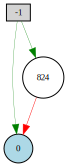

In [12]:
import graphviz
from visualize import draw_net

print("\nBest genome:\n{!s}".format(winner_list[0]))

config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path,
    )
draw_net(config, winner_list[0])

In [6]:
winner_net = neat.nn.FeedForwardNetwork.create(winner_list[0], config)
outputs = []
for xi, xo in zip(x_inputs, x_outputs):
    output = winner_net.activate(xi)
    outputs.append(output[0])
    print("input {!r}, expected output {!r}, got {!r}".format(
        xi, xo, output))

input (0.1,), expected output (0.09983341664682815,), got [0.11845139082985745]
input (0.2,), expected output (0.19866933079506122,), got [0.171062394931322]
input (0.30000000000000004,), expected output (0.2955202066613396,), got [0.24066163165040194]
input (0.4,), expected output (0.3894183423086505,), got [0.32739417202340554]
input (0.5,), expected output (0.479425538604203,), got [0.427775311190163]
input (0.6000000000000001,), expected output (0.5646424733950355,), got [0.5344770299167536]
input (0.7000000000000001,), expected output (0.6442176872376911,), got [0.638114130623685]
input (0.8,), expected output (0.7173560908995228,), got [0.7303204933935294]
input (0.9,), expected output (0.7833269096274833,), got [0.806169536450582]
input (1.0,), expected output (0.8414709848078965,), got [0.8646395088262491]
input (1.1,), expected output (0.8912073600614354,), got [0.9074955658523413]
input (1.2000000000000002,), expected output (0.9320390859672264,), got [0.9377598181425678]
inp

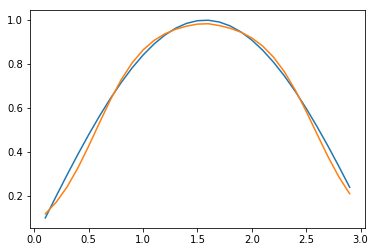

In [7]:
xinputs = np.arange(.1, 30 * .1, .1)
xoutputs = np.sin(np.arange(.1, 30 * .1, .1))

plt.plot(xinputs, xoutputs)
plt.plot(xinputs, outputs)
plt.show()

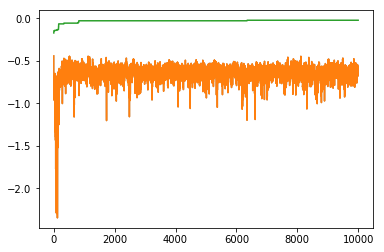

In [9]:
avg_fitness_list = []
best_list = []

for i in range(1):
    generation = range(len(stats_list[i].get_fitness_mean()))
    avg_fitness = np.array(stats_list[i].get_fitness_mean())
    avg_fitness_list.append(avg_fitness)
    best_fitness = [c.fitness for c in stats_list[i].most_fit_genomes]
    best_list.append(best_fitness)

    plt.plot(generation, avg_fitness, alpha = 0.4)
    #plt.plot(generation, best_fitness, alpha = 0.4)

plt.plot(generation, np.average(np.array(avg_fitness_list),axis = 0), label="Average")
plt.plot(generation, np.average(np.array(best_list),axis = 0), label="Best")


plt.show()